In [430]:
#load libraries 
import time,os
from matplotlib.offsetbox import AnchoredText
import sys,pandas as pd, matplotlib , matplotlib.pyplot as plt, matplotlib.lines , numpy as np, math, pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#import cudf
#import ROOT
#from ROOT import TFile

#import root_pandas
import importlib
#from toggle_cell import hide_cell 
%matplotlib inline

#presets for plot style
from scipy.constants import golden
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7, 7/golden),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

viridis = cm.get_cmap('viridis', 12)
inferno = cm.get_cmap('inferno', 12)
autumn = cm.get_cmap('autumn', 12)

#physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)
#tf.config.experimental.set_memory_growth(physical_devices[1], True)
rc = plt.rc
rc('text', usetex=False)
import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=False)
rc('font', size=15)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)
import root_pandas,glob

def read_n(pattern, n):
    if not '*' in pattern:
        a = root_pandas.read_root(pattern,chunksize=int(n))
    else:
        a = root_pandas.read_root(glob.glob(pattern),chunksize=int(n))
    for b in a:
        del a
        print(n)
        return b

from scipy.optimize import curve_fit

plt.rcParams['savefig.bbox']='tight'
import misc_util
importlib.reload(misc_util)
import gc

#import ROOT
import collections
#pdg = ROOT.TDatabasePDG()

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

In [2]:
import ROOT

Welcome to JupyROOT 6.24/06


In [172]:
import ROOT, numpy as np, pandas as pd, sys, root_pandas,time
ROOT.gSystem.Load('../../delphes_install/lib/libDelphes')
f = ROOT.TFile("../18_100_NCDIS_1M.root")
tree = f.Get("Delphes")

In [173]:
x_sum=0
denom=0
nu_sum=0
ebeam = ROOT.TLorentzVector(0,0,-18,18)
hbeam = ROOT.TLorentzVector(0,0,np.sqrt(100**2-.938**2),100)
#hrecon = ROOT.TH1D("h1", "recon", 100, 0, 0.5)
#hgen = ROOT.TH1D("h1", "gen", 100, 0, 0.5)
hrecon = []
hgen= []
for i,event in enumerate(tree):
    if len(event.Electron) == 0:
        continue
    for electron in event.Electron:
        Pte=electron.PT
        phi_e = electron.Phi
        e =electron.P4()
        Q2 = abs((e-ebeam)*(e-ebeam))
        y = (ebeam-e)*hbeam/(ebeam*hbeam)
        nu = (ebeam-e).T()
        x  =  (e-ebeam)*(e-ebeam)/(2*(ebeam-e)*hbeam)
        #print(y)
    if Pte<9 or Pte>11 or Q2<25 or y<0.1 or y>0.85:
        continue
    for jet in event.Jet:
        if jet.PT<5:
            continue
        dPhi = jet.Phi-phi_e
        dPhi += -2*np.pi*(dPhi>np.pi)+2*np.pi*(dPhi<-np.pi)
        hrecon.append(abs(abs(dPhi)-np.pi))
        x_sum+=x
        nu_sum+=nu
        denom+=1
        #x_sum+=
for i,event in enumerate(tree):
    if len(event.Particle) == 0:
        continue
    for particle in event.Particle:
        if particle.PID != 11:
            continue;
        Pte=particle.PT
        if Pte<9 or Pte>11:
            continue
        phi_e = particle.Phi
        e =particle.P4()
        Q2 = abs((e-ebeam)*(e-ebeam))
        y = (ebeam-e)*hbeam/(ebeam*hbeam)
    if Pte<9 or Pte>11 or Q2<25 or y<0.1 or y>0.85:
        continue
    for jet in event.GenJet:
        if jet.PT<5:
            continue
        dPhi = jet.Phi-phi_e
        dPhi += -2*np.pi*(dPhi>np.pi)+2*np.pi*(dPhi<-np.pi)
        hgen.append(abs(abs(dPhi)-np.pi))
    #if i>10000:
    #   break
smoothed=False
nu_mean = nu_sum/denom
x_mean = x_sum/denom

1.8418280370461844
10.421157684630737
9.466295264623954
8.01729559748427
6.556047313517521
5.413821211846753
4.48538537845756
3.732746386862046
3.1305553880480006
2.6514781665310543
2.2488083249412556
1.9224026969046881
1.6262335274287465
1.4002554909960017
1.2127029510875107
1.0435927547062391
1.8312659043525215
1.8325069237258165
[0.01904848 0.01950686 0.02100729 0.0221458  0.0249145  0.02855977
 0.03363364 0.0372678  0.04481107 0.05227084 0.05812382 0.06622662
 0.07624929 0.08111071 0.08574929]


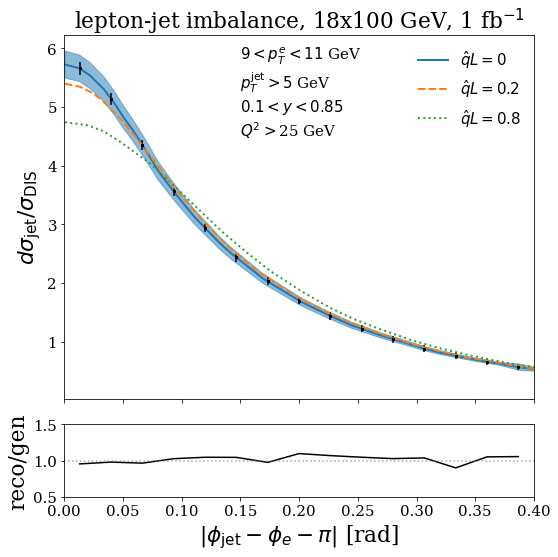

In [271]:
fig,axs =plt.subplots(2,1,figsize=(8,8),sharex='all',gridspec_kw=dict(height_ratios=(1,.2)))
plt.sca(axs[0])
#yg,x,_ =plt.hist(hgen, range=(0,0.5), bins=30, label='generated', density=True, histtype='step')

#yr,x,_ = plt.hist(hrecon, range=(0,0.5), bins=30,label='reconstructed', density=True, histtype='step')
#x = (x[:-1]+x[1:])/2
#plt.fill_between(x,yr*1.04,yr*0.96,alpha=0.4, color='tab:orange')
n,xedges =np.histogram(hrecon, range=(0,0.4), bins=15)
dy = 1/np.sqrt(n)
x = (xedges[:-1]+xedges[1:])/2

linestyles="- -- :".split()
labels = "$\hat{q}L=0$ $\hat{q}L=0.2$ $\hat{q}L=0.8$".split()


for i in range(3):
    df=pd.read_csv(f"../curve{i+1}.csv")
    norm = np.sum(df.y[:-1]*(pd.Series(list(df.x[1:]))-pd.Series(list(df.x[:-1]))))
    print(norm)
    plt.plot(df.x,df.y/norm, linestyle=linestyles[i], label=labels[i], linewidth=2)
    if i == 0:
        ys = []
        for j in range(15):
            staterrs = ((df.x>xedges[j]) & (df.x<xedges[j+1]))*dy[j]
            ysum = 0
            denom= 0
            for k in range(len(df)-1):#interpolate the y position from the theory curve
                if x[j]>df.x[k] and x[j]<=df.x[k+1]:
                    interp= df.y[k]+(df.y[k+1]-df.y[k])*(x[j]-df.x[k])/(df.x[k+1]-df.x[k])
                    print(interp)
                    ys.append(interp/norm)
            
        dyt = df.y/norm*np.hypot(.04,staterrs)
        plt.fill_between(df.x, df.y/norm+dyt, df.y/norm-dyt, color="tab:blue",alpha=0.5)
        ys = pd.Series(ys)
        plt.errorbar(x,ys,dy*ys,marker='s',linestyle='',color='k',markersize=2)
        
plt.gca().set_xlim(0, 0.5)
plt.legend(edgecolor='w')

plt.gca().set_title("lepton-jet imbalance, 18x100 GeV, 1 fb$^{-1}$")
#axs[0].set_xlabel("$|\phi_{\mathrm{jet}}-\phi_{e}-\pi|$ [rad]")
axs[1].set_xlabel("$|\phi_{\mathrm{jet}}-\phi_{e}-\pi|$ [rad]")
plt.gca().set_ylabel("$d\sigma_{\mathrm{jet}}/\sigma_{\mathrm{DIS}}$")
text = ""
#text += f"$\langle x\\rangle={x_mean:.2f}$\n$\langle\\nu\\rangle={nu_mean:.2f}$ GeV\n"
text += "$9<p^e_T<11$ GeV\n$p_T^{{\mathrm{{jet}}}}>5$ GeV\n$0.1<y<0.85$\n$Q^2>$25 GeV"


plt.gca().text(0.15, 4.5, text)
plt.sca(axs[1])



yg,x =np.histogram(hgen, range=(0,0.4), bins=15, density=True)

yr,x = np.histogram(hrecon, range=(0,0.4), bins=15,density=True)
x = (x[:-1]+x[1:])/2

print(dy)
plt.plot(x,yr/yg, color='k', linestyle='-')
#plt.fill_between(x,yr/yg+np.hypot(yr/yg*.04, dy),yr/yg-np.hypot(yr/yg*.04, dy), color='tab:orange',alpha=0.4)
plt.gca().set_ylabel("$\\frac{d\sigma_{\mathrm{recon}}/\sigma_{\mathrm{recon}}}{d\sigma_{\mathrm{gen}}/\sigma_{\mathrm{gen}}}$")
#plt.gca().set_ylabel("$d\sigma_{\mathrm{recon}}/d\sigma_{\mathrm{gen}}$")
plt.gca().set_ylabel("reco/gen")

plt.gca().set_xlim(0,0.4)

plt.gca().set_ylim(0.5,1.5)
plt.tight_layout()
plt.axhline(1, linestyle=':',color='0.5', alpha=0.7)
plt.savefig('png/test.png')
plt.savefig('pdf/test.pdf')


In [478]:
import ROOT, numpy as np, pandas as pd, sys, root_pandas,time
ROOT.gSystem.Load('../../delphes_install/lib/libDelphes')
f = ROOT.TFile("../10_275_NCDIS_1M.root")
#f = ROOT.TFile("../NC_DIS_100k.root")
tree = f.Get("Delphes")

In [592]:
x_sum=0
denom=0
nu_sum=0
Q2_sum=0
ebeam = ROOT.TLorentzVector(0,0,-10,10)
hbeam = ROOT.TLorentzVector(0,0,np.sqrt(275**2-.938**2),275)
#hrecon = ROOT.TH1D("h1", "recon", 100, 0, 0.5)
#hgen = ROOT.TH1D("h1", "gen", 100, 0, 0.5)
h_qt_pte = []
h_qt_pte_gen = []

tree.Draw("Event.CrossSection", "","", 100000)
xsec = tree.GetHistogram().GetMean()


treeSize=tree.GetEntries()
#set this to a small value for fast testing
subtreeSize=100000
for i,event in enumerate(tree):
    if len(event.Electron) == 0:
        continue
    for electron in event.Electron:
        Pte=electron.PT
        phi_e = electron.Phi
        e =electron.P4()
        Q2 = abs((e-ebeam)*(e-ebeam))
        y = (ebeam-e)*hbeam/(ebeam*hbeam)
        nu = (ebeam-e).T()
        x  =  -(e-ebeam)*(e-ebeam)/(2*(ebeam-e)*hbeam)
        print(y)
    if Pte<15 or Pte>20 or Q2<50 or y<0.1 or y>0.85:
        continue
    for particle in event.Particle:
        if particle.PID != 11:
            continue
        Pte=particle.PT
        phi_e = particle.Phi
        e_gen =particle.P4()
        if e_gen.Angle(e.Vect())>0.30:
            continue
        Pte_gen = e_gen.Pt()
    
    for jet in event.Jet:
        if jet.PT<10:
            continue
        j = jet.P4()
        h_qt_pte.append((j+e).Pt()/j.Pt())
        found = False
        for gen_jet in event.GenJet:
            gj = gen_jet.P4()
            if gj.Angle(j.Vect())<0.3:
                found=True
                h_qt_pte_gen.append((gj+e_gen).Pt()/gj.Pt())
                break
        if not found:
            h_qt_pte_gen.append(-1)
        x_sum+=x
        nu_sum+=nu
        Q2_sum+=Q2
        denom+=1
    
    if i>subtreeSize:
        break
        #x_sum+=

nu_mean = nu_sum/denom
Q2_mean = Q2_sum/denom
x_mean = x_sum/denom

0.25821729061914395
0.04736579367194232
0.303104432785746
0.08784038497227892
0.5789489357310809
0.3052782126686477
0.7057981987456085
0.022892818336878017
0.1212428079855886
0.018607733913853227
0.7172796896943473
0.42806573094825145
0.061203735113177435
0.13344414785763414
0.9949012378727154
0.02883367865908047
0.17965427547291335
0.013715772454143273
0.0728309583557082
0.10269824713951378
0.10961006257581642
0.34887328686591595
0.18668954367453358
0.1715759064359148
0.37854972094566075
0.38711312690360933
0.8653382224839904
0.39209211035626096
0.9067755283983415
0.474290830715043
0.9997427697257656
0.05649136349882079
0.12664022405309316
0.1707548970834702
0.41265320919046433
0.44458270873732797
0.47163648376204714
0.10645564591595859
0.2255185519138785
0.8691083958945452
0.5520506309439882
0.026119497792601375
0.030102824900403124
0.11962544088002182
0.3967560262374019
0.023354181293220852
0.6852123936753173
0.03212277487557544
0.1008897913845235
0.020589368724278516
0.978044717062

0.05420618158865163
0.5885251390025841
0.6324620696317017
0.14421964185136185
0.038047967827834296
0.01554014310268612
0.084274564343561
0.21774204771610656
0.05169583391606055
0.4037670338204663
0.530054106632209
0.27903718719706483
0.08200156586910093
0.2897113221685625
0.029830750023582948
0.5112849127666436
0.8875863793874386
0.9343435496590344
0.23151831919866062
0.26212462829584654
0.05556210287075577
0.014924768104585782
0.06199436917669768
0.7769896241729747
0.6434034711532657
0.5128271820877084
0.21519206438364605
0.40589824645952355
0.2425423630923349
0.11833532567375965
0.5400576859082723
0.20280141309485902
0.5325114791717094
0.04633104545630255
0.2422445726023709
0.2248235403940898
0.2049830836642591
0.4744230494923831
0.8909026437073159
0.6006423597702563
0.7207102619090705
0.9853247787461412
0.2725096755353837
0.10312305477052065
0.034025757564147184
0.12049154265691066
0.009193970598883659
0.02736083136620925
0.03469128691951652
0.21863526883138407
0.8733234625917987
0.

0.1966947518557434
0.6529505198548043
0.22636037523337238
0.9695694194371431
0.11884424705013649
0.059865764421583076
0.20786637483763326
0.32887981908722996
0.08243553462488518
0.768365805221513
0.23122798259292796
0.2849447342381765
0.35975967839735457
0.02382124382856736
0.12269858112615092
0.25585886976294514
0.30452705033767796
0.08394287212084571
0.040690791076362844
0.7107930921381789
0.032007710041650386
0.09993035668409499
0.15316530518410604
0.22614353393283132
0.3518296254380897
0.0911380560813541
0.6762017867910116
0.06338098257865948
0.0873948685085099
0.09492877502644957
0.15158313689320274
0.5807834645080094
0.11163161230968444
0.1608641769871993
0.27038180498141035
0.641486669811877
0.2669641899380232
0.03029438431547879
0.11327640379445784
0.07809525636582455
0.11525929286561598
0.10962365349986483
0.15486876455069323
0.042077663192383714
0.24511754986881404
0.02488726864131238
0.8113253207464899
0.27429462931880544
0.6038086312271537
0.11265269338016216
0.088573181616

0.9357592010093109
0.8727947881600222
0.053915853401225115
0.0368518391542311
0.05202449151703552
0.3196697593598471
0.8064035900906897
0.0921125943777096
0.12141213058890243
0.9981017875652634
0.1475724985975401
0.0689281235114527
0.8298008774980604
0.7320915007261876
0.4209492136830681
0.08370654145646585
0.2653513705574499
0.15658506143616427
0.975571146214197
0.017309053901836343
0.2691127184421773
0.9949793808338596
0.35899540457432744
0.270561767810215
0.17351883323514228
0.029472960888101342
0.3300494652807438
0.0597251795275653
0.13743832974902354
0.4538438862525205
0.5620599406723679
0.9775296741650693
0.36020086021461795
0.3796891049668549
0.3507691306441409
0.03681817732496334
0.1421798082932981
0.5553680707670364
0.14185676516778256
0.5143943583802105
0.9927360625308974
0.021174768898895722
0.2614518915217072
0.9992473461920579
0.09057107799200992
0.34841112431493515
0.06764930682299453
0.10665829483914135
0.30051670451115625
0.7778920843114852
0.9952079224974509
0.99605539

0.30228471740670526
0.01556991404663023
0.2820449055387641
0.3881916115625607
0.11188652864958895
0.05780693611047704
0.12720706727880982
0.16095373391607368
0.37419990551279336
0.09846228540421637
0.1525657879084628
0.02179205643237234
0.34357632400769833
0.14565696862728
0.9259024276466801
0.07463148998938254
0.46519247348143533
0.052112108975396323
0.22910702626977625
0.030275693660427584
0.030348382005130063
0.1293687831981883
0.06640312263016486
0.45538385526135716
0.09066871402216399
0.3180737525525845
0.03428145988335569
0.541010854862192
0.9106817096660211
0.054763442935610473
0.11720279602206071
0.022716355373388866
0.677813060326139
0.13830948110323402
0.348047953183651
0.10110800220665464
0.15035935632402778
0.05050263791639198
0.11213576101993353
0.07021578616989652
0.11365423053109351
0.13786210983204825
0.9846307555093835
0.5628938415164484
0.1840475071024862
0.6951702059196655
0.11608761681912609
0.3621372357629499
0.03496056000978298
0.13086855505042264
0.03437575205446

0.1089736843238605
0.24571109890816326
0.320971644376389
0.012148939357650518
0.11861788659115645
0.024109398872359116
0.2384252914678061
0.1353835075832557
0.05734562053563962
0.5426124757409178
0.005577201089470791
0.028504574025857033
0.07575447159267445
0.014681407677626062
0.47983019540082744
0.042184597245991814
0.04520005555559591
0.10623981389283371
0.04581112397611952
0.6676350814097273
0.5320562250671454
0.3897710124510938
0.7310699879850237
0.09175725102790755
0.047185725847486065
0.48552973374309794
0.28401041441102237
0.06270974399896677
0.8205144746351914
0.0259014330779052
0.12541894804680034
0.16303809295879867
0.8783606096123306
0.40109128663941535
0.040938116272756515
0.18975062241429558
0.2475760657370581
0.5745953207685699
0.8403409154554634
0.2895770424793062
0.10457648579044145
0.024874125456669425
0.048581388506624704
0.499779918777383
0.033277515278304144
0.580526650356313
0.7945323640554007
0.09397772542667193
0.24905514905595227
0.4174555523503715
0.0653591535

0.3773345212472219
0.053602256479716545
0.7003267915279496
0.43676605352904246
0.11779739473196203
0.5420161810380357
0.23441785269348828
0.07337910670918125
0.643717232043592
0.04666659165001983
0.1297511793257583
0.16910465184345833
0.020590802160716012
0.4595601672696285
0.8460134390861511
0.023730059422715447
0.06940280861807091
0.09660748356744316
0.041424710451647306
0.12556187924452533
0.16700837183005637
0.4918389592416155
0.02570832767118479
0.03699780221867664
0.17399545520704054
0.10469527633045198
0.5287138645802811
0.010785444246870252
0.08761553974406561
0.0859402238784019
0.2779104887797394
0.028628997536909312
0.4301907319791037
0.4061063898179686
0.7076745094746888
0.017267046316915016
0.5815116414814963
0.6864957657494961
0.9997368822475456
0.0766681223901018
0.08477637580081211
0.6982114423684372
0.8249245120474672
0.48493260320946147
0.13343248563053645
0.06492903203075348
0.048085363068275294
0.9245584128045004
0.27324938613062166
0.26597884941163846
0.312975867774

0.6922408107590001
0.02465994344796004
0.4933897121845799
0.1389287855541145
0.04658450460340073
0.08609719210698458
0.07946693411035707
0.19791187925881326
0.17069779839134455
0.1548182198612206
0.40431049197661023
0.3344815851805157
0.03824137704815746
0.10117286050174165
0.3430823774585396
0.03116435045520032
0.17588946500419472
0.23517268315152529
0.5373895531517525
0.11892970639444318
0.16102820581845756
0.9220039730971504
0.04841789416428856
0.24866523225787998
0.9975411410460638
0.9981854275053411
0.3106377929848179
0.03902565806055924
0.46057591988444574
0.0859812386435238
0.0430056806957778
0.8116001134817489
0.1659327956942669
0.06883098384154131
0.28764196531436614
0.13987499760702093
0.07167497325411232
0.20744215875076422
0.3051255066299386
0.3338677985176311
0.14843243231855832
0.18169090842975164
0.998169912036396
0.998613596945192
0.048051834499450816
0.62157359504476
0.045027429405372674
0.09603971470345861
0.541109284534118
0.993516891992274
0.12055711318485969
0.3895

0.42033945659471444
0.9214547120206674
0.2752949981880595
0.49793273690739126
0.16105939587343096
0.16443461354743022
0.014022493537668103
0.4019626567387
0.024360712029632765
0.07671800408161902
0.8559599135347463
0.2229498605887622
0.17167094658452733
0.9663374124789534
0.05677888056241327
0.1782815232754071
0.06415561107004475
0.26543688656425407
0.06872599724029614
0.5195510594938954
0.3284549954198248
0.10158097012466347
0.792325390700684
0.1846126560404994
0.11413193899471216
0.08316138345874409
0.029008818473109127
0.09225242525232671
0.2100359361426149
0.11359924382641334
0.0762653825219609
0.48774058279256116
0.9136732178904898
0.9547429629466911
0.10180885667462945
0.11425895658828342
0.7447875167920817
0.07718960077874669
0.9981359639781867
0.14135763009552663
0.10675432379924858
0.6595038557457237
0.36032757450129527
0.12741830410772878
0.5490838995913802
0.9207272558358433
0.7400810403234906
0.24240292221232318
0.1894662068142714
0.09837827951176693
0.5533891681378603
0.01

0.5153182364767591
0.40964688920927295
0.5233343488635245
0.40068015487843667
0.07694877374414272
0.641200566603549
0.0691497865882322
0.009618665026042188
0.06978458965802627
0.21800664230404157
0.13400554499911763
0.2976439114211101
0.2291852796497229
0.19604449756049644
0.5047364325582053
0.3299622830133118
0.07197874499487145
0.033564899670453736
0.12049566158595577
0.02882506847999139
0.6142009833519557
0.4205286723287754
0.013848413066779235
0.8255960781652999
0.07192585075290658
0.33804963151647993
0.1965757969652786
0.04617276204167947
0.2787885754694883
0.8092724469925622
0.0667228100135043
0.06246247244911696
0.37584632636040766
0.25658114172947827
0.06850279726500516
0.13200552675962593
0.22267531635702398
0.14425242844530123
0.040845404065902986
0.19426299511886727
0.7616418855639853
0.8929715660786173
0.2812877498335876
0.672423721346199
0.02283510817330231
0.04280476665452482
0.05944970001154633
0.022080295549035484
0.5299662070371154
0.26837592010855416
0.469172174028842

0.3623549764230141
0.4240285494681569
0.06175052806538639
0.17977840509073703
0.09351822396546623
0.11172554382309458
0.1187367273411187
0.6015142164805588
0.5303232090844902
0.01980858933265702
0.3704710125004388
0.9994716349963294
0.4498744106263752
0.2894915474083042
0.2586886445760873
0.04700489882892819
0.09078742900775054
0.7537016970083508
0.3277912037514924
0.37974722281130463
0.4122768293874729
0.05356024288994659
0.04084462919592908
0.3963632321612143
0.29035103808931895
0.3294031208544593
0.053071050339637924
0.1182559048419284
0.17565517580426174
0.4599382053686336
0.008919463705963733
0.4342066766367061
0.051264829916900304
0.08788183081969243
0.039167303391561534
0.22665153252909753
0.05499566789773501
0.040003839124532085
0.07173763435223253
0.027455121340748925
0.04364766393961798
0.46870850197114616
0.04600699109200501
0.042342257065667285
0.2342195506522091
0.20927038620318053
0.03877357023448466
0.03834954946611115
0.02204019388998623
0.06756274623552846
0.3600097149

0.13827540058097676
0.37298786751813434
0.5261409480321134
0.30838544886014635
0.1000970833370058
0.17088813932970137
0.4918216211528742
0.034587097147777496
0.29736465832654024
0.14662587547447808
0.6797380110522486
0.10642339103154277
0.07613784762012216
0.8168941938531512
0.9997741566818695
0.34477771479739105
0.060004689523193606
0.41748398069816806
0.25402818424461404
0.3781304104906555
0.004752642660083425
0.14028636121303859
0.5276365927201595
0.4577286454135301
0.6420848972911819
0.1843091557099997
0.9631277392651655
0.18835172772108
0.1728289968641753
0.28190304336325783
0.20287159135829935
0.459857872318497
0.2348958061660838
0.04117872705993161
0.8143172980132509
0.025100345374266697
0.2505024473085107
0.6088277903199656
0.14645504498818557
0.536257392650479
0.18568501333733173
0.03132095354642471
0.3958129323053467
0.06266991120057114
0.17254448489934016
0.12128838474261915
0.8675388143325337
0.19549150177408345
0.443222514145293
0.3199977180474663
0.6247786156408138
0.2833

0.028821844055082792
0.8408965899849677
0.22030756905690857
0.10202178860833339
0.36640822426457575
0.8718400060058217
0.04924047309446064
0.32258089048873284
0.08709026447799145
0.08171645849525878
0.3962672989254158
0.19650848153909375
0.0847247083321934
0.6452383062928561
0.29410532655041977
0.20850822352752368
0.07146899825529152
0.1779138659055069
0.1904971641400729
0.6263845125412114
0.324963624066275
0.0058958314299632116
0.22255544182895157
0.242543340385485
0.3821485012046451
0.024408877792010713
0.1354845444824604
0.14698442705780507
0.5053424161502879
0.022004225812155154
0.24753960792787874
0.9975922054023328
0.03212708462239083
0.7534756204230205
0.13465756583207578
0.9159300131312667
0.5237483513190259
0.27667967823185197
0.14483610489418125
0.11218158865681174
0.10306940853516676
0.05138083733402529
0.01827542572299749
0.09516645018235442
0.03785735593326186
0.12385344821948023
0.06473258626345259
0.18477915503587466
0.19543751880351304
0.08265318285796287
0.041353057160

0.0513085265882656
0.5310878364814514
0.12524167890395177
0.9065923125921125
0.41115561269844475
0.05960655081308411
0.3062029687970473
0.991930547597363
0.8019716308023571
0.767662224544075
0.41178895243153996
0.044304682814540336
0.8923600340447442
0.0910055224918497
0.3251281150671819
0.1231334667464108
0.06770819123504333
0.06496184107372145
0.2596034172818592
0.1606723018610932
0.8386182925959855
0.040940857017557925
0.006632121462003824
0.37997467131963786
0.11916475140539302
0.999218479033918
0.715214696486637
0.151599800186705
0.02220958649890591
0.42303334599964215
0.5113905033794606
0.15629552772906866
0.20561044483098945
0.09896088962172166
0.3495992905733192
0.35571615650639915
0.07344007920121164
0.02210016728243742
0.01705592127046361
0.5762364515660268
0.3985366212723909
0.057189611347085265
0.20761681891644446
0.16051794218262003
0.6359611917215573
0.3102118974168983
0.736144490232567
0.1093934891760579
0.04588789643015797
0.4079450357939033
0.056162012934558955
0.48211

0.5658754259625839
0.21330014406023753
0.08206738602876128
0.026621380453833745
0.49181992632511895
0.361360084942498
0.02197954952137805
0.025316446255486416
0.28719234133356253
0.31561697148945134
0.3184338562661046
0.20019446837919266
0.08300998098798822
0.0291657513650597
0.7951260621930692
0.11093366748732503
0.04289097088960644
0.5017666309142305
0.35616530023344917
0.35529934274385344
0.09748443421782234
0.08663946130137808
0.0993166356694224
0.09612399865498733
0.1398562924367166
0.6381335826176883
0.021077805683431476
0.024472096724389453
0.01585602472992455
0.2155860568067749
0.23681762431847497
0.6049300777204295
0.1356941433835473
0.022819445589588067
0.11156856634314394
0.8744861795791673
0.9263743833993849
0.8517736248923424
0.008347416648273777
0.24020854717832152
0.5810936918470903
0.33262349918900047
0.9983842859736268
0.037533377170926745
0.03949025001899772
0.0782607517548417
0.1313934564198643
0.901011641661629
0.09144327020031441
0.18303032292728086
0.0778384786331

0.9072793912375494
0.7482305066019117
0.10450083586694199
0.15368581547339302
0.15792740426870516
0.012418218555559761
0.5979676834485959
0.043008795304747965
0.07496073069725402
0.1271441762484811
0.9465960108191295
0.36236714817681975
0.3467223704715998
0.6162562528190763
0.9261376786979651
0.1356232176628938
0.04980226610256726
0.29546481747316145
0.07247850526844672
0.06989369582334913
0.8852436156026909
0.06790213637071123
0.39471600717451594
0.7474164672698311
0.08396288299799481
0.07903330658502042
0.33849513043775004
0.14992423044492373
0.025454157776477974
0.2920630003490637
0.048660993049662656
0.49894265801405724
0.35159554383176483
0.03375624841905964
0.34001735555587015
0.20917259132094668
0.19039222961706667
0.7643180658089013
0.048614522466016746
0.0382444919440994
0.1256488870217219
0.06959777797260915
0.5338760492239227
0.4558330065121472
0.11736500608463736
0.17789618035769147
0.11106987787380808
0.017403079616117978
0.1834241304069849
0.13835374134543343
0.0294618940

0.08415186222495856
0.035648688196206146
0.1656330756453978
0.2313707400464596
0.017180018547179123
0.7708964285072988
0.5680978918900984
0.022133342222775312
0.25310600859590227
0.07875400516740114
0.7374748353765925
0.193840467958871
0.10253066222435223
0.17008711374931795
0.09401163086068344
0.03404817476161035
0.14127819471777617
0.07202242804109446
0.4805706996154488
0.2589075578638409
0.04015168264991421
0.0712324400204191
0.68879806819093
0.7374231276999641
0.21862569312648308
0.6404235327681811
0.4724042223985237
0.43111812304872155
0.03726625549434586
0.5320774164654409
0.571174802219128
0.1775808732076818
0.17328094835391897
0.019103903722509186
0.22729849764058815
0.21838545148797453
0.6712311911108738
0.1304007478384071
0.23205417968788514
0.3535431915608878
0.9970004523045144
0.9990414407450264
0.0007012802270578737
0.21097911179195764
0.03508830761785209
0.4923354972010112
0.14762315655338337
0.18927066490336925
0.11890147011506172
0.2649435450686079
0.042791892840320235


0.4357801517897162
0.46014924298102783
0.10326914802066706
0.1869584144364331
0.03487160748830593
0.04128140851774847
0.2805060579529668
0.15558171989939368
0.5500924001910487
0.03208809416493863
0.13714657326605426
0.019588630266354358
0.6758843738490301
0.9977929788326692
0.041328928346431225
0.11014512946397598
0.7164948177015544
0.05936900250842041
0.16863528271005132
0.5371699112279619
0.3259272082766072
0.4943336604540566
0.03277672198142465
0.09133721395845376
0.20351515239012472
0.12920078689692235
0.3803037633194953
0.08710570546265764
0.26743742825277717
0.21668299409258812
0.0873290661676472
0.9993209948240627
0.28830831280424896
0.3009847688247637
0.20685918348863352
0.5087689029317988
0.015152970874803447
0.20462782343215585
0.9365471993494892
0.0603874935360443
0.559329910205641
0.13011691227551933
0.7171987373153391
0.13489642014622877
0.21764477242010713
0.9374282523009992
0.16627801898796665
0.025324561667679168
0.8992668193285276
0.5324025340005301
0.3794021597293642


0.5702251892746091
0.09937854193299131
0.027596001010510025
0.7173060826102469
0.04076146940056599
0.5107218655015555
0.03695591465557305
0.1497448146501541
0.13122780281483687
0.03984219507412938
0.13780240988552786
0.11117705777279026
0.06307562419366863
0.11035697863484904
0.49578947649959393
0.04921430744303261
0.09886644798053197
0.7848145508372838
0.6317370761405482
0.9931318659383437
0.11467865812858474
0.22864827781606709
0.05657117929645239
0.2024907085275308
0.010495525848132624
0.7532547165389356
0.27779077940275415
0.285580485163766
0.06315206852687606
0.3629995762490796
0.04019880891699151
0.2325961908300685
0.23285873903352275
0.16197038552880885
0.08707066507711818
0.18286155108175095
0.0162553608666243
0.09117619224071073
0.18625982451173592
0.027616177411766304
0.10647699344874316
0.12386491050840773
0.11996308143181801
0.13565594063389172
0.08137779502720847
0.8257942299975238
0.2839328287781425
0.5913683801919151
0.22406603837226094
0.05673455569761317
0.680843416925

0.03230797012823917
0.3129282942408776
0.9875164137210105
0.6153419128070547
0.28668078708731193
0.24551306242797585
0.29350416026954335
0.11375489755561426
0.077633541897005
0.19559829434331108
0.9968943190827527
0.12356326177293536
0.5932482964570306
0.34196737457938287
0.6415803279257682
0.07018430630762683
0.14392970818126896
0.1071828976018066
0.017587275809403224
0.0411816500384811
0.9998536114958314
0.10757883137854778
0.336057041086359
0.006329693790801204
0.267307668526469
0.23534078692978225
0.11603177634712224
0.19279126292918525
0.25393023691317335
0.6497514885422147
0.04966870694527064
0.16612003314774154
0.058338104257876514
0.02162620455503372
0.6108601225678948
0.19513586746627634
0.020151685024880704
0.43798703121118754
0.7092455675624315
0.049171826351002014
0.1811989732219446
0.8355316361898691
0.37276321177475086
0.059020357764081155
0.5709422455061803
0.011419077145927919
0.2047868164366766
0.26780733843685806
0.9973790407521651
0.03412657371447084
0.51296176516947

0.04687265533527352
0.04305192171290201
0.032156431261348414
0.05820945621207297
0.05022081824656692
0.7794257935939005
0.3047621654375709
0.18691643737890165
0.08431487689565356
0.28055479585610277
0.09203105814316753
0.024511367099300154
0.5219346781543042
0.17950991957700488
0.28700908336666947
0.03094742083919272
0.028218990936868426
0.34123903769938496
0.15822654653420862
0.09800979493092127
0.07207470968228855
0.3254198813783023
0.243900099876362
0.8244627645618411
0.12398179232297328
0.12102994401805793
0.03753270659200824
0.2836967702281948
0.941732457109838
0.23721952268670882
0.6217400874412516
0.05020689244085652
0.2581190112545124
0.15047295842093084
0.10064377491917727
0.11422535571904831
0.8141849974369001
0.11578844201995701
0.13710357532130465
0.1501860553600334
0.06275044824488056
0.33692832328162203
0.20614956202363013
0.02744881696607705
0.34738223693979203
0.22558764946159898
0.11598158458012582
0.06041951353878438
0.2799176762990423
0.050343217446277726
0.061771666

0.44737710570832395
0.7055105104718675
0.8280384930228816
0.39180689310696437
0.2540608531534861
0.597061567722456
0.017076405317719815
0.26669118487416515
0.7164620139858943
0.11408608159618652
0.1032101616642191
0.02165153134292331
0.7760945272296961
0.4734815318792815
0.07676859558453529
0.9168063134907116
0.48482934937358907
0.21378705589408253
0.26504330319211084
0.1925479464754002
0.03936663906576391
0.01664190891405108
0.4382581894631753
0.05555113957010381
0.11753167898793548
0.2897735931866978
0.02355657875963532
0.23612647644135265
0.4649288656845999
0.2809878378060143
0.010725050131346848
0.2585935505844425
0.2304866352287945
0.29612925755314934
0.07318756199604244
0.25837480075934843
0.07910384113862633
0.0998050501545273
0.07793911650866768
0.5943863560040921
0.05425972347759195
0.3128181102268006
0.7618212867300492
0.026293151649197304
0.03677230353300531
0.5727714623443585
0.09064890336311204
0.02496910799514803
0.3858701802251923
0.012457530484605909
0.37424862017817007

0.8562836249834267
0.8380431799542578
0.14851658062222312
0.18895858417813974
0.05526253211089475
0.031808257581787874
0.22928621588305426
0.4785340504599085
0.3946799399661562
0.2900471073971238
0.49574355015850424
0.9944323293430101
0.9971319444010033
0.1310614481388495
0.25217213289583473
0.2015415082603101
0.052592476414448364
0.17873465773669026
0.24608899813689528
0.2899333906489021
0.09369122756127561
0.03479111631660029
0.6291684335085022
0.03314999814657042
0.07508797296012834
0.6969959954569643
0.9993101992068175
0.7446084897552537
0.5143065223091629
0.12705996885565657
0.047770410616423634
0.8008820351573029
0.03169261826904385
0.3315252529599157
0.1951244960561416
0.11040258675285687
0.04927144836595363
0.8373016515793534
0.34621784370876246
0.10381061133180755
0.2283546955010172
0.46120060409102975
0.7528678929809988
0.11999055918294306
0.0517567995151516
0.06491895101474307
0.6301756795397899
0.1137015313178928
0.17835404996664161
0.06937917852053585
0.05072402056484409
0

0.09001652129640467
0.3374242388618865
0.3539653290963867
0.11409775576270727
0.6996002359656741
0.01605298182640515
0.006653347517582657
0.1355624235405937
0.6125221725346981
0.035112776538031916
0.2287258406002247
0.08518453802119924
0.17782410432055706
0.7192195196716977
0.09850026594901234
0.09737944544394123
0.5080591781768371
0.12471146234423475
0.9984339597362275
0.9983064921815508
0.06598388506850966
0.2989581388564863
0.3970961849647072
0.17945026503860953
0.02039296097012576
0.2536930050535652
0.36204796345747636
0.13484539381713095
0.04804161335503837
0.03145610151681045
0.3159238955234575
0.029358088312711392
0.09807376718327021
0.8116207390593612
0.1251462660474957
0.8185864895562471
0.03936998848407654
0.09038148520757808
0.14794409981997997
0.13969553033752755
0.032627320774150426
0.09885940431129231
0.210058720400833
0.1389881204464453
0.17856844180752002
0.34792328329047856
0.040666569296454805
0.9324156456859971
0.05209659780260151
0.20615914740758493
0.16373028675043

0.297483892015864
0.3071658307974684
0.10835373345787815
0.05937926665145439
0.023680439569539507
0.27407642755256917
0.5611434331039488
0.3229180745202223
0.08916761002545899
0.3584003235709773
0.23399403442133185
0.9950622177030288
0.20187569511867073
0.5806166225111816
0.1006820174335902
0.9852801652395269
0.9557487033559324
0.2762461246782943
0.2258086682202317
0.04046302257152735
0.5845894792970222
0.028715410085136426
0.12910997140359018
0.44418626892441027
0.12293582293521578
0.190468302213747
0.10224577416548984
0.007684632961822978
0.7798423207383905
0.05105068167629373
0.21268390076471463
0.26115472965094993
0.5316875868361141
0.09158833346984685
0.05826332072681962
0.7348026399964482
0.9947825950397866
0.06100422090193821
0.5912548558521817
0.45573709428355236
0.07426443052081261
0.05731533173895335
0.146314016968874
0.11013065623933734
0.8272083552332732
0.6933116669349606
0.1594906558465348
0.167602721399416
0.06249810248323329
0.013380075111683057
0.04282819750678503
0.07

0.06033524570503899
0.022111809370289143
0.02175435372204562
0.9117764481202156
0.9872455220299784
0.9951033628999981
0.6866794631111923
0.04262685282003009
0.06467702919182233
0.8953261373159326
0.10102503213973195
0.165962813612351
0.3036139245920677
0.6207427550027846
0.7173509857863317
0.3623044419815036
0.2344902976532069
0.15830092044460406
0.3666855356428549
0.4186254876859492
0.2853123941793508
0.514724464263775
0.5867467386564353
0.3220300197790273
0.052227939690821734
0.2627970679241017
0.34602580162235236
0.29056862736665345
0.0654437036290106
0.11251946646628845
0.6870640844419285
0.4601793179436312
0.023804751044923963
0.28777692982995806
0.48273209095081154
0.08463678334643204
0.1809274906026685
0.5021829411637797
0.9942521117354658
0.14562146223547276
0.2879483054414856
0.6617791802839482
0.06660709702336577
0.2977742222145378
0.1743559714655523
0.044148780203381234
0.34393410477166286
0.05614382554994142
0.15256164251438764
0.09218817102923672
0.2754057059888458
0.38189

0.7710145899123854
0.6255157570933417
0.08379863120689005
0.7839420086413493
0.08334732407229781
0.5607518184442284
0.2572372839658642
0.05560852643733461
0.6127855404947153
0.23110668860203248
0.10658398862642997
0.08537420900522637
0.20417199380960968
0.044093052148020465
0.10760454980610162
0.08106056997615615
0.26888424771217434
0.33490937971616636
0.09141007346698492
0.3655186753095603
0.1462824176459631
0.03209894728360529
0.8022724239292788
0.1277006182195102
0.13558764833134557
0.12267028314429648
0.10778672719895464
0.84581341950769
0.1552787501827597
0.14687293495725573
0.09853725023241236
0.5372130407773332
0.1341558625686356
0.1373966070823698
0.6440580667688592
0.07565599446529662
0.7321307812021555
0.2853358783038162
0.11518241430262695
0.40519375141637665
0.04137483984313406
0.07783521871236729
0.029347728501469716
0.8530911396186782
0.2395158753172005
0.1656680318782547
0.4921162569576672
0.2985893914119348
0.812677818100301
0.6593920608716632
0.036282755363340656
0.589

0.3589240637379005
0.15476229137602432
0.21776277388872478
0.09341816221664129
0.11838843530366934
0.04919422984973798
0.17494554374901958
0.013942525590574847
0.1328357745164377
0.023386242645647152
0.02867331608237699
0.3825172190885306
0.7335938748162273
0.38713895985912544
0.05715409671185918
0.02554537811518136
0.019341640155882647
0.023317076877625714
0.9990215344710068
0.010574733664766455
0.8049553913054867
0.20931505838220898
0.21927209854257507
0.12415214723480247
0.050267414910282575
0.22896723939728408
0.770937148903278
0.4491761159556018
0.0582953499244057
0.4980145845222881
0.500558008236404
0.06758259302618187
0.2715624556166269
0.050022900549871026
0.5765889683703611
0.7787661986983745
0.17006897074484625
0.27040212202564895
0.9983303794825361
0.08669730080912119
0.03842412649928196
0.3805900701143953
0.0799363571681041
0.2657595258629264
0.08086506985907702
0.7777884839008067
0.3415658814082067
0.4268717575907233
0.10985469055238725
0.13444614875708724
0.99376998617138

0.3920981175408223
0.013710848483139906
0.05417502457527092
0.020304529967250736
0.15616823136169128
0.05229237285578019
0.26457895580816987
0.3689398783587334
0.36824399336024477
0.09720002393747003
0.10274052478738678
0.16316842264078055
0.11444957804921639
0.10817852151427353
0.20403957932181213
0.37561499265602644
0.03545096154292412
0.09438750740405612
0.028340907520752332
0.15722455296518834
0.17163625618291017
0.14177868604128124
0.28680008255046147
0.13085861397249712
0.05165048941745196
0.49380672154562716
0.48443092908230867
0.0910882324006047
0.3867691162250008
0.03621842987579696
0.09925746406788988
0.09680981648826696
0.23645220345106127
0.06513010500196173
0.23995200781866713
0.0704153724905311
0.4599536476176032
0.14584444818069317
0.9735127734834186
0.028036060954000547
0.0578172999771481
0.8206004128351126
0.5885773077820492
0.3295957260526005
0.5655538898514805
0.02039845286201364
0.022403131013633858
0.26615360202425115
0.051577313339430435
0.6427143637197303
0.16784

0.4903334283653464
0.06759317660134101
0.037537317284312505
0.14400522594941692
0.40948616364313395
0.01974810557172347
0.5452723622026225
0.06834306767683956
0.49008880578552316
0.2698778460120731
0.17189237782328184
0.2018816820428897
0.09790238532979327
0.029571869384881027
0.08077213182743329
0.8127639439791227
0.37612760972728015
0.5057418031269103
0.34702341690372485
0.02959313149624956
0.039372115693264605
0.11679942830716267
0.10175554256831497
0.12610012358803613
0.17252395758681252
0.45555834933642825
0.2161402926927462
0.24370459725790497
0.01037228691091487
0.1442228239435179
0.15280241767275313
0.1172919981459987
0.12099245620982209
0.10740492107275214
0.7702430646194156
0.023203441394426
0.6182428831371444
0.13684129379038512
0.026958201349281813
0.5094482756851734
0.7583688843038601
0.3846827356037097
0.07829991293545044
0.08435454347989486
0.25715427306081573
0.09318823313973318
0.08485738449024974
0.2689414581823415
0.06995937803482323
0.018696917477277235
0.2318945954

0.04111836714291768
0.793937342807404
0.07962342670004897
0.08138050320883736
0.025872115604406533
0.2156151753526467
0.16992092958382204
0.1623564524430023
0.08175849971054265
0.9915307443447328
0.04308529873344615
0.1365440411994043
0.04053306389758191
0.7219743667277057
0.0341102442802049
0.17779418013729592
0.29907364505675094
0.41933147570792795
0.034647552306226174
0.28938323783457576
0.8382201243123926
0.7685486916351282
0.1396617885573168
0.9672139756892462
0.4632238934409484
0.2065501279621375
0.12412884754538384
0.24030611816471162
0.01917506840141016
0.12834676147729615
0.40398572047102443
0.11470601160078805
0.5473717321748343
0.18424764674043687
0.042102427586767834
0.02728627319070191
0.1892232643980971
0.2570028130055397
0.3718706336186076
0.2814528949376884
0.23559750836028526
0.029141297684772707
0.08111265939073353
0.4429091142684197
0.023710747829693266
0.06354797725168637
0.279527847306395
0.3712171250267951
0.031123512643805577
0.7137185965265762
0.1390835574296179

0.5801553526323487
0.35055821152630834
0.1947067935363267
0.11121053869579207
0.19595726384303888
0.307130335008341
0.9922990238018775
0.18129919886935833
0.046027443900740504
0.303052099764087
0.24205287120474
0.09339929639269753
0.8462709024483536
0.052657275563244135
0.024277810022583234
0.026610536877570045
0.03957907738688857
0.16953482897248656
0.04026364671511794
0.30836666821694036
0.023337246049589637
0.6857370548058718
0.036834975306205955
0.025550810427107024
0.29695217287742326
0.0795906918004574
0.3138938729701796
0.06339618025500887
0.027608644064294807
0.1042326158449946
0.8331564252183417
0.37187634543517245
0.10822228609054735
0.09220274711399694
0.2869795263109651
0.32149386396598256
0.03477767962550527
0.17948161002012258
0.27085563331493584
0.11612996108415768
0.14028630615923332
0.10003679335627064
0.1331090210685702
0.07425083261655134
0.44215436078246156
0.09900233617657127
0.01623089974293553
0.1530710993409023
0.2541499730842418
0.05927175172046242
0.2149029217

0.12599424236446707
0.041492393058048915
0.16143841852484678
0.13449595174414986
0.5260565386172844
0.4481440282606355
0.7314052697686598
0.32275385627719544
0.034382749079928006
0.7681597308439202
0.15612065102763345
0.10335881754121751
0.40951488547160586
0.049840076498339325
0.6596726206402856
0.3592936119621948
0.6722794385110467
0.356031691700489
0.024844471650105976
0.016435663348666488
0.08305391332016661
0.017711580726608323
0.24656812724187274
0.12217086064738748
0.16582439788059075
0.10445872810410009
0.2318688125806113
0.3419823363327577
0.15953721776838917
0.03677492518689597
0.011763800181485833
0.32632012544310746
0.04900601118074408
0.14101258353619361
0.19918758038772993
0.5000258157833148
0.028777396068656945
0.5515500559490207
0.3082237519226782
0.047165163108842174
0.7374862752235851
0.08285200901900487
0.0722103904283471
0.0322985894333328
0.0869442703129496
0.11568856320547823
0.4335303356345402
0.2416849181051153
0.046894323379188606
0.5046090963868068
0.998463747

0.2615077848710606
0.26777611078845526
0.6631372974922817
0.03611306053460963
0.1148396006065952
0.1932559038630696
0.2662443772193831
0.043855112241532754
0.052628983186124426
0.1633923266808709
0.2629651013871691
0.20595290100839456
0.6444765913534289
0.9421533281637987
0.08211697429880932
0.13194000322464994
0.06436636767909917
0.4058348794623295
0.51595195436246
0.015014523156127021
0.1449435617372422
0.5836800649011145
0.0931537479748919
0.07572101272254701
0.1282738872584812
0.8963262849145422
0.2321407903095828
0.699591819649245
0.19663585380521362
0.3458444116574186
0.2891908668882485
0.48232869009079443
0.18923955672909895
0.28575850975979716
0.9969252998193388
0.13010795393227165
0.5587229780296897
0.980986427980753
0.09696955593501604
0.06776961565005599
0.32924259453317806
0.43850017035502914
0.2633953443852425
0.04907018530993927
0.03221975347436543
0.07142899081757798
0.07213786254659948
0.061545115560977706
0.14251778858233555
0.8062654865093675
0.2861176900641625
0.0682

0.026640617424240537
0.27405605394273147
0.10858203388984235
0.20330598152112384
0.17783997098372606
0.33663471058092126
0.20128946689717717
0.04838009399606419
0.8463475913565445
0.6135549065370386
0.07174425835085808
0.1098236090935211
0.0622607973018978
0.45389428594344383
0.5087068180564823
0.0170250853133026
0.1868765124289922
0.1423234333370722
0.3040041301009799
0.04496863457686954
0.20013860859311053
0.5004243394613908
0.024245459729255136
0.0434289191774854
0.05836247115837767
0.09849764962546512
0.1497520123696091
0.8106690292157417
0.17984171529433454
0.18580650680027724
0.1184209022382697
0.049915111807737056
0.24403792951587852
0.4365281100267631
0.2167992195310539
0.3465188101026193
0.11586688938108644
0.22790652981572102
0.1146284878217333
0.5094037515835887
0.4320383442013603
0.052729464661097424
0.9992757967150921
0.18412232495169875
0.19254169568236978
0.15437225524383852
0.025233255165886405
0.22718038595011977
0.09135141949128714
0.04488519427512484
0.22651660825812

0.02604876106725537
0.1417139490803021
0.0965899428724809
0.05985911340474795
0.42581354740183136
0.9571062999676436
0.3288054214298864
0.5498113603228749
0.33065253279165946
0.19509026124012152
0.12168953865578118
0.8836189474544461
0.4553529848435684
0.6211088182949525
0.4315249372488373
0.037839885351989094
0.11919913665842707
0.028033921697310865
0.721840659754091
0.0801606635211347
0.5627602605947403
0.13766311927926286
0.717454781784326
0.9258945754382956
0.011314459805138503
0.057126821434322655
0.06653418996774885
0.31515029140289963
0.1253536106162291
0.019212075233522766
0.3010542214626452
0.034478123442948753
0.023066261129957015
0.02286379593446599
0.9997853149172898
0.4884795446169739
0.07160687574775414
0.1781677788000179
0.430653385856539
0.20965371426368457
0.1355522170127406
0.12761554359973784
0.2903427590388289
0.1677469618509012
0.9047269817016095
0.2662538302377647
0.030152725707050722
0.6085813915216027
0.6502993532407321
0.06609275147288371
0.23074177073854304
0.

0.022197771366816377
0.6090824551402868
0.09424786891126997
0.12725476392317553
0.026746331938015865
0.05072616839940293
0.3636608480012891
0.1516718532074762
0.041274315497935664
0.13961120023051105
0.045573014479906
0.1893833723372765
0.11062109247378477
0.18881460228268174
0.02267035504131213
0.11070806531966457
0.9755244443603294
0.04078468994410891
0.05144737232913917
0.09353428570829109
0.08291284323949305
0.09258127822842713
0.7568615875241972
0.9910311167457819
0.5075713116602272
0.22298565553646343
0.28374686509104186
0.14202689221136192
0.30148405365899145
0.04479278662424759
0.6669164632018565
0.31877540228358076
0.033003745886340335
0.5092257594013059
0.011436865932838484
0.3177837026186803
0.7315901474133606
0.3841028142581174
0.09367235633047315
0.12526609739325353
0.210458298931545
0.2302560027156422
0.12600426043084692
0.041832874908546376
0.04851126032613963
0.06223109251892256
0.5385264002749315
0.4644765256325271
0.09533643270309737
0.692344503529519
0.74186080302732

0.02310210123385979
0.06873295249646483
0.6399367879079857
0.8283890633313943
0.9976785547408146
0.9987100857666348
0.12303630854891877
0.02985567142176317
0.5511722932770061
0.6950539166274944
0.1870707037531295
0.09881509884990211
0.1328714717824497
0.09116651863308549
0.047404515477320296
0.30607443216767616
0.0989864510783752
0.6814572127297668
0.15999133724749823
0.03998162265256623
0.6265681755481489
0.0046507967967100786
0.17679991786917923
0.25875883092631896
0.16435348547787695
0.9950166540533685
0.02383532327758191
0.24100038025409443
0.787963734650141
0.5001815774292692
0.15016985996222598
0.4038763490636332
0.5738420209075449
0.01012389600870054
0.10810381801831365
0.018801926079280946
0.055892120086922806
0.5075522315641324
0.3725471268397966
0.5616764672942512
0.07203301791553741
0.12280776152317198
0.22685599183739963
0.10386805419461004
0.9997205885397361
0.979228463398045
0.03367860835299999
0.15814399719621192
0.14021369730914698
0.373592912591494
0.16233527334986722


0.473374988868703
0.16182388258433877
0.03372140661816347
0.03422006846696565
0.12689609044432526
0.23791690392787773
0.19949101899647384
0.14272207753779964
0.1709614707090898
0.07337602165212766
0.0652223051175554
0.12566472554717326
0.01858977591079118
0.8835300128914613
0.5439755922409011
0.03997652837627375
0.03500282176177776
0.09155270492633648
0.9351456696216185
0.15558280272212405
0.27154896534949857
0.8837607139746236
0.03868540223887183
0.047646987484561046
0.510393671342006
0.1546414312944751
0.33287139218804884
0.13525879459413304
0.2256580223962543
0.05265702956765671
0.47694286796140256
0.022642222143780047
0.13662003202595588
0.9920140478518616
0.06303056317461826
0.06254068978714886
0.2219617766365532
0.19489262697433485
0.14339768583378493
0.14815422853531723
0.12090011952395759
0.7516192333971486
0.17963770213253963
0.14758772566624231
0.7906022089266812
0.23816014087973347
0.6696776557491214
0.04138447838921852
0.2532119093580154
0.15667759965811012
0.16987070302861

0.27485658822144776
0.1516650407717391
0.1856748520985189
0.022902779544622262
0.0739346718276771
0.18139613384109068
0.051798643721204955
0.07879572188214178
0.055065269015976456
0.1008385822184456
0.05568275127804012
0.8703750498906595
0.2879445569736728
0.9936357907569183
0.573530925594542
0.23925093671116834
0.08337413032758761
0.47790446504058876
0.9971999667556263
0.44599693480615216
0.10439051521070415
0.7764813108956844
0.7969372876279849
0.05669038006930735
0.1852207854365813
0.35939468212497966
0.023554264714735047
0.16029746403383716
0.23823957562385414
0.21101647412476576
0.2819447166196721
0.006682871467087683
0.043987791159586453
0.02923132397121845
0.15251095423048142
0.36860876354406336
0.053569486451086
0.13393836978973578
0.21669942071023918
0.1612776790068428
0.06399391572725634
0.7653229865984519
0.7797167248384733
0.2068974499678301
0.06416217170781312
0.2593155363777694
0.04729948833830245
0.3895135103706389
0.0631942574840699
0.5363494384129115
0.6591779038762826

0.707286867352187
0.06394574726884972
0.2349243615401761
0.5162928417593684
0.021633088215403187
0.011786361043711665
0.1943682504321523
0.1896329088747363
0.1579639289720371
0.027547828610769546
0.26355653619214686
0.1911115750904223
0.6400318350645564
0.11190875224612885
0.7156287887201277
0.4276154022234771
0.2382668899674779
0.3507654558735269
0.056546298022210964
0.045889524236433325
0.02747192575408811
0.18285089436266028
0.31480431686121557
0.03287629530962229
0.0565666637123623
0.47915943007319745
0.28959640576755796
0.10269605484894898
0.8370029489496175
0.5273113463354092
0.0489704189102965
0.013526338137447564
0.1282254339245129
0.4187306797256338
0.03847948765357899
0.9938219900414661
0.11228973940065054
0.07337513230333381
0.02051634308204145
0.18868353243402652
0.41913556373590605
0.25845986869827264
0.32892386484394615
0.020433880201412385
0.38433582126483673
0.12468634372103359
0.15625679091170055
0.14185652154451528
0.527707633164664
0.25237403065663017
0.1018576145592

0.03122738294739115
0.12585217730098022
0.2588859541382125
0.8837008640265589
0.2850879292733802
0.5759867836446085
0.1380275019339686
0.3987728625069359
0.03935140239335737
0.04849750559572452
0.7659621537439305
0.5713108896094428
0.12058784233412345
0.9694728359652786
0.942566067115794
0.2344209853002484
0.9981142502340062
0.07529732838489522
0.22662528793039063
0.07988394808878957
0.4967725964009564
0.832018992401132
0.9998232178558658
0.06618968515880493
0.10051782583867046
0.6797652699597316
0.1426551184609314
0.18770485354878624
0.11969225412269129
0.08770060489769942
0.21142696325398674
0.10435007660766188
0.035912314020918754
0.0918712614076317
0.05162356934676591
0.022383107032455787
0.4337819862429301
0.1417793051955316
0.02953658318466343
0.17241924567084788
0.1342894960139793
0.025007429070426034
0.4176802595015941
0.25996797572902614
0.0786211395752366
0.03345695943696636
0.09747816746046994
0.07542604331638378
0.10370981188229265
0.030241010572538352
0.15526280695457842
0

0.026008737668293334
0.36999146327895943
0.09357556627163997
0.051891366231866146
0.705812617428209
0.04977738363835142
0.2482383774246061
0.30554690178508753
0.08433497451248904
0.5622271038016761
0.04836725613275559
0.4352029918679487
0.04928284308079752
0.05232251142748251
0.7434441191629176
0.17102420464376064
0.08690994578633637
0.06453745987556012
0.3533760696104707
0.21222077549843515
0.3810185032177463
0.04052428555303712
0.07860645574065273
0.11270592394971275
0.9998660175247693
0.11921875781308885
0.16674561239538943
0.2568987575600798
0.2647529074382279
0.29088433250298823
0.5537457263401008
0.012169003000808499
0.06701923395659898
0.09333446784890309
0.5273762402077887
0.9931793392220619
0.28438583201821055
0.43453109490444153
0.1111519706210449
0.041545494412604064
0.12130809955473527
0.29497261182987483
0.30186546523515256
0.97134263782235
0.05581222465289068
0.034190419123051645
0.11952331470699773
0.03247651587786622
0.026973435584081367
0.4351287165196702
0.24769504395

0.2727019240929936
0.6403164607663729
0.06642906882040545
0.324805869340684
0.1261901470318421
0.1369911596076817
0.22430167098592832
0.5816643111167611
0.06399738324035627
0.9948302813762996
0.06639157420359182
0.06177858205179437
0.037859160356724354
0.6382359103762112
0.03008797787735499
0.1892245209806474
0.14400266094522898
0.03962126351722358
0.5143954912979066
0.061794081965092375
0.7267698259333569
0.08516711698118694
0.564358052450166
0.999178123318528
0.05060218428420003
0.21991354551831185
0.03656407382635057
0.012699741697017649
0.07693862930922564
0.927173556912681
0.09577029183338273
0.7928346549211102
0.3321519937056709
0.15175775103252567
0.2089306435595295
0.4800578972473545
0.07019089364143702
0.36117851249616467
0.18077942389944732
0.09475026705261744
0.24832647879900185
0.046350604301663066
0.6815158081196487
0.18550624706964652
0.045190366889994615
0.742564934260678
0.7618645262178557
0.5105620710961388
0.1967599324387126
0.553777728369039
0.08384886756137996
0.000

0.0320153293541737
0.3326619221142876
0.10391536084589369
0.4295848353076634
0.41439555979532866
0.16381035473210315
0.6210950872587039
0.288430763751554
0.05872136195278234
0.08951107197632772
0.970920741952891
0.07882895267284988
0.623019008322938
0.022601809672198065
0.11107428270799972
0.08795646906498432
0.7130733819463421
0.05219498039799927
0.3938035308027533
0.071496847363518
0.2339088747529459
0.4423201315325315
0.13643386042753186
0.30439724513522765
0.7961028688798416
0.5694415503509763
0.13402584399662557
0.3922253227938743
0.029788995129866727
0.392421132299857
0.08015631365359259
0.33725962316490193
0.12464074830976614
0.18403442577543627
0.2035903882298693
0.9529482522628268
0.9994637152384018
0.5948896316486878
0.9256000360073243
0.9990277891029632
0.23846785026318854
0.3843998156035192
0.06980096143857449
0.8922600049775318
0.6412544176434611
0.26720710362062633
0.04094836337513661
0.025925474516630992
0.4221258963796751
0.21069207066883233
0.09335524121365417
0.058251

0.059058461383146875
0.6423036163306808
0.4513887365543578
0.014162530201363922
0.038150302744103325
0.20668301893526042
0.3062920970544035
0.09482698872962364
0.36950628504199223
0.08763852126251696
0.02528626849752077
0.2979054175331919
0.2266634307024864
0.07378295548065866
0.6663833396962358
0.11383986363279956
0.23387663529499508
0.13652133951118375
0.1514941867080059
0.10829293061058509
0.4056930439322221
0.4341458369622575
0.3444571850039356
0.018143032401910585
0.16260536269097922
0.11445569641709909
0.16923630141304177
0.011899970555537607
0.03390689496232436
0.05857458289088814
0.03351859621583813
0.2329796548974036
0.8779028591337448
0.023267703972220936
0.9989368629610654
0.9994530107531265
0.38226677001125237
0.5429883076363916
0.02483974420967873
0.798436676333783
0.030522995281394703
0.16389041632145254
0.026934460275309144
0.036069855244568155
0.26740835924314194
0.1590356805429215
0.19980131510301902
0.08867567614585989
0.22543782228902545
0.15043037874144058
0.1866144

0.11672627516957253
0.019718524745878867
0.17756992134023214
0.20752415935847549
0.1504861490306905
0.1588326118842534
0.0020759374685517915
0.21190684034108362
0.6064327309095627
0.2950654634604529
0.26791227455566474
0.3140773250616683
0.2840930749080373
0.20856256737371434
0.04137237557855904
0.5323914170702008
0.1933421970592423
0.15270272380540692
0.40882663088558563
0.22805943056562827
0.3893639733858642
0.10326783421041363
0.7530842484613107
0.12036112611617364
0.8387620108638375
0.24170848410906723
0.07209974678287322
0.2820122594493616
0.08674697360719864
0.7598483102967448
0.091859462353049
0.03585317135146313
0.05321049772694483
0.26136143588278876
0.18378480583871715
0.7529704883372695
0.05042321973883338
0.26448209779454585
0.20449290884419477
0.5910818290828378
0.3527156944672125
0.02160102778298139
0.08329757021035006
0.34278504489300304
0.03970612938904017
0.21412264177547868
0.009023236296756124
0.035029382665677365
0.8889978368787578
0.7168032639902921
0.0058188181551

0.6405127559107066
0.02165515809647558
0.6651101767608083
0.019894154057072466
0.07846827532329097
0.09065174815224983
0.13592376105085385
0.0875743470019593
0.0908975186727934
0.7696923591069974
0.015976008216191287
0.08186424244664255
0.6075186419842616
0.5991886431265911
0.0552288722866859
0.3354537840260962
0.43985443560241033
0.04369667206415579
0.09578356647801328
0.8201947568233569
0.6474376007877398
0.4398055886291834
0.2726334400834005
0.1619393408562942
0.08093262994864238
0.028367129599145724
0.7273831676250178
0.20626456162176737
0.7307597545593736
0.08067437257808076
0.09439149828005124
0.23043104198150877
0.05360261634790302
0.9982685020908988
0.9991205845578786
0.1591740578942889
0.08033836580114695
0.8079457532150218
0.9994835216288158
0.42382329140933817
0.8384335604986977
0.3978671399204932
0.03751188663478201
0.33927291690993483
0.16265107559251665
0.3348824329408391
0.719914060159903
0.03938305753337159
0.032987776404852454
0.18983402776102098
0.38803748271060906
0.

0.043694452455187376
0.44153894256678083
0.5143657267531753
0.25935630624409933
0.5674223881040281
0.16456087286021032
0.09077091383748206
0.5156594333484716
0.1677378032831509
0.1963562312093659
0.05365799770510858
0.749385256212917
0.6573044311608941
0.9954456024829492
0.029795459427483555
0.057560056245205556
0.36414372794173544
0.013265474489732997
0.4215364970495314
0.21782614100230538
0.9929135854788053
0.032076798597810166
0.09232371507898425
0.4393339361590268
0.667678918818137
0.2685062997318595
0.08482172856790371
0.4876814683498977
0.1544935998232619
0.10300294676313286
0.8426232090399035
0.9241113197628908
0.17611967215558436
0.1124218896973721
0.1745405944786356
0.34296990994784127
0.44751549287890013
0.26456017780796764
0.7390638714285094
0.9979944984060992
0.20795021950956202
0.5953159354216688
0.9978540746139226
0.2345581686399819
0.4801850316712903
0.6009546787118047
0.01414949966803429
0.20637919274377864
0.7240877249060599
0.11251745341925608
0.31019108167530046
0.25

0.1346501686625288
0.16226284625512008
0.13896820201208343
0.9980728693578222
0.08484636497919651
0.3701662920629013
0.3764545367015414
0.09103723349063497
0.027086917983233608
0.5194913807691878
0.2631821532720592
0.15201057027392087
0.07211910495179655
0.04442098229819725
0.12365170306994017
0.9996894590654779
0.9651960205586428
0.004610485368520124
0.07458510752596051
0.09799835458012707
0.035176434235344285
0.025504182246766587
0.20010082245473995
0.6062830394457026
0.23581446552522614
0.219720725364846
0.037899205709236085
0.03750620601911913
0.12089122604943323
0.8298895036755191
0.09227690916616337
0.04254029003042193
0.3057198650519626
0.9376791069862591
0.03325760304490809
0.16486121981721524
0.013621097585883377
0.6040118779841261
0.019135954545676185
0.011601060424316642
0.8626344562691267
0.6332321356089115
0.9959951642276454
0.24363231276400973
0.0447767850084766
0.09378477819260142
0.9394561702789258
0.11983307424853239
0.05616625443492345
0.1837519168055144
0.41602024816

0.034555638931388064
0.4775247063056268
0.2468828412534331
0.015681810474019283
0.3796215682581535
0.019914972688607434
0.027553104309674083
0.1467561213748947
0.578214818019244
0.4375014299814043
0.1169657500157753
0.1456801469856868
0.036058219600204694
0.25492326940471854
0.6190478153348635
0.06817900976236127
0.01171459302516094
0.05624034920339856
0.12150632615244887
0.05567313409743856
0.5851099417248445
0.02723923424910766
0.20601863942399995
0.11002983535514847
0.12887043013926622
0.30384530119356074
0.6462640287507923
0.050475034699149185
0.39831663592310734
0.5588025147163931
0.0669754355598749
0.415409841798808
0.12888701001883907
0.043894505043595274
0.03844803652645771
0.05465675839743358
0.04595569147189165
0.29988092369315544
0.07298830582916016
0.6622421224741005
0.12906702523986938
0.1618859993421249
0.22343361679058427
0.07634464265888133
0.34442682469976416
0.17351907381606224
0.023159665162099437
0.17449278813433966
0.35952220158253295
0.09816286929337023
0.04151074

0.5830817181926321
0.08565027808758126
0.49084184767972583
0.8962119026917524
0.7088117322384202
0.4606417891084421
0.5069171818608779
0.1057600278463422
0.07776251054987542
0.20025423609944762
0.3548027932110046
0.029833780152661804
0.08193052177792827
0.1329040473947624
0.022034323512789878
0.06930028160041382
0.5418944339610099
0.08699063684872924
0.03693977753832073
0.724154157169256
0.08525142045875622
0.06874705579144845
0.20832260337874106
0.1263674686812936
0.030378621754698458
0.28091271982875504
0.2197109575547348
0.28162867851274476
0.024781428330405007
0.24743198728055243
0.07071211061586195
0.5767394801730995
0.1450559356072793
0.7646389463359404
0.6558105689409754
0.8832479806200696
0.03325022727679521
0.1644595718826258
0.015085461460548951
0.596387122766159
0.6659457437076277
0.9996743373001821
0.13531088128454774
0.13151292817475257
0.0791503523512756
0.04432225885028006
0.1565645560682529
0.25507363272117733
0.5352536621604711
0.1423270499745702
0.2902421167626895
0.3

0.2179386072937243
0.04264181107073618
0.19507965386553364
0.15470280894712857
0.08786049278983045
0.09225103157606794
0.30638581762593275
0.07728854250993282
0.14793853686200603
0.019107952963540373
0.15896757874196982
0.27069712462958245
0.12920113640874648
0.7144503793983913
0.04875485902434469
0.22303631876633015
0.1316317434743394
0.43289633248924086
0.33497298314255297
0.018627642133936303
0.10067697017950808
0.2545070767920381
0.06261552036998892
0.21206230819315514
0.07341130809692452
0.08065622185419366
0.36735282486879195
0.06802940542345762
0.8236672330702729
0.48296433111211
0.14596290135703285
0.04048052090709353
0.36996165173032325
0.0864356517667363
0.3367127038710971
0.4621104178578447
0.5369499262877601
0.19333739478124207
0.13794600868255455
0.09153031019515231
0.16734239256706013
0.3827365681948133
0.13864871016264177
0.02180709582333963
0.006918801690771725
0.0767366098465354
0.12458032426396287
0.07211091260648574
0.03768339313818891
0.035685183324125666
0.33126938

0.18598059103890993
0.016762651316720435
0.2446880455274153
0.2363060822061413
0.03470589264743662
0.07019417164120437
0.069873391929617
0.450821476047682
0.9997993476839854
0.08667840103055263
0.09152085441975029
0.08779501179887768
0.4812072474535566
0.30227208966761715
0.07279174471790366
0.7121627232593146
0.03764777013820455
0.033523100147506785
0.28506211678121746
0.5063602079166641
0.5629187634038618
0.36633680929934875
0.3415213649941166
0.6315380719571699
0.024775167353885498
0.9426734835521839
0.18956013777855063
0.017625676660665144
0.05486952611868549
0.14200535617808127
0.17494377171986802
0.4512148914869239
0.25566504101606274
0.6626802474774528
0.8973336709457456
0.03838804404802893
0.4447375029867966
0.4857545966565138
0.027729394499805216
0.5644052674455144
0.6115805343509199
0.06418601684714782
0.0977675108529535
0.18522852426932293
0.1483137585174133
0.9980280978194976
0.9996842227770043
0.14266165481260448
0.1945955564871145
0.7542460982400789
0.0818542164225376
0.1

0.1110447220146988
0.04837229279630722
0.061213967394374125
0.8494294948379151
0.05112865008436434
0.9992853456940837
0.038865476838372964
0.08271803246602234
0.9081670400611865
0.11432098433593796
0.04866386334063677
0.27605750869299084
0.011893823436005363
0.08365460925241903
0.4846699325296368
0.08452000132824329
0.020066260920834043
0.3712268554853463
0.3698854026286335
0.43226940272983855
0.022654354025934062
0.38031374545552704
0.029576580357556538
0.1274086134185167
0.25106456427046625
0.15195507729142557
0.3850503123390395
0.07897580639974024
0.12360026155307263
0.7339640524868428
0.15906971795093558
0.8961128574410099
0.4923749575244245
0.4001247585844632
0.8668806529490113
0.12615952521474655
0.12481382512540694
0.07371978900801117
0.5297615105127529
0.5482959821465843
0.08924969465128084
0.7224657622812836
0.005527729123782214
0.2637422217690926
0.47136126956916957
0.2988906276536749
0.19932345341536417
0.257034570883805
0.033242009081831364
0.47142246623076384
0.32607614561

0.2474125610528228
0.11282809093530541
0.3774350569269536
0.4220266827482425
0.7131740745762459
0.26376982290132445
0.705181900544837
0.06590427034819007
0.2891756709488252
0.4195505297976839
0.022383886864353927
0.166612184811534
0.7557968257973143
0.8909134556412011
0.15750456926580345
0.309599897840221
0.3738812492250075
0.26526360345007494
0.2727673189470499
0.44773123116839436
0.03761333037095007
0.9993046977997629
0.7486459238693082
0.09360060360625098
0.836406159759968
0.3104957069859194
0.2039829973634141
0.14981989407960142
0.05650943352660797
0.5141987786708551
0.8039181597438196
0.1304941382486534
0.024258300250950885
0.29742008286319016
0.07061118621796549
0.040639736932905735
0.13835053021835364
0.02618680104222914
0.04980132372362283
0.49066074132758003
0.043061527816468555
0.279099479787319
0.06515815243902663
0.9996725933730752
0.3356822510136761
0.12305592266061814
0.42745926708273513
0.2068746887908798
0.0439264204467223
0.6771817999278312
0.9986266559983452
0.3664912

0.21323089076149276
0.08432649423437306
0.2373393677188387
0.5465597471339608
0.041150015441586835
0.6906920018724564
0.9898777705428861
0.06384423193126718
0.1945723587623877
0.0646483225999642
0.015191244399337849
0.34429286146933047
0.4100625240237426
0.13360496131163335
0.10055169249908744
0.6897873589380732
0.5086110488028186
0.9405119008596188
0.6730960437465981
0.5950321925550471
0.03884406925821621
0.03939837914519962
0.25618222045568545
0.4576965894705744
0.4833745875204007
0.1371846394778604
0.028560457985704772
0.0778659332597943
0.1633241881506212
0.03243731907853986
0.16679210733706068
0.16464251660787554
0.4656691549786334
0.4508322748728768
0.009732033889777284
0.054442885078774865
0.9594874214776605
0.5264577231035321
0.2535601195475719
0.9984439293896029
0.12358810653550689
0.027868234096621442
0.03890940646452619
0.8928623625793937
0.24530118455091982
0.20502983979759326
0.21056668099254675
0.03531626107460248
0.07864613139001203
0.028107528907049487
0.087299353984569

0.05585161326429915
0.24071747369042282
0.817891843727089
0.6028427007281043
0.09179960454254922
0.3071513324116594
0.3059788335049333
0.1585053898137184
0.32548546225006336
0.11131554439645723
0.07770012581501434
0.06552530964344276
0.20825430161606417
0.3689153920879992
0.05854146310650825
0.06783127818553886
0.016872480664792532
0.663071943143154
0.04061073747731994
0.07888568819060822
0.5383087665553876
0.09829619319735507
0.20507850840984101
0.0662618393245697
0.17836404353522783
0.3580286943925625
0.20517268745997191
0.055297582425240695
0.1302989530552082
0.4684407035395866
0.044767220465949435
0.35356503101176573
0.4080032590614493
0.023521835276757448
0.6390226468723343
0.3385470938806287
0.7984733626808018
0.16112830093010685
0.0335952650187802
0.07394829571500813
0.24398689603191182
0.10344738829551084
0.14949286347945653
0.29827833682377985
0.06237853864330891
0.05586563315644165
0.4581044730123515
0.10620027011658335
0.05021142045757806
0.08395795501379524
0.45091796441722

0.04685618960327172
0.13886150482720125
0.5206791551795681
0.45838523638821793
0.47223477426378674
0.38120751192563246
0.033415255191153154
0.35961021775371127
0.04556676623946195
0.06132288767391321
0.2266196704254207
0.2525907311592909
0.10563786681058507
0.265668386436975
0.7077278205934314
0.8355800371913473
0.870511898509702
0.5970568022737726
0.572305263078934
0.11401411015314016
0.6046328883170917
0.08891325644811482
0.09152083627290708
0.6810429218500142
0.43125061284958766
0.29376907145650494
-0.0002474313712495081
0.23605478097267224
0.050170773376531023
0.024255714751790943
0.022330777532010935
0.21134594166326234
0.12602967955986596
0.18349129390806432
0.2169612274387169
0.2954770871619272
0.9090029298770591
0.3134889789919519
0.10820275660529145
0.19658098255522477
0.11040207466219218
0.043222842894699694
0.3169674797018171
0.40124795014398756
0.13544921477588967
0.48294023995678387
0.27497138167366797
0.6479974399231386
0.13996594645367819
0.6222924134693412
0.13018592538

0.4170145248635226
0.021985391313214392
0.34034621296951956
0.028727280145978633
0.38604362491011524
0.8179828929444771
0.12193469481840928
0.03599987393937721
0.14224315891281616
0.009175356010904306
0.6459151204960769
0.017545002502532877
0.03430728239727565
0.3085755060510432
0.7786566170980387
0.0843649131963862
0.4231508528769319
0.0361989846919114
0.11430858641243899
0.025598564725523815
0.0744002174458795
0.50013303822883
0.9792805601656147
0.0998730152206583
0.21621470560808723
0.0669507663844257
0.03489245287381354
0.06817483536943257
0.18302653295185778
0.9631330068286486
0.11020767769364867
0.02146320833766326
0.09418271926788321
0.8149312777202774
0.2819173592992961
0.24485022749743496
0.32861142837635776
0.4841280593256173
0.2724068322361601
0.5021498421151704
0.8196300047721935
0.6838609130118992
0.3647702263648781
0.032046401412971694
0.14059743664067212
0.028852886739104654
0.02119234275259994
0.08619100974521803
0.43278799703524007
0.11960621962314143
0.402799073718100

0.9509012648522142
0.27644652230471356
0.34515624283815577
0.4703250864617771
0.08141901401642242
0.07945169529322048
0.3326780713062316
0.2096428873091722
0.08763769529117943
0.86604062815506
0.031877043541689194
0.02122146581556785
0.39173988216581535
0.059028851795138074
0.299015601082036
0.37933472957216496
0.2944446112887412
0.24900616931459846
0.5390878808352911
0.4122789140617614
0.028469166632959633
0.28933463131426845
0.07685897221114932
0.06465389656918413
0.1065963861474001
0.08581484004007403
0.40364839925291957
0.3158780474256914
0.3898914205459772
0.08503424909430403
0.016774367823674894
0.008908075497930391
0.19323294561495116
0.35331069586741015
0.21769161525958108
0.17409393031827095
0.21192673931920833
0.16843132131951283
0.0268244729980273
0.3419512643615246
0.051618311426919
0.3590311454594113
0.13211574860464026
0.08641696675897986
0.5040523087062251
0.07372326184777338
0.20075761534114114
0.1401290136503374
0.1520143567709832
0.3868788471662714
0.06593984254841936

0.029047208657200743
0.8441888521081963
0.17834123957444775
0.20178494347583856
0.810754834872909
0.1111523700157726
0.5800020493569166
0.005207660654955013
0.6724271458795632
0.03767952119765061
0.06262403275145784
0.053952911357450346
0.13513343632394753
0.2947071454543379
0.002994744916962478
0.4654019644533335
0.373520064382825
0.1558297983223217
0.9197460830351638
0.09930414388256734
0.16173375963631811
0.06409420556736868
0.2793048973225731
0.45797798427931685
0.1858512274923231
0.13733556616339734
0.02751419647526788
0.0653859533906994
0.06396990397528306
0.010971899295191392
0.02615660273246794
0.041299774118896355
0.11168361110229458
0.9655926011663566
0.07970773809037833
0.6411319099523699
0.3660196487704182
0.428494996935425
0.29402043358671026
0.3950035257777305
0.1991477230558817
0.21259385218573915
0.7443170918498305
0.2268151733083186
0.06200948664529176
0.06762075891580953
0.09826519849817682
0.02208216342401712
0.033025591691411754
0.44046772930880823
0.016531160151605

0.0391277977875677
0.44094668144758326
0.9500530151146077
0.023697626167402147
0.28137657586325676
0.032347965142767554
0.19973370519791733
0.4990800112966628
0.3495158940905852
0.16363098982669105
0.0837928499030902
0.6362802431564264
0.9986290929532831
0.2632661224262404
0.015135050905113866
0.4482701753856901
0.7422600552271481
0.07067757318543277
0.2975679012953123
0.5415604507605498
0.26261184996819026
0.6723994669711331
0.1561685427066315
0.0896239145190634
0.21591516108016598
0.059880861394108954
0.019050366233455917
0.11234061007206259
0.028734479540647298
0.7195215708942663
0.8229416431796731
0.45340518063568325
0.553770160966429
0.5629604941338497
0.055326300389830316
0.09790619408422727
0.21434443754519975
0.07127916626405859
0.7434843551572485
0.040842057347418255
0.9448296853981398
0.05653521841957019
0.14486889006240072
0.04427336519649393
0.6246128771575924
0.26143340637139534
0.011586984815488461
0.23715599203968263
0.3494072121195101
0.04332831764897651
0.6902767031844

0.11787751911727605
0.9972340420262749
0.32887100553029947
0.1012451911116889
0.03935658061747021
0.21451839049401802
0.5640525166149529
0.1784329980841784
0.24874122902476906
0.37833144626145593
0.023754853538446873
0.08180881900647281
0.3567771208919578
0.5493464642497821
0.044063745464960655
0.020059533679955846
0.5740892815679636
0.5904426553756016
0.38114826835624976
0.20405127463265502
0.3356703859892928
0.5219271497117293
0.08857670816111082
0.07884028302978588
0.09372512754358858
0.23577324452813225
0.056815569903169154
0.09712335185810757
0.11797585764846548
0.08593931960835385
0.28905993869453533
0.3744096602722841
0.4517821442941355
0.04088173742392561
0.25271031428633134
0.02869937368464689
0.2847239334735835
0.3696544339964372
0.16517473241134295
0.8414501140911127
0.3475626768221234
0.33479331024012754
0.0539953963082142
0.5946634468400056
0.10468149788288268
0.15669188967623748
0.04955268689373179
0.13533712235049689
0.9417002336060769
0.9696289515812205
0.40309635185987

0.017286941428833844
0.5698678549615804
0.3870955871746736
0.7783806520047384
0.6501400463650486
0.05229737433171528
0.008082508125466395
0.606582689757534
0.06740670143148077
0.4585102117918382
0.13241776506882366
0.14291763598968313
0.6289367464166393
0.08141153318590097
0.44102421618400844
0.08348815655372009
0.8874105199107907
0.01791423184757574
0.13645927850398476
0.1089734881948933
0.118674526704864
0.08001925940052797
0.013430144741560726
0.2038754097639927
0.12306246595987527
0.44558492957326246
0.5510434818990959
0.10974704396589827
0.04498636026533768
0.8122866033807105
0.9064947267509661
0.21350941644396912
0.7333223097572571
0.06969473745850986
0.2974975946464722
0.7916706841418494
0.04353160831727687
0.01777548905912808
0.09712314899111878
0.023931657400848353
0.13557654897439866
0.20140282976013799
0.06343723695910489
0.03225082572523242
0.6374022914682607
0.1814546913200213
0.3646660119491038
0.09665674097962407
0.06480124247590685
0.4043743639429494
0.03153847364629116

0.7730909103394776
0.03779277694798004
0.5828737628996717
0.3393126586954716
0.11253165836262574
0.12343014247274689
0.07922611770297237
0.7412228781104491
0.045117816676985216
0.01678712793949829
0.7368374203689065
0.12580538533436872
0.05755565985852623
0.16048776662106035
0.6177754567385385
0.4334567866704893
0.821739407522846
0.06718139799743592
0.16924229237158664
0.3157042860460317
0.38997907937116066
0.03273309367868323
0.011780185940073393
0.1296499257624202
0.9596738743599541
0.5275512624033929
0.9982357623011139
0.03367543873300641
0.6505157675814967
0.4856985677258525
0.09462505294234581
0.19286054538412958
0.526565761864769
0.23016592864986765
0.08894788973675462
0.05374274594581262
0.20916662743182993
0.01616632535501613
0.7124096008274396
0.08133447085129389
0.03373027493806825
0.00726364087281442
0.6567908612928308
0.3403448475678821
0.10540839604536827
0.10431257997967777
0.999860606778136
0.18866546835927323
0.7622186358005368
0.38900285106295845
0.3771075752535434
0.3

0.8238672036864187
0.17535622935143702
0.07535276597503192
0.5066352543982551
0.26399729889181656
0.052157686602335676
0.011339620487140472
0.057378646260779625
0.18646531959235246
0.19999473309934132
0.3090307267376791
0.1688349194727562
0.3760653987183413
0.3625417071422384
0.21866150361937145
0.12953068061889167
0.9959986237142963
0.396794600792354
0.017105352323053116
0.3227581830752096
0.03111950042834785
0.3228137709461161
0.0739332538119744
0.6218222084018183
0.016003445647765617
0.0739688146851052
0.08628609694534893
0.023626780540174926
0.05989639615440582
0.06305532966161076
0.19011921496218992
0.1337790782352599
0.10873667968531024
0.1867818061289015
0.0786194047520629
0.07945108551380219
0.03114531486117063
0.2604463773983305
0.12184234588008709
0.6334419530048075
0.05456897605774759
0.22296345338460583
0.5029111898697097
0.01770271341326611
0.08715317778213773
0.20296132013599008
0.7246921101955519
0.014669076399451766
0.48596007764581883
0.5704846499824429
0.0661464549088

0.710148759799199
0.34860510533124767
0.6855484870219659
0.05061253845679133
0.30028834721008857
0.056952390047714
0.22658807330411243
0.4059703188317494
0.1156332785639897
0.075901622423271
0.08620536643408844
0.3716411142946111
0.12045421777345158
0.24197785691891188
0.089370998780952
0.4102052224000516
0.3141767692154826
0.08236634115107248
0.28638114834274103
0.3177053769075976
0.8293306868330408
0.9152782764185186
0.0620721577061067
0.364531358166097
0.18837588642587957
0.12632765188286427
0.04604015415124765
0.9716443062395379
0.14652782491354177
0.17763201873873075
0.045729291381022816
0.0260840941870023
0.7041681725344305
0.7453183353239271
0.07862946537435096
0.8105242713964657
0.03385094992128171
0.03585180081472432
0.07641095997800922
0.13017770365042497
0.7666409324699853
0.03368910917140641
0.07909706478468331
0.21783392054863418
0.01866521041615027
0.14435110031434625
0.022277240628241605
0.24598338424049224
0.03354766623609855
0.8212176622446858
0.12435034944123659
0.458

0.021738050839645945
0.6205448370111297
0.1465869948776312
0.051331481119620395
0.060466059927462214
0.17277241611739408
0.3144498011964161
0.6758057607974752
0.06368695858569674
0.3278961244773152
0.5846969247548766
0.2885062664802548
0.7584046440744
0.10311318880589254
0.45851478263307555
0.21397674347948112
0.049106776657458384
0.1435661404887216
0.1829009987304898
0.08637465670916886
0.5252123605383318
0.014258430280427635
0.4081342284971639
0.5816573256251945
0.9979740360536083
0.9990393316050766
0.13041999960504091
0.9997907221615964
0.04958216942524521
0.03164042460646789
0.07597113094412596
0.3782716263462437
0.45809478056240927
0.17761904953982605
0.38351699638665393
0.5240943982236507
0.049981170954146115
0.22484201512633697
0.3996977993500717
0.8496746957189778
0.5648062037980773
0.531378491838951
0.19649955319440646
0.10309007328925411
0.0695542660501353
0.2898933158528014
0.9992304289604592
0.735459690186314
0.3557619742853588
0.7428965604735203
0.3886232773278801
0.086213

0.40343781751953384
0.6826146134953839
0.33852989611688217
0.09463015213006089
0.2753902650982962
0.1906796835958118
0.21500741465283943
0.06731988483036208
0.09562418646310056
0.31780735486461503
0.29244016258171673
0.859690673328696
0.811072665723549
0.5420069636764584
0.019046603515594642
0.144714332227233
0.23374730885356762
0.2576353860847943
0.06753181337838898
0.17800371744628546
0.9970511709807578
0.016865217809701825
0.7241371857786764
0.1419300473564329
0.1692144819074967
0.009618664558980554
0.03883644447971577
0.10640100046775097
0.09130123321674151
0.5121060288571271
0.02882619130644398
0.05890218187482168
0.3650721061587862
0.5290045221847618
0.07781665612020999
0.4191138997505838
0.10081396156997735
0.047430009254520504
0.036731026817608294
0.9188918171110433
0.32949694032916627
0.24443897425274924
0.11118249544878205
0.02716481939331191
0.26606398826894634
0.12956383310412264
0.06845763363489472
0.38448949552915807
0.11670694363928204
0.10383716683800624
0.0950127131568

0.023814168351763823
0.08038257082028817
0.06507123820850998
0.10194507370029642
0.06843011110874718
0.021641197641707733
0.02282683658889193
0.648580705207503
0.14121367444892416
0.1539329753542949
0.05713422245027087
0.011515748435148368
0.038758315439263794
0.6179861762523249
0.46695212711165884
0.06052394530448671
0.2757387366855494
0.1512028626538413
0.3008678039940655
0.10515068961104898
0.9189832860020943
0.1895498222785532
0.19221519144423194
0.3205503084462519
0.10896842001677584
0.08334649690858104
0.5010746679715324
0.040131945525733445
0.19980617861986644
0.2907007966135562
0.2470396731679152
0.023596613197078953
0.42606597951227804
0.056084619178180965
0.10416648965568287
0.4548088751251073
0.38115213923096525
0.47613636620502797
0.09305956356064009
0.19825506316582892
0.04314184841023262
0.18394617672333538
0.6792813184031544
0.09361556198115105
0.09781627723578541
0.06065348566939369
0.04858062261520729
0.2347514003182313
0.16200026590521535
0.038274429167923764
0.999736

0.012355665378979
0.24077211243061944
0.5828932529316707
0.25744767702804183
0.13051131131891655
0.20175391628536601
0.024701202684569053
0.10599069071965421
0.06044381462419294
0.04773968939519503
0.029664170410072136
0.046529076654666844
0.04374138810053273
0.03397708220667391
0.15103142417139948
0.022173976628621892
0.8000707679912851
0.12838888902792278
0.059373571035746225
0.09561149120925473
0.21436040477732227
0.6962842763110774
0.41775422405960083
0.7121309720663965
0.1700047663325544
0.5738832840878899
0.13846758632224598
0.0645659463340672
0.6699859875934162
0.6219052713138477
0.0065405432540078115
0.3424235430648691
0.052484065276085186
0.6453953574769195
0.3895277421781955
0.5836414846309075
0.0507341845082543
0.17039563501736676
0.09638383522375837
0.3429511477946991
0.014358669981904338
0.2132229739485457
0.026049190498725613
0.22549231383929755
0.053788200950702435
0.08300239558471925
0.15870346241643615
0.07495227759683681
0.798675104302064
0.019648067371364243
0.240036

0.41883055860214274
0.06914126751855623
0.5838661629700471
0.31139962520794956
0.01278255890016853
0.3156214847801667
0.5498876289481816
0.01880748330777068
0.12589805683981667
0.9196379087261527
0.25738375646678413
0.04140152318460738
0.6943261168264239
0.04755926875594165
0.5190296486348739
0.12413831359217176
0.28464166523882223
0.1576250963250222
0.2821353041402341
0.23738896861707295
0.04130992712813797
0.12922372572456736
0.281104385173801
0.15798970190509953
0.01418197457347818
0.082542510948053
0.1586519949861394
0.20774699072461117
0.7159592272521517
0.5770859892474746
0.9970045000052798
0.997722748407592
0.7031415175980315
0.3661827827349857
0.09661608096693379
0.04294953909095297
0.8037518263895049
0.10763300507501292
0.16283733288217161
0.058890111526444196
0.14595938782798235
0.8790380369509447
0.07215928472521047
0.07915890386445508
0.021384003681769584
0.752109219386462
0.05319594902340347
0.0754024162848866
0.046907801520546195
0.10903389497344719
0.05762715408625056
0.

0.2265043070780424
0.9981095591161254
0.04914606474937537
0.012948160305022166
0.507079436816257
0.7060043327559117
0.08410822836504485
0.7206190621348708
0.18979050009202733
0.2521483637515985
0.06149690179868094
0.042857049446185694
0.34712983189858965
0.15934930411143586
0.036899979224202115
0.30746864924023354
0.5112587839112598
0.04013213153447471
0.7210522442482699
0.8069605103697068
0.9959556650289632
0.9989580802346597
0.034347148440012715
0.21708725479794533
0.018046593652168243
0.4672690998137237
0.36143175585305803
0.9669689825406752
0.04026887716884858
0.43872091761872956
0.5586073206407144
0.09127679855786412
0.0202492208142339
0.7074491412137818
0.933305031903639
0.1311803055500932
0.23844235976316416
0.09891748843638552
0.06562237253985112
0.3129629716346013
0.2462229325665485
0.248116907121461
0.053281806201663874
0.526174126388496
0.3400494447147627
0.26370268748038106
0.21393615120648446
0.20863841569470673
0.5278141398271616
0.03857576610996142
0.03398132848668029
0.

0.9973898292008601
0.9988796616781096
0.3999266654569386
0.9943459046860794
0.04004014492959415
0.17391925511848058
0.04459934098583696
0.40875660444305134
0.238753123551901
0.03748947632081713
0.11163744544736337
0.4267079383057976
0.08947070689167365
0.3788859655384775
0.19658217615546625
0.18907476802502654
0.1995398390090442
0.0953847010195431
0.07588129647081682
0.05713666133820628
0.10609739993660187
0.08485715978979644
0.45019732089520975
0.6952264280018872
0.8813573563080062
0.565041487236536
0.10425939170901204
0.36583264789742787
0.4661176636716836
0.2294628218063031
0.19518802537846602
0.49761558665168465
0.23118625629562198
0.30848385284136476
0.3320066541265021
0.07252873888646148
0.7288792000253828
0.22963975868244638
0.9845825890041945
0.05301530814004062
0.26619120380476496
0.22112378949203362
0.27339654152381165
0.26577081991689877
0.06431140557911798
0.09160588201053338
0.0180590287256118
0.10045710160011011
0.5217232521512541
0.0713758529401156
0.1492312293076432
0.0

0.14957941723637866
0.5241240842032273
0.07705183550202804
0.1680199946718346
0.5252772019158537
0.18926221637926657
0.07019647318765816
0.43817878240106006
0.03756148542575708
0.024677342261776456
0.5013625567887523
0.6132855017018584
0.10958680446218728
0.5653142750418658
0.0880549410888291
0.9941286861199837
0.036093337254125134
0.038229935956126525
0.03824320081608035
0.031150290461533607
0.2636305224533432
0.13121209785599505
0.18963470855144673
0.03563474853811966
0.0456556638232598
0.5494309500521712
0.2713484594856864
0.17802970306757204
0.12200093780649134
0.8002766264841484
0.05201363632121562
0.8472194891190236
0.2864102659302379
0.02887596028808846
0.6485797289681166
0.48653500487563384
0.2890969294905823
0.26260887971822344
0.5090378513994428
0.02132383485135338
0.1165257824044142
0.0016688222318457957
0.23481548996177276
0.17838320478379283
0.17012767068939597
0.024720264296606814
0.5574854167661785
0.9892144948342728
0.9959623030293707
0.00765526036443988
0.0304150392767

0.08185786059731263
0.6165752513373913
0.6224102586469209
0.036285072595749764
0.22441428409672526
0.31324725361239375
0.02857847067049354
0.48051742106889267
0.15825007172183153
0.29046048811916575
0.06923293261758054
0.24402486271664128
0.9837529234651076
0.02883086906020779
0.04732029026672422
0.029733696653191748
0.06649579551516696
0.08710712950734417
0.12504070124503333
0.20312831501880335
0.6373695116507967
0.256037456666372
0.03264070109668975
0.012558413639521392
0.4545911665451691
0.13328290337899923
0.4499512795725375
0.767954266633079
0.03572485332128533
0.08495132801409619
0.17920849823405177
0.33315742290734496
0.12192068525276556
0.03208621809367074
0.540359132584735
0.0486226865245096
0.09864300200832772
0.28704962871670386
0.07294119879980059
0.008815791382509973
0.1593108595569657
0.19873716623248847
0.1216434737669149
0.014015729673062293
0.07381973371798091
0.5397862245881839
0.4121114073517052
0.04837596189695024
0.86333745673662
0.3989677759126389
0.15903592870517

0.8603210978869659
0.5610681284701322
0.03772083556782804
0.18410708695291983
0.11542570191988369
0.9092121665966933
0.0966846245512634
0.04612554665371
0.4369203630359343
0.9998089645024798
0.6700716763477355
0.05100859378979776
0.08271460154794463
0.035523165256381925
0.5231472574320215
0.0768471568255526
0.28387511415147687
0.14287120654944122
0.3350840629496358
0.11521996847033965
0.18277762573836434
0.13458016086566915
0.05329237015065878
0.15757424613043422
0.22134557309753958
0.20044564240218293
0.004048289326379391
0.03282837155539411
0.10359369913222836
0.06607402984163602
0.09640707215552421
0.10447547383804673
0.17404638599402827
0.14860264387072883
0.13936971794987355
0.6817005438654442
0.21834523854268575
0.7492015231727541
0.1806690310604752
0.3287917182175969
0.22016882552660577
0.08140716395930235
0.4010369426050956
0.6769278070121147
0.26655642086869247
0.13014508759928098
0.21749581665801299
0.20261205935175353
0.4302578426803988
0.2707024186180105
0.03661605629788420

0.12126947518611339
0.11567195290070396
0.1157223919491082
0.0701290104544261
0.07185979965245354
0.7437333636022431
0.3418052864124043
0.0947586032145404
0.11380340285550589
0.9199626759550278
0.11016333956575017
0.5794825259068922
0.4061024249693845
0.5507382207459194
0.028212580019373063
0.2763032949348623
0.049736470172550826
0.016910216949903075
0.3024397759782698
0.025598586662840598
0.09867559566040562
0.26391421093908096
0.27706972429568544
0.13719693842790576
0.04301897389723289
0.3264742605339641
0.04782308126135755
0.09978979737074276
0.08559979565355719
0.0942274216634737
0.017212325826628315
0.7501517169728662
0.5330980971015872
0.3490364782640606
0.043472762375612886
0.35668790652023785
0.5946579336573673
0.464115569854744
0.19363262678340631
0.11934129853547866
0.023565931453002387
0.04742088382695686
0.2500016284162556
0.0423173985469199
0.40575000756057794
0.1688071289287758
0.32283371884818457
0.30593907658787417
0.025828217982049106
0.07394609042033479
0.645539761197

0.9991355298227053
0.08048162666219762
0.12046544281433076
0.006984998177710236
0.06554957498880151
0.04293971318790788
0.5246637704121437
0.8510761480885183
0.2678732706525228
0.35213421560740404
0.01623519749332903
0.04528068475756574
0.8735687390508987
0.6829583923222741
0.4532755800918214
0.7963857584323202
0.05241203500646024
0.03663903371126901
0.2690211172825142
0.026664336557079834
0.1362184352146055
0.17479354261365063
0.027952320950228347
0.7876066283760609
0.0023388803307356166
0.7094537636520694
0.24130643379622213
0.0795708793051383
0.40608242594714555
0.5567172743780657
0.9188759183100403
0.04910667966057611
0.0257566664821018
0.10630549053667862
0.12458390559497151
0.38463740331249846
0.1293142260978204
0.7114155047243989
0.1344800141610055
0.20071109505151152
0.027602692407503758
0.11000728627867648
0.03609387231407055
0.046672137537775424
0.058769238558830844
0.03097485517725578
0.5190195066692296
0.2720172141928534
0.9959398476232084
0.03867596784840232
0.784470067127

0.8928166870992433
0.04319085606904523
0.08868754123874341
0.04533793044660469
0.053415984592641144
0.1631126250391654
0.21943715531627037
0.04993470761490435
0.3731425842908438
0.1381621136746004
0.19977781214374157
0.14368856658687182
0.7608460001127759
0.22825010412680719
0.14073377214698604
0.22194225794567252
0.10130700550255398
0.24636412783510767
0.28123442335050297
0.30004722870622463
0.11826899761180727
0.9608579880250662
0.634832755397908
0.023657123130545504
0.21148071306120422
0.081260498651577
0.18046941994707888
0.1774427250750359
0.15206309025196302
0.08107555033089464
0.4627847945479934
0.04868451438654877
0.2733045110198104
0.15159075694877713
0.18879839132152804
0.03630721397144326
0.15994232112512802
0.6629510725966903
0.19505477269900842
0.23583805989995862
0.41125354943080406
0.3890704389408567
0.9530358651789671
0.09396806352003272
0.31187423787247615
0.34602611131504224
0.5417638113370911
0.10963861425960542
0.41713301247523465
0.3502445832202113
0.99946677556800

0.06544437293845509
0.030524608022623297
0.34300073408060977
0.06453493629003763
0.5611126326313326
0.07303466694278264
0.08146769635236181
0.22480926505928445
0.5986335691089636
0.15394711899350158
0.053758079470850276
0.015804565162592855
0.06934039349842026
0.13430360173918823
0.20217652910859404
0.06837971844816905
0.596822566384272
0.4537743203426495
0.029944510373306487
0.20722971797733522
0.1001573233383388
0.025450113371948937
0.2812015932222493
0.387186204775164
0.17305735107450565
0.702994278250627
0.30541520731183963
0.9171613947642214
0.24951682110105552
0.1775251536959122
0.22411968687164893
0.3141264715477394
0.5658932990386777
0.11273418839264313
0.015689208297866023
0.029029697439552592
0.19013005717130424
0.7851142533297054
0.5540555557314918
0.9667328947093252
0.20021020348190913
0.08339281178366109
0.144742038140956
0.039277522877558944
0.015337904509427012
0.42247821737313834
0.16775064078242127
0.30577832079133116
0.35793696210584675
0.25584845955604674
0.048921789

0.18796072890242088
0.9007039552381078
0.06230922206608616
0.06293173392512237
0.17669949664644133
0.4946203097806842
0.11599447797408663
0.04523130025374538
0.0607051338462497
0.9384086863220542
0.17033340103188513
0.11342375325559326
0.9186952405817549
0.24397984935695796
0.4569241097880844
0.1362836729499986
0.44615855418876826
0.6221473205644044
0.4464386303272026
0.005013222639431953
0.09100919946271628
0.5565601769287739
0.16221070820005967
0.08940569517665459
0.11336999600165892
0.9015960318186624
0.06019278133893521
0.430110312696595
0.11269910921568049
0.2941403988766871
0.3544090229231067
0.25211547258576095
0.0254071377052126
0.29761819620607866
0.008609719488809568
0.13687945155277478
0.21601428681635293
0.0190383664169314
0.43521923107162325
0.5317672904590637
0.4997750800753607
0.07486441762443545
0.11406485331181822
0.8745045998180431
0.7245092089182357
0.1621310888523583
0.1226270750117948
0.07003961473264035
0.0780789795772094
0.2339819842670293
0.15057425892151852
0.1

0.6962324749583172
0.0945253072256742
0.0722082028690298
0.45215114157588004
0.0296397693349846
0.5330506635057829
0.042272094668069506
0.04237816665198604
0.4064474717325473
0.034279929947169455
0.06610584962003514
0.3790616600266854
0.09253111342429539
0.9997941998856725
0.5738554399071363
0.27244165330643566
0.1645230966004237
0.9226461564588249
0.09701404476199708
0.08477624543954225
0.13917187972828401
0.21660175115584102
0.009023839051718692
0.05830407283384638
0.3298468214758638
0.27684006682025103
0.1590932009793589
0.9982983054731767
0.053043580552536204
0.0762968555044334
0.9560216088559298
0.46101103740468563
0.09636368203884088
0.48948724351502404
0.16208079759770505
0.03180951408318904
0.22782809249188687
0.018490043922759474
0.42902767062084896
0.013354911135254376
0.4312157782747095
0.6037950417012521
0.043452421061230324
0.16262055356128205
0.0565009413618989
0.8899918105418219
0.39127106362032144
0.08586774688872498
0.574278317966939
0.1413940351336784
0.90784384439834

0.11828707652377776
0.21220303145131014
0.202262813364419
0.03953872087320278
0.2672647258935046
0.16168983578394316
0.05846315139791764
0.196050122931257
0.08463446975007581
0.26480765363524594
0.634892617158677
0.3829431625720329
0.2757909612216575
0.4768882097501143
0.26214610967371077
0.11928128223478293
0.04816305000083274
0.07802686831943924
0.30958754787216136
0.6213786544437663
0.5429018772691216
0.1162090454567659
0.27616569827571164
0.2772629247162671
0.6334476937869612
0.05057593638612624
0.3766163200437087
0.2717444511887895
0.8920433842370982
0.26644177607776753
0.05922320633989995
0.9453239151429871
0.6461988268293624
0.22897352602465898
0.022839784964638104
0.3622842397346945
0.7153318400012867
0.9967829773763162
0.5837659432699277
0.338370698502189
0.8509596584456288
0.07493944301064376
0.2090644661348132
0.5907695627681981
0.2688926794076641
0.060314595566000814
0.26938997261680936
0.615794394164219
0.04742021538552925
0.1348758860216428
0.13329212877565574
0.040322268

0.8152268683866459
0.8329423366888817
0.31161741297265144
0.030788408681893073
0.602181361539414
0.02553328185295778
0.2231694542225946
0.32693976573845573
0.8199191396094446
0.6798187592778835
0.027440764743891517
0.27419478304180667
0.2701105973510988
0.287650939721282
0.020241782395049167
0.7110031260895153
0.01946252558147607
0.013688180688620858
0.36638594209361935
0.24360778173621436
0.005900842696219056
0.10785614289804937
0.05887375785821714
0.3722242007293184
0.4520991323554234
0.1478171506979949
0.23014970541594462
0.18107047951799113
0.22507376768321669
0.10156101167850605
0.9164486383025711
0.06832187872329383
0.2411501546149157
0.43878925016270537
0.08546052463218946
0.6195050522656214
0.054994207308776265
0.3848279439708844
0.0831331195888878
0.05741740782244012
0.5680391531831444
0.040486579057628404
0.105121761750446
0.9991732915150296
0.44708589005029736
0.4284115724064089
0.8371884053513783
0.5791090249128934
0.09096649798004545
0.2200175232158568
0.15961278291725706


0.05054873269173131
0.35149841718929936
0.13130650395617188
0.24717008807061835
0.6175083161285313
0.3910285740146923
0.7164053964973867
0.20267360470667659
0.11402606712369273
0.095197237066692
0.13407840933051238
0.33841995798052255
0.040258446301094895
0.06025477923282493
0.7280944400635395
0.1285147989894144
0.046253053125106865
0.06457621256776332
0.26801048030902064
0.09076713490739782
0.019162309714614266
0.1770637598926483
0.3761249086495426
0.040904573618809455
0.09788404645318283
0.8542141382765227
0.2897908292952845
0.122967305580811
0.08805892035318717
0.35273310494663856
0.0749475178982086
0.6390270321350574
0.06185331269999075
0.12767558614756244
0.5038859817058833
0.10454190675019473
0.07948442057938632
0.15168279153998124
0.8060808842903958
0.031777982917796106
0.4224160665357258
0.8729661860051912
0.913286723715659
0.07997082867588368
0.038936846364199376
0.25379549593543527
0.036719747662202075
0.8036104780538837
0.2323885340231106
0.9880170302315862
0.445111824981826

0.026816158603189286
0.4544357422050296
0.386651355307918
0.04219337035694672
0.057247840064978656
0.243520900563089
0.21363478014589712
0.24910520669234776
0.13146261441050489
0.004298887822577982
0.14771841257629176
0.4417731530835031
0.035332603987731595
0.1584847782385806
0.21348217942291908
0.4903442901337185
0.9963741371431747
0.22863237737694958
0.9971630812761288
0.19373348295736018
0.6002603416479754
0.971713247972097
0.2867110435233999
0.2458787216346689
0.06863359520526982
0.10520347146915132
0.06142179791106753
0.019272271410946538
0.5479892008514153
0.07781518326800617
0.9255964496033678
0.6881590674651837
0.023945711575268067
0.29624841930325946
0.09569743295484924
0.07329815112082731
0.17827179788843017
0.0421394399011064
0.47547637398264225
0.02593528906028788
0.5546790943459291
0.6329122195892831
0.2151746930449181
0.04181220161099854
0.9217828958617775
0.06575467029805818
0.16314254592707678
0.3673927894955406
0.5721989965107067
0.017619572783163406
0.3073463183892398

0.07531176165920155
0.5894057046201285
0.028035373309283854
0.2779876047352153
0.17937755801378127
0.630004686388902
0.9297954721496352
0.08336336297805394
0.3531515536951615
0.020159386288200905
0.6828719325958975
0.2732240990665345
0.015069060993729868
0.07258765920209392
0.5379470893291046
0.040166700940293315
0.04086009671389209
0.23193170184103978
0.41354776561737966
0.05637361448191127
0.1840487532477321
0.03486526968345188
0.07118611222298189
0.04361303903506883
0.1868739511698084
0.37816739776533537
0.5491461392263767
0.3762610492550057
0.6143017381990122
0.30926864993799075
0.14780186535681272
0.37386140397108303
0.36947262063836445
0.17083909832423902
0.4326954841067594
0.10143141328527701
0.05112849937532627
0.13004481069169369
0.9992591311041298
0.4764035222223177
0.1738698620612506
0.1755215777049757
0.0543715586352524
0.14044887614272475
0.3047833090190347
0.060874302993156375
0.6203942606593905
0.23163567865983192
0.999262532069287
0.017820047960095686
0.6016068829451525

0.35101538237355223
0.07338757729778764
0.1211292760986613
0.018434531667539972
0.1362900595199856
0.0395390648224507
0.3272739164119053
0.17693131225647596
0.0995826658348972
0.12764914057118326
0.4031744334502673
0.06769771794388972
0.6209584556030935
0.8818282075769911
0.21629995995895968
0.12175239101251982
0.524067558038606
0.8783853716743428
0.05812245667376502
0.17118628895159516
0.05517938145388363
0.2956191436235048
0.6289230966065205
0.3146346667532786
0.9091143179534492
0.06269378735777538
0.18275182554111397
0.3853668785638255
0.21040365197081815
0.1875912447871746
0.14144363160866402
0.5822520534604378
0.6536267712328276
0.5366959817975085
0.11220407151570444
0.07009210273949774
0.019683510226172953
0.033524822215524254
0.09545022655792605
0.12381641648294549
0.18524045621082158
0.23861381365474518
0.2055401287824541
0.06351925034550124
0.4087289046965817
0.31298516787482034
0.1884303342914636
0.07635829998208656
0.20509211132069027
0.458592510210985
0.04581168952753404
0.

0.06940554306712285
0.5323330472854314
0.9877896019926544
0.9918296543853355
0.21435004520583928
0.1231066534602267
0.02668941490309119
0.028280555714607438
0.2642291060625582
0.18670867823253995
0.15458276367605614
0.0783447469481998
0.32495322841755836
0.4252005007292112
0.3253517233923356
0.031101310545470322
0.751943954897415
0.03649656446313517
0.5177529849100058
0.19773601752880407
0.07775123202859144
0.6166777510195528
0.9988379053028458
0.3378389481619627
0.044170875127893444
0.10810434493559583
0.007607662484082093
0.7420745384368577
0.30473587409249
0.0812676787205232
0.1411053280951985
0.5145834311207225
0.15750845797782814
0.03367914536293057
0.4936162465785018
0.017490303299874194
0.3870597464347736
0.7915606932595034
0.008866105129087028
0.15519620071617074
0.2494161173885982
0.40073636165811566
0.14579054220540263
0.4564120125767504
0.2746667671529722
0.029476508184954796
0.06387924496382709
0.013040590137214739
0.12084947930651382
0.7889833434299703
0.28302484979647385


0.6361756349938683
0.2014563508233755
0.9971837980671748
0.07609253974934277
0.14721428052932853
0.17141047985182373
0.27767780641360507
0.46473908134903363
0.1684920955335466
0.016376476063439553
0.4209351821484254
0.8586662453531543
0.03811389602957087
0.47160508675775586
0.16046416457494445
0.20593749344694068
0.10175697723693675
0.03970853678578534
0.022646051690953385
0.17396176495614638
0.003926075212050239
0.057345874387645476
0.3107490748235052
0.044338591441137463
0.05145360949234469
0.01550135252911528
0.54016679229236
0.8565575207237641
0.3194003018489333
0.09306467886039896
0.19584652207315084
0.007981197375759868
0.14296537792258382
0.045414245603859565
0.50873749469189
0.85090842293194
0.3423349281708023
0.08034038923359035
0.1624161630301374
0.18302358044243505
0.2094545327021056
0.12363717873248348
0.08746189752958311
0.0049291465116878
0.06791545496753491
0.4324390884363063
0.3570747901910935
0.1370644539294926
0.16450547736130422
0.042169769417844435
0.104056708099621

0.10402444472697048
0.48358257899050106
0.5886527696230198
0.44341826788898625
0.33854236225650713
0.21632722250610453
0.08660020455111601
0.0926014805711429
0.15621206688200961
0.0381169887337514
0.27855855510218
0.1646972511440841
0.43445367193065143
0.12760252525034535
0.6860707435401372
0.012785215395496942
0.2614308239219269
0.2895017110783301
0.8776843045726822
0.056986376323664836
0.04163829818108874
0.15306587540118669
0.23147163867619175
0.08591237862696699
0.6446172879146499
0.3723769840937271
0.1207015811344895
0.02824795914234523
0.24485146545098715
0.142093995582934
0.040671221908661924
0.09908325991508415
0.05501904903665211
0.03865399386986845
0.0464107176591662
0.1369300680647613
0.1577011647740561
0.5142285299610783
0.12738401677162714
0.3914343875546217
0.30585555938462444
0.12855554981471798
0.04201352763802789
0.06806383279214313
0.06593897043879218
0.9979080637537363
0.13180146320490777
0.04509040962597709
0.15913228570655702
0.724540507228833
0.9232962652221781
0.

0.13679405468508138
0.4803457895528108
0.041046063725382505
0.5236806814653712
0.02857898776006079
0.08596489562845487
0.48256371830671063
0.1201887317684993
0.13150374546550628
0.08298517097582936
0.07278403321340927
0.5468777873290486
0.5034578123146646
0.39727710397124144
0.045868368544262024
0.40392105063601735
0.3199903483933658
0.34671504137833276
0.10007337833807894
0.3094366236260316
0.3028394965369228
0.6900811623375585
0.1205647036655077
0.4661627428406081
0.05193081073236348
0.040297733274044234
0.07965900574808946
0.9991892438327552
0.5006731157545276
0.94159059257471
0.029948024434405765
0.06010053267074308
0.26271144908831
0.8637230197950323
0.34438292496973577
0.09719061807257841
0.04981308192046272
0.15060032486902653
0.13541454002909553
0.5524346326212185
0.5190791054860793
0.2153440346357724
0.4267178747318769
0.43787309373300404
0.04479065671169602
0.22345908592555896
0.011564091062105201
0.8912912738013815
0.09926739175186756
0.9990470593040996
0.5207363334481696
0.

0.04478021044103912
0.26220032950157807
0.03033002401108629
0.04403899147747065
0.37796228311833363
0.5618967002842219
0.16189704770573735
0.24517251618054167
0.6953012200121604
0.07437787817540867
0.049883284359683366
0.0014413143572247738
0.1666754344022507
0.05763636515439625
0.40204205166881773
0.09098112253278862
0.4660554065464629
0.03569287010040859
0.5177582510940307
0.12343894254806688
0.03666112544544968
0.1495271761190568
0.03696587181218864
0.13323022300646242
0.2537032599509165
0.04154937621057889
0.8759186200739307
0.6834082036193119
0.2070796639530488
0.11695611541765139
0.44681612135578186
0.03166606153961066
0.4241708936384577
0.8050407356180365
0.33788541829787083
0.29523149554471567
0.04088968762733453
0.015449535430842423
0.4675604472926763
0.3254667362301858
0.09111560056697479
0.6689898337742313
0.4067372753813345
0.7208688131665367
0.05413841332648895
0.3509381920401688
0.06464167992230738
0.4756184759405778
0.2510733014073173
0.10496478714445212
0.19776382433101

0.7442805313991565
0.2546278499784346
0.3710988051275338
0.7228173058292814
0.24736719572472332
0.12933558053306796
0.19469951490998322
0.6370989900625466
0.026296959413151577
0.6677962681225154
0.2336824223373107
0.008648801360536446
0.21790247949635713
0.651664681967064
0.04451271895388079
0.8868775613929353
0.17041146386115855
0.6298860238704955
0.24546422479838118
0.166416052797675
0.11127079855893145
0.03406238601402375
0.09091112713968924
0.03967427015586472
0.21209576241987801
0.06292986840932595
0.07311108919471168
0.10631623727021454
0.8412910370805377
0.17295784918877657
0.4053945477368747
0.5527254041529485
0.2904601264410142
0.4676766756611118
0.19658345710368916
0.09116789001578128
0.026970865654503573
0.27434655749907
0.08891459365157772
0.7452300406825527
0.12758206197878955
0.13291901795609118
0.13894026667569215
0.42625973425653635
0.11379910099688244
0.065183237966336
0.7575482124708542
0.7496588046037725
0.4676400799931049
0.04358601305361442
0.9203368581947821
0.989

0.026428040002193585
0.013498878536763438
0.437533097951185
0.3943524199077456
0.5350767242331546
0.07732232725402646
0.5169891803198449
0.5932834696483942
0.8142452029491929
0.5018097411663142
0.030094369960671653
0.06353001430414174
0.3157906467863932
0.04430132254837238
0.05968181371844813
0.049636473901730975
0.43754913693108294
0.7108226347198258
0.06792248160620698
0.03943276125083597
0.25744657306650465
0.4907094995444571
0.6944515305033555
0.04857298031710335
0.626361386181219
0.03570921478704423
0.20845443022192914
0.2715443764393309
0.009149797189032579
0.08794440248793173
0.4589792446901072
0.16095688447532272
0.23557722410992374
0.6328948428082143
0.5793306970466123
0.9854427998133116
0.389627867907842
0.10057286422520197
0.28230320756392824
0.45440113462501636
0.8894142130768288
0.13690406712662018
0.06755431847254506
0.4595845261947928
0.8134958035549114
0.3732285929283144
0.4942906608163541
0.1464391831631634
0.08340241310916881
0.7290752042255579
0.24578824667450466
0.3

0.07459290654836136
0.41329501105730276
0.07863479788149413
0.10906630338042117
0.9322285595455627
0.08503312942752451
0.2018606034216338
0.6810471402940891
0.13294328355472104
0.23350736212681575
0.5350811762945372
0.003966341656950035
0.4083100953971951
0.9506035139714585
0.049129029604010506
0.637143221721478
0.11983115085566733
0.14972986226085463
0.4015206530227955
0.19669786197856962
0.14781173801841097
0.05391029747763882
0.07791524649580213
0.8337974816428106
0.43400992104416064
0.09682758109782297
0.5524732579648175
0.21919435192116377
0.20495209738166043
0.8568815204951188
0.07102188094643203
0.04752502608922611
0.5105409698202948
0.14645734979982086
0.022222470261699056
0.04930410752644522
0.3030643804499178
0.18648268442459492
0.05025451850724261
0.07489537395405854
0.1057220920033897
0.5015172653241311
0.08118476319695299
0.10884876562176436
0.17539337900766538
0.5864175130154266
0.18751247122178205
0.18066107356015973
0.04163429099606051
0.014493060421289086
0.13529558155

0.030788460722456754
0.5221243270966553
0.2008545203271878
0.41463047679285986
0.07395950071569596
0.38584366238552087
0.10775755003391435
0.0393276104510363
0.09352516114518102
0.49628511755518834
0.13866029463188861
0.9993107527030721
0.632906587818573
0.052750868327784535
0.2034052201916032
0.23019583134220584
0.15280386959114975
0.14150386437565818
0.8517269499963057
0.15943023358875322
0.6108389820313995
0.011590704340335748
0.4707608057628171
0.9905064656894643
0.9718209649445475
0.4488194987270495
0.7568875529219099
0.017124250885497017
0.5772493354388548
0.9854960867964215
0.276746880567382
0.23119340055469484
0.5264100170194924
0.08903980633539513
0.056992908764010156
0.20367291061885714
0.09039061552902128
0.03790620608113568
0.45187336223324814
0.06473948334313584
0.06211849191305918
0.10392585795228793
0.3294181812774869
0.049994040641447114
0.5199246602484644
0.03406205806880228
0.7114252359020525
0.046737161016924704
0.3218531768470807
0.24285848525408674
0.99981747177283

0.19943190531266541
0.18821400801239618
0.4573755330507729
0.36304488093207365
0.08871900424957571
0.24593215659068698
0.24674278401283245
0.578207958267272
0.057734225349823545
0.635487675165992
0.03134683304462274
0.28527165505205887
0.2019035151651515
0.39061649199299
0.08152940016037026
0.23488814254453963
0.12664256853021236
0.63271183766265
0.14312012960717777
0.20342428828087075
0.09638555717260287
0.2757533833948432
0.0682631905534789
0.06719967395792156
0.3205842274181001
0.14726960673510714
0.025438306443961976
0.8325122944326372
0.011585388817932913
0.32090348846617256
0.15815863852743545
0.1750449288101381
0.19072309645871055
0.5055955132200421
0.022692542837812756
0.1050733247965682
0.8703190117842745
0.12906615833384197
0.2340541832631876
0.23807016145900647
0.3683816481818453
0.08876565362675998
0.6730027411865145
0.293621194425001
0.0572336307722203
0.8544673715620662
0.08487687885588689
0.3831653550985676
0.2658112350054583
0.20036645563790037
0.1668307079798866
0.1109

0.0824941218853495
0.7414293942307191
0.08147652976743888
0.9997950851271094
0.1987758627925993
0.4607529325875605
0.5301416875134051
0.325723507138337
0.16840351170193
0.18292757020086847
0.5544121513815556
0.12992158734514447
0.15987022533353978
0.10291506303817412
0.8499079877042938
0.06577188933546312
0.8744079358641655
0.777944925229019
0.045501033667585525
0.5108651659710479
0.3275268981415573
0.05594785464187998
0.28744452399316756
0.11821288051279903
0.3633474869092027
0.029861840164102916
0.04854470017121056
0.11419619963017708
0.02198634660912431
0.13808916911882466
0.11248773365636607
0.7849793535227633
0.6165134095399201
0.023864440057432868
0.04050109537798777
0.3516416852778261
0.21585162005711342
0.16220412447201304
0.2038110247575939
0.21261945261791473
0.1581623730082306
0.3004250947382002
0.25764323983976967
0.9263217964967814
0.10200158489870918
0.13917106669655446
0.36292751648155125
0.1635984613493776
0.36114960954169684
0.5661748934216819
0.08482481359126604
0.230

0.04414014656743678
-0.0029428975121792334
0.23343801366475816
0.07156930194709474
0.04285283503108373
0.4254877622686897
0.8774498835086076
0.5767154657353101
0.1513732609174866
0.061035728293991745
0.014833108259473135
0.024864379288556053
0.07020215104730093
0.116108561941441
0.4071605400091458
0.16367268000904853
0.03288249683737396
0.3159502721206204
0.2667579160669318
0.1729287176145686
0.017799530255306378
0.5881494549291024
0.04103557912842072
0.03569631516886039
0.6820334429266668
0.32447045041274797
0.33885960966442674
0.7363886047753053
0.16707039633668835
0.12939228172184006
0.3970317553474841
0.17431608007577976
0.037404608415086006
0.4806295324642179
0.8218166567101708
0.05947368287889587
0.546882113983633
0.9261170614950673
0.03753524187419587
0.4617519392855422
0.5249182189086771
0.26365831426886294
0.5489818898069706
0.08456937717856204
0.030801443992782916
0.5338275075798856
0.3126182740148329
0.11233487821825482
0.4033125518778804
0.3859306296492168
0.998645250321469

0.09907526552692816
0.1578179368326093
0.9900206917138887
0.7464166601258961
0.41609426150228274
0.11412612229062702
0.1758132392742818
0.1173883272817024
0.4341497893278387
0.6481811830643527
0.7040163521728393
0.05814037726702398
0.08388113626381602
0.8676943699575522
0.026481339445182776
0.02915401677790258
0.12036719396430397
0.045659988920642804
0.35570563298398167
0.4927412370541373
0.5820780257426501
0.019499894762936464
0.12254430791644987
0.17710440392963234
0.33761003032537795
0.1148960262958498
0.022891159529658
0.734717168327824
0.520939711281787
0.08704493247921535
0.04568362029814881
0.49943743575799626
0.16743103883449698
0.013722846199691451
0.9941786586123159
0.9974555955756306
0.42759127014243814
0.11538653080483614
0.7942688804490449
0.1563525823511985
0.06661334499514199
0.49056422748343137
0.053129209946678024
0.05255752518338905
0.9994586788493605
0.4704670631108445
0.13350809569079952
0.04441086710967928
0.14551685490538493
0.012222412778158418
0.0069479421739203

0.03737395414839392
0.13563211780808068
0.3403193065107295
0.7277871762416754
0.09710000402829183
0.15919945170461716
0.08694612228765233
0.09426598377498072
0.014536861150049379
0.3610714351471126
0.025667777226817127
0.6258000043874011
0.06012725617531935
0.02663156458910759
0.13819670709695786
0.10362655367697944
0.19706203247174203
0.164067625554826
0.04977760312489904
0.07445563094698894
0.6160230254250407
0.12545470006497755
0.02401547768498003
0.032363351097420306
0.22221252815219356
0.061792048854077804
0.11223970951975908
0.1658430251364334
0.3041881606756466
0.863227535860713
0.03715775093238513
0.6877258793166543
0.5488012241777849
0.6112061950361392
0.08130441165618787
0.10903974409119936
0.17140290296501717
0.21648256077948305
0.5494951851688571
0.2121995150853974
0.05618192397206866
0.45380928469982384
0.49245635862734727
0.38551700731897254
0.005307545931791403
0.13616964038801224
0.226710752098942
0.06703318290098136
0.03593452763467915
0.40890812715399244
0.28779420749

0.12222617449411284
0.6629627276588912
0.7146487487305658
0.13382447975546916
0.5426023044970377
0.019761823547365873
0.05759651798596287
0.0818658115385912
0.11180871210487178
0.19472414436177748
0.7676141528880659
0.2758564835767155
0.3700352618509323
0.09770250713218996
0.11920455895884778
0.012908728004366689
0.5053566992077881
0.038661421201759145
0.18987217547638702
0.12413982274178682
0.11371037051487652
0.6222081460821873
0.33525030296387104
0.03510720571076762
0.054870113563526786
0.05983090493591991
0.19148505670511123
0.7857494020458272
0.5479522308750125
0.5273160112127514
0.4183103563741672
0.465797706058562
0.3355716116885225
0.6504160969048104
0.12411924370185987
0.055604567372114055
0.34534441192472115
0.41754796199143784
0.3257397566023886
0.27829247208692
0.9986379760150488
0.21005478157699245
0.052064782562362126
0.13108465521117849
0.9114878990364201
0.4580355437254695
0.10821617507205271
0.0576107072516923
0.48195760405260646
0.11464717474405446
0.22254821681690792

0.06542390174814326
0.13567910375151834
0.19835202947951386
0.8266715278247078
0.7682425866257295
0.4073276890131554
0.06824070117070466
0.5608549159371633
0.22579168297713295
0.07057981886158779
0.22166093091248204
0.8632536162121022
0.17183332100931897
0.9317114237557529
0.2310647369195001
0.05204391678980507
0.2916096685014379
0.01501823607355098
0.36750924563095694
0.9998681011510201
0.07447637141641847
0.04144027847647302
0.029702548678029007
0.7474813675967945
0.21966569112354842
0.7158995560580994
0.08207349167055314
0.017224965509120792
0.1479457161971288
0.0838590201264777
0.4779931118572829
0.1553646113836363
0.08272285281054786
0.050726080474416124
0.5635711132453057
0.7034711638604544
0.696568059802603
0.0678696657626779
0.31256168973286247
0.15932069781629263
0.10600544885148994
0.05637594780966694
0.7330039952829388
0.2956442232826531
0.002408420566331573
0.03988808924710225
0.10128530314612333
0.2777553589662159
0.34136326412449547
0.5957527153736982
0.04491230231975107


0.06549389687277116
0.48129065664510273
0.0421994587141873
0.09233777486836314
0.28093119676616596
0.34269774729149294
0.12567191173674722
0.534251761585029
0.02368412625773853
0.894286253143453
0.16385190590767407
0.2273087415874356
0.0921909621411188
0.1499639287554787
0.0740116381187085
0.10061333606442956
0.5704733206549427
0.2066117188797604
0.04978011276853203
0.035237939077974144
0.07069692292362907
0.33882711321617726
0.34697411609797957
0.04807680572979207
0.4652834222732756
0.24408863594974683
0.07131076629606466
0.18650132132882108
0.1490013528877251
0.2945157655604205
0.0485704640805191
0.5156370239552973
0.49589164774725303
0.999747042878289
0.9997559560747414
0.027959404443646297
0.04426536047084707
0.0879334908091312
0.5704796454380603
0.08294288607965011
0.05138134309867811
0.8829025465253437
0.21740084175835406
0.07966146336744569
0.3402375579934484
0.22116034026195666
0.7567143502841315
0.02032175701531159
0.02807206726745322
0.04413826158550531
0.10210161942711271
0.

0.05244673438859447
0.1279550372002616
0.7079701563723504
0.11831992325242618
0.09266867064074757
0.37388720416048304
0.2771534818535277
0.6525829829966447
0.03946841617311307
0.5747108241686875
0.04639904036713269
0.8151285794056758
0.4369450895280006
0.8072412282934734
0.03251448063951058
0.1838879531042291
0.5490404570858817
0.3082995807137671
0.7277751696576016
0.3634446357840705
0.15170572927628095
0.005082461338809877
0.13484948810752087
0.9998296307387334
0.10900031584507437
0.21930457881890417
0.46048332569876393
0.13347302929565782
0.07499766952624827
0.15865757256610874
0.10292945207108803
0.22940017865769674
0.2543721032936604
0.05969531542037916
0.029757709326869112
0.23449683709320399
0.18377076435653547
0.21637976331778622
0.19574815310649363
0.5645714425557126
0.038857816745148245
0.04617157303461713
0.5753877362054021
0.5020032050983281
0.027620455586592756
0.5551609435336576
0.9998386936388157
0.6153901086362185
0.18199399938345648
0.12731690828642322
0.043515451144058

0.12425736757788353
0.44134532315474423
0.11298922455200325
0.05953050631100287
0.03141743947969267
0.07147410744528694
0.08808734127097954
0.41130884241200666
0.25403501171111964
0.925666394462906
0.11260215480059743
0.6256348780262935
0.35879932072483145
0.14044154819733873
0.25626868050540264
0.3614869428265372
0.10804881496353867
0.2231682604837487
0.8621228861967624
0.7506773039228408
0.998214652609407
0.0751619795618825
0.8942564591197657
0.12331375940838397
0.13555712738714212
0.060718330362201735
0.7523540861393863
0.5820204224844294
0.0301236551123328
0.10026819933211527
0.2863316791844374
0.10887719421883656
0.6837547768546655
0.03524316468424108
0.03829846461248158
0.6133017542805055
0.3845980269526223
0.1532504516318361
0.2327667947556035
0.2487554584015996
0.10532330870962697
0.18203957357011546
0.9180605993566067
0.7118330632929111
0.7466105922145516
0.05793507352342072
0.17598110715013082
0.8232527385680575
0.18974009201403125
0.7621197374853128
0.191709207543597
0.11722

0.31656384865554554
0.24586531798293534
0.032848407883729
0.7045338190822721
0.460715818604188
0.022562753461900988
0.12390026126876039
0.02306997733670454
0.5099772609131932
0.7838851336990863
0.11285389550045097
0.1261712897091349
0.14155502198269207
0.07678184824927207
0.16043095958829398
0.052898092625399705
0.44197338624713356
0.839364630324865
0.4759988238681225
0.8977696106425953
0.13412267178452483
0.05373868520730297
0.13238612164469438
0.6605962669698876
0.20989998956801287
0.3801463651703401
0.11215630333974151
0.15968931303434172
0.030050843754263742
0.10322040447241664
0.7265436753624849
0.02397008718445809
0.07639168202510961
0.03307627249712487
0.08756118580668051
0.010787925320034752
0.3800070883667317
0.08304415631785356
0.27664213762053763
0.5607823364966374
0.05545080691518424
0.31977263783286525
0.09212655727454092
0.24755586534328275
0.04481048393048181
0.4755100439429765
0.10843320649019189
0.7389569288869909
0.7528023706160187
0.2308526011661544
0.501370167582748

0.030728888572269495
0.2913780027338705
0.15977504530397157
0.06646354639227288
0.21324045001102154
0.2306027497169799
0.5125431294992018
0.06073681079368668
0.18540679128322718
0.11945807799201778
0.6918983758810692
0.11622981197219101
0.16082493642488677
0.07982588257285902
0.2289368317170478
0.33001613668370383
0.5058421769084016
0.817786064286695
0.03197398343843997
0.08236864248063515
0.2836311465152447
0.14754080179919465
0.07581717810237149
0.022179222037830848
0.3146677691365048
0.07308770699675267
0.12233936079754464
0.03783195974072845
0.16737118437966259
0.19971241299638648
0.37744825978194446
0.04603305315349031
0.645989354380953
0.01902690774829911
0.4663811279358548
0.14330072273620373
0.9196330014275439
0.05998282176189705
0.5506590573884466
0.2316359752923661
0.34926373153002355
0.03558576828704659
0.026673543360825624
0.4433073591523543
0.0397987344544032
0.013261910688907403
0.742244982574877
0.598356736327984
0.44125869396759904
0.9989911418132545
0.633981359893602
0

0.38267824719815347
0.030437355602702443
0.2458866454874063
0.23686094852936437
0.9994874326887812
0.1213763845631392
0.01579357975135408
0.6113740711945774
0.14089426734703997
0.9983372928436375
0.27138916186996354
0.5027980147981163
0.6140477567399842
0.3885941841471617
0.03473991894260533
0.025064411709780795
0.029744296296028937
0.3264495928420586
0.12818356607408485
0.28825090416685123
0.09857124976051884
0.07348925107215934
0.41039217581394793
0.24790018049171147
0.5073377703367898
0.24354933480518942
0.16439518234908557
0.049034171121179575
0.08342169163967916
0.046692190972636306
0.02445434243150057
0.11646186883087183
0.42744341378990897
0.3064274416906171
0.08801179488405006
0.6143183533680141
0.10303942184441355
0.06725720405491822
0.10249247428975362
0.03758329073916767
0.7432671143463235
0.11932920136863207
0.11091051362523698
0.241306603588922
0.22456599485592874
0.1098911601937884
0.056983072967665374
0.0728500286804518
0.1007459827863859
0.719326313872296
0.047689632636

0.22541646959818273
0.49538077769767647
0.06562074780061374
0.22720696998492343
0.4437414000717215
0.2676841972480665
0.9516190062735567
0.15779022157339084
0.007659375730153913
0.563394426934309
0.3314073845120024
0.055826217515802856
0.03181851944945086
0.2294959652534682
0.024684240132468956
0.07453920349892262
0.7162133195520776
0.05839835815431297
0.04259465471457482
0.9983914118197986
0.9996307176151689
0.5284092481470722
0.14035757451485445
0.6291361596917624
0.06140428958689321
0.4463709697512542
0.43824302431852674
0.043511237441583285
0.4541353165864633
0.9988696500617896
0.17476931260195575
0.24305566020842015
0.35405214051916867
0.8248874310631111
0.08216881147933124
0.3652701407467567
0.0391253394434897
0.10131241232989624
0.0832096246295181
0.010986893928894159
0.7897322751220454
0.5492097535094989
0.8564883482275716
0.07562847435434583
0.25445434619822405
0.1926675031594241
0.37484958388158146
0.5927996609265637
0.18809598821760737
0.18348686501506584
0.1904542458872407


0.05107158828927044
0.05070425281891329
0.2300088178291695
0.0754017225761867
0.5821502513651334
0.4892482443946926
0.31996748524880614
0.04464765548440559
0.10721137864562567
0.8940390722695686
0.707870823383169
0.5530903981484807
0.13130011569263653
0.24754843859150338
0.9966930914468709
0.998480146509684
0.15460934652239622
0.15148252117715622
0.7936060958111982
0.9993064718383532
0.9287883074052666
0.9200062252985515
0.23514388570492786
0.6610791109895248
0.23845423351952738
0.07830194675388985
0.9568797830665858
0.1700285093550605
0.09487898331542481
0.1282537922997739
0.11896263530472863
0.8536258963841317
0.09759566072622028
0.06529460392842322
0.12641635271303064
0.08775876547307304
0.031684877521572265
0.11397092364977719
0.0873808651389842
0.023156465558715797
0.6568848300190774
0.1950883276931893
0.02477211027736409
0.18683839622718254
0.8172958975849969
0.19921415677614948
0.08665015149430302
0.8718381761116993
0.5278864939687107
0.9997530116796489
0.9998029563943891
0.0394

0.14882214225626242
0.8013120234051547
0.18758666889340928
0.7400355553180609
0.07347966658512031
0.04355547441219194
0.05503476734254252
0.6469957701769374
0.0991559362427316
0.0760258232057369
0.6158266284650792
0.0259340372308073
0.09260914031551873
0.17958044918199342
0.15284253067198314
0.5379955726511676
0.07748978665455797
0.23157262653434565
0.014261710276104707
0.736747490642131
0.0649559893686546
0.29664954314374853
0.9816651217679598
0.9926011032313201
0.036354035501719575
0.2521717329089806
0.6726422753115678
0.041239717410549305
0.12243320288618202
0.4000251310001771
0.2763269490376253
0.1339238647967054
0.13039138809361553
0.3930691321701324
0.5163995664989127
0.33339403173353754
0.09428417711124627
0.10939972926288681
0.3470883438665605
0.22994389660257278
0.24338603876075673
0.5211699047819549
0.04888773881547629
0.34109236445522156
0.0562495942279023
0.27192468500586064
0.05584527685279234
0.2568261651881245
0.5638147530691984
0.17809000831900346
0.9691460187544526
0.4

0.6826207642852913
0.9993501603742431
0.14226291340524247
0.12941800721766322
0.22706215961564813
0.02461643394207176
0.3458906779685734
0.1613635425522936
0.18926762196324842
0.06416850679675445
0.7443725116821434
0.11145441624830535
0.06090344384619961
0.660504982425411
0.31343068850222316
0.5653485462391494
0.016454367304310536
0.26049346401385814
0.03626602691017089
0.5329692492780974
0.44295103383983153
0.04629700857799796
0.036136529153101976
0.1302610672947903
0.5248545490137899
0.8907205027512421
0.25036798955674994
0.008668352368137896
0.3017076718354174
0.23109626049247245
0.8752952024347059
0.7169395378366474
0.3448830316002057
0.05081234618801707
0.3254096368331486
0.9422075781118876
0.40341962255858815
0.06738191581850568
0.29359070290481315
0.17409574027579464
0.059086587671992034
0.8245374891281668
0.37738915484436303
0.46783321668643274
0.008426901280569509
0.32600514955149495
0.5901245612853807
0.0318788894665139
0.08345497447944702
0.5986941940856677
0.153223230263479

0.13729662069870088
0.2647706270156689
0.6277006266890737
0.21193842706165306
0.9954873355881304
0.1401320538647763
0.6715196197560837
0.05513235311244704
0.0678005069043513
0.20286983209472587
0.955991378412513
0.10037291139830636
0.1955026713587677
0.5640404348312449
0.20031051184201917
0.04391913519583579
0.15739672885078856
0.2201280569120584
0.324394556168191
0.9996991314613434
0.08011106564515615
0.07241574484101557
0.09294416439937336
0.14957736363617719
0.0282945905491342
0.13802204276815727
0.008433763782885507
0.19306159897763037
0.19234109373596808
0.13291496171361084
0.13556337485167758
0.20275653459631648
0.4963644943509231
0.1360846988464583
0.15446632091870405
0.214449337714926
0.23905542506986807
0.07756067791883667
0.384116299101079
0.550718133497517
0.03549861686267303
0.6167204730408679
0.04588901888384917
0.4315437922709133
0.06475865534639426
0.10962901416967608
0.2935407699271635
0.06174110452580096
0.28311931568821763
0.7171855938763891
0.6250998844405277
0.03614

0.5350464107503411
0.09157900455340641
0.34788786760681945
0.03871774945994612
0.9992255723877915
0.018984106796059965
0.036181973411508805
0.04060416556317176
0.037721489954570725
0.09975764498192649
0.03662263071451005
0.03125064016918471
0.03247654143912338
0.7304443492548683
0.877284130361014
0.20013389803139545
0.3281362635969318
0.08147515896353026
0.2809469002051263
0.09904260892020925
0.16233012566479127
0.9993918899686617
0.2693628438574083
0.5821801628667262
0.13566461771917765
0.6147421115420016
0.09826208326464547
0.03162285071575256
0.2195572311063517
0.974822829113415
0.6925278336481306
0.29058831467151175
0.07464245803095497
0.01706259999060732
0.19651868620278937
0.014879651345228687
0.3362109141139571
0.6270988282628513
0.08335758642439399
0.9144299860651338
0.5375034856860869
0.023534784311057898
0.3144846032265313
0.5219858948142302
0.11716121367088504
0.2907090796294434
0.5534179899476568
0.0765077183246691
0.11970982847327266
0.19148396198345963
0.9932644603652886


0.6748220963069997
0.459573960448651
0.14185885827520373
0.7936808822734962
0.885023390765141
0.7464190858292653
0.6773123883231319
0.30897630886133826
0.12841876071606628
0.5238517467492576
0.08745424667870809
0.08693693792254252
0.0003586488202554609
0.1442806824976086
0.6059339412567563
0.0777020583504565
0.016317173864742785
0.06243015789733231
0.3197484117206258
0.3797288898275609
0.021316673921314103
0.20165210761725352
0.023585598397143644
0.3471262506433607
0.1190048123162267
0.2874487688348425
0.6407092714362644
0.0371869209533157
0.06499960437604865
0.0717438547063747
0.18706748262447848
0.8519576552335173
0.22199134366387885
0.28540306279904365
0.1589170104314387
0.3302401768953912
0.031489288480563954
0.8081730850395749
0.012059672374437847
0.47805940544965814
0.08152527224442806
0.7489771747852183
0.2998925135632957
0.6846764489047282
0.9464954730107158
0.368080459065903
0.1274876723249163
0.1261121757017491
0.06811864381852867
0.0032566974789235976
0.035221371938000505
0.

0.9680629060778464
0.022086091976766017
0.15237145600626936
0.21647971432602064
0.01421008074268725
0.4656395203026134
0.04185135545278794
0.5627533716725348
0.26730524665888605
0.04883008147232402
0.017937041909760695
0.1773952743484135
0.04611672205946205
0.05001851581202451
0.04383714504866567
0.06272868938223315
0.07127022002108375
0.02281467926209331
0.06301259017799683
0.051768749888133736
0.6812460392994368
0.18522731948515697
0.08046492799218317
0.26892378136025946
0.025738064775886586
0.7740267339286171
0.9728411826874263
0.2109358877117257
0.42316858982796773
0.21641030486914245
0.4442618101893466
0.17133600548657588
0.24929416808096005
0.32454720987104074
0.13938039861914944
0.04470602655266513
0.41305257993673367
0.8082831251195939
0.5004645543796258
0.1474993338890626
0.0484187593955338
0.7078241011522287
0.1700327693925727
0.5627654468365989
0.0864694080242811
0.05168584244344257
0.33602357812333655
0.16074068702530642
0.02851466587191682
0.7089838961688867
0.697791390749

0.07417497442832366
0.3867088601174497
0.05235142066909716
0.029690244894490292
0.09397152005954218
0.0670690930152964
0.05894153000569271
0.036547578385380926
0.02347386071242973
0.2480760782968904
0.07708432946505943
0.03959678277659972
0.18743760655377747
0.28726694783627843
0.04496482185546141
0.022569078686768714
0.029926699492701426
0.20064423772777248
0.2629007742682556
0.10224471503191081
0.15078557423024938
0.9987255333496875
0.039273584489161045
0.6784251122103151
0.07821823675462285
0.45940077589094497
0.026207991583870553
0.1341349005430944
0.3812881776823476
0.11659726712880496
0.15665775178795724
0.27310526735701235
0.027658589485088394
0.9013055773559723
0.3099398957917705
0.08294369657878171
0.23818814950454603
0.06955118698611117
0.21834548753044974
0.309417787355551
0.11446267652635327
0.0626927605199469
0.385600675680085
0.11490444850193876
0.30065868364749876
0.9994013997339181
0.1552987702961517
0.04399037048214647
0.8408671396322004
0.06964265457387658
0.444422382

0.0732772812620966
0.21770239797977545
0.3474237535222141
0.15790033376893722
0.2952438339965474
0.629190183986721
0.2397950722965461
0.2708579470864117
0.10808796440193284
0.5207496842082956
0.10623870721263826
0.014378282721683825
0.01669024054240955
0.16818903579121733
0.2247544922691964
0.11603540131644723
0.9647154793674654
0.2168539578996341
0.274995374993104
0.42651445496858376
0.15502207410691543
0.034111391090353396
0.39384565700166146
0.04169646845768192
0.0915333063978347
0.16947530259482438
0.16547548637020523
0.6962697149382506
0.6066945540468658
0.06878857380038766
0.23693462499853407
0.2972794775898934
0.7733339773902925
0.06783274829401453
0.3262320855563418
0.05875368854711073
0.36914312180336084
0.06094087301512526
0.08673164819774741
0.09546360269710388
0.3065310810362236
0.025567347184727057
0.14910576185773672
0.02491516557977044
0.06258188616517008
0.54776611559103
0.015889960148514834
0.08710713883635572
0.023332063395681807
0.39427380175975396
0.433293103635111


0.0877857375975635
0.3766801818281051
0.11617269018107419
0.12421246779824065
0.31797846006011105
0.3287851671415635
0.1466452269615236
0.3115691803084117
0.05576461583184612
0.105111872914382
0.04733837566787844
0.6082829833971827
0.28887286046754046
0.9967499211965579
0.037787206209170775
0.4239639340466507
0.8615664665555534
0.9082068866886193
0.04871024257255764
0.1036247215152537
0.03554243020513715
0.015291916706101123
0.024192398285285893
0.0156489868047638
0.20488654626034553
0.058706069389718264
0.021496925623225638
0.06920108427428852
0.06876063418959251
0.5304023176867902
0.0661922779714404
0.2621723856202453
0.3426670255738026
0.08274690744329526
0.03975858097713133
0.131878357740373
0.1626833075197602
0.03862765634032307
0.2674480687545892
0.06289262989565755
0.046830507226970255
0.36744178001884537
0.012929879281219648
0.029082951889375815
0.2350789494305891
0.2198859730056462
0.6954748238489182
0.6198156184530371
0.21884765591505487
0.1171932650745357
0.4406827837565977


0.34380512225167237
0.40025850405770586
0.018245603110858512
0.1242547191224944
0.03541900090295238
0.3085761406048742
0.11744705754758389
0.5926697052229836
0.16343229053421257
0.2229105997848081
0.40748045519554044
0.814055649547924
0.2821819566486946
0.1237950089164162
0.2210569147896164
0.37481796023777286
0.08252724831036207
0.13446755241772662
0.8639883797217528
0.18973020509389021
0.02950900731602676
0.7229511773201852
0.4471376470421375
0.9994412788114845
0.547767197151553
0.33595502662514237
0.0783988542028484
0.08705665022701758
0.08071457330357155
0.06466130103319753
0.18320460633335184
0.6323427653517942
0.28763212872680277
0.01949221915855609
0.08536732023320188
0.04556530780642447
0.1827976955099955
0.999534799797724
0.25168843793843176
0.3764271872732777
0.15512227378186969
0.06029946482285833
0.23400148954969718
0.08189535078482788
0.5070296808898164
0.027953967839866548
0.01941898414159451
0.12735282563453526
0.6930349298561929
0.020801334611665556
0.13362100529574
0.9

0.018331311172249235
0.0653148186123897
0.6003470895013109
0.2241451732243189
0.4084761749750127
0.2017821736747726
0.2660220890310419
0.09950695880607058
0.17905943534794813
0.09807119473488546
0.23645767098582363
0.029832200584579995
0.1967250533570821
0.7454326742924886
0.16755045026659235
0.026657160320727277
0.05918106850805218
0.40546050680296825
0.7216668926446638
0.5680389387761142
0.03630251042788588
0.661396098215264
0.6742989758574657
0.04785099346670777
0.3709147927416141
0.3161490936589472
0.2423671842640862
0.047164605979191164
0.34049066315584275
0.14945614141536645
0.1103744105496951
0.15915300775592126
0.9189529604928955
0.3334519795917531
0.13962633952793072
0.6534828366631613
0.16129237552702103
0.19771987227323098
0.06595519511961799
0.8616783142185177
0.4368772819889914
0.8890966964990419
0.007004169553714171
0.19397854304646145
0.10422958599908094
0.2494694448422352
0.27815988222371835
0.38381161905137423
0.440173105056011
0.18834050550595036
0.39926383947770017
0

0.045936606303366906
0.16341525082451214
0.48381481995123016
0.10032136016524328
0.10170102796886317
0.15408181717737326
0.20513568311803723
0.19802171508829516
0.18084923533310296
0.08586013448609142
0.30716607589431516
0.05320300563721006
0.32221448906925515
0.7082103695006448
0.28756915184219306
0.04017080188145172
0.7275230633835187
0.23640424086052114
0.10688851803218995
0.07432324575474614
0.3768901152123842
0.16945699075207554
0.042738170945772806
0.5251546584413643
0.007213079910347294
0.48856623668540844
0.06657860075808283
0.08552012709352902
0.03292934973408167
0.29458067317942777
0.43534243464482314
0.03151828054425081
0.005275589276778074
0.42298584934684147
0.7806931642843395
0.16650734506836745
0.6026824917513662
0.027864691373157124
0.15647457205651433
0.23565440721332875
0.25093514192996136
0.22392306989024424
0.03717492883394668
0.06572481552682741
0.025980264680193023
0.15779214137568318
0.37085390896048476
0.09096927986687253
0.0523081119849139
0.09116017929531389
0

0.2365753904693923
0.7393078846976826
0.2727740227836113
0.05467925059387964
0.07369741335168238
0.032508965647285476
0.14324269778851056
0.16746416797932323
0.0057467088886902625
0.678126872974863
0.6554595912194146
0.19628366023551982
0.02298820818784653
0.2488635328201625
0.823756697801042
0.06727532473534605
0.2130259182856226
0.10232803372982231
0.015209283035360493
0.7307278298344818
0.04896519249690136
0.1458446292015519
0.4541991628472549
0.05083711044929136
0.31151614229521724
0.035646357577278846
0.25847231781604535
0.03835795241195599
0.25096833583081446
0.6729912348525258
0.022099698360674942
0.08264753435517294
0.6376827269006456
0.03491091194172859
0.0946762226184521
0.09527475151526058
0.213204112171117
0.0990128532327976
0.04941222293440755
0.282650269415105
0.15841527387977092
0.06637933797291146
0.32326950416275146
0.028662063089788685
0.02048589869734124
0.02283376324221734
0.46315642398549445
0.12109243208411992
0.0355218365468275
0.045572811968398505
0.050269241138

0.2743660483411284
0.020894206060960926
0.1194458174265405
0.031588654232998864
0.0734653207891122
0.2151512319501367
0.8913318280559995
0.46028558978540784
0.0789752696392354
0.9943079173779821
0.07325510799181001
0.24339501303890906
0.1259057613613093
0.0886302644113818
0.27425137862632265
0.06096249923988319
0.2516125434716308
0.22243233025777473
0.1411016427953113
0.24989792692046867
0.021638829307216226
0.0252142273768734
0.1352943025389492
0.15280444685872038
0.6064293689023321
0.9995052590211057
0.13403845022793617
0.697320972409425
0.9976962943244366
0.46899205138255523
0.13499245962486395
0.09860657883182682
0.3346197837333666
0.49278559951345574
0.14404894657998027
0.1663930731590368
0.17821290217051627
0.05034275625334272
0.5190026590649808
0.10022667312051083
0.19436158215559957
0.27122164902143703
0.027857005857185587
0.7330715661207999
0.3840825798232415
0.612218621682752
0.04741631942475594
0.3717448404854209
0.3116484431645836
0.02155551504332289
0.11857349398482632
0.5

0.034159321305812194
0.03558214169320404
0.6196248426939156
0.14275333397401602
0.024002872956656828
0.418343219944813
0.717072282838324
0.29925967482655447
0.15918786183354214
0.3727863594192348
0.9968595009845934
0.11274559100296039
0.19453531034009208
0.6114371234089659
0.15527351345430884
0.15414976021522975
0.058413499686110516
0.47088549503698174
0.4949370678968314
0.2831036343505116
0.5190044733950926
0.13234775665648238
0.3880535237067885
0.060447091860750556
0.19420368189860965
0.04933936649154743
0.08229958268780524
0.4675587525179092
0.38767891453839703
0.7370738443306533
0.23119743183654357
0.3113250996156242
0.37583013940763343
0.08978472901175619
0.06864527007357507
0.5378482620810084
0.050388749655423
0.06784309190511176
0.8370642289089641
0.06151127715337461
0.15474655895036737
0.6005604353934645
0.3200792975120691
0.600594416033676
0.11114804886896924
0.03681070738074115
0.20300000255345277
0.5912145393964393
0.20667238505218566
0.2953378849391726
0.21613969949391854
0

0.7285251153873653
0.18967287205844982
0.14677313021404806
0.03280106462207379
0.21917346021717396
0.3848439956497994
0.045949565358585326
0.6415509271501386
0.113476099290628
0.16551585116712864
0.08155587052652441
0.7495867118858787
0.368915366209382
0.2957284249143002
0.05576353901814164
0.4428817757553014
0.8281243632756145
0.3689874881100022
0.821485578543119
0.1273672281294183
0.9971858886010317
0.017466574495076947
0.31195076475544287
0.1478019529657277
0.14420516478315826
0.40417561476746217
0.02400214513270252
0.2887086555279632
0.29011038489926116
0.16207318122056175
0.18707655137822016
0.20469500220916978
0.13960324857661752
0.8349361258656708
0.8906309898254352
0.13021406967310914
0.3743020243456269
0.1606223887353846
0.21219963258636382
0.31869619476893873
0.05519453437124343
0.152047962257845
0.05602708864330206
0.4099164071187128
0.3803642839861479
0.29810771778119827
0.8933288023264345
0.03621370072191089
0.11784215295340268
0.13543550263895904
0.3776954601067066
0.4991

0.5502823922217597
0.08018925455853601
0.32929220189025465
0.45483153535349213
0.1518849981351491
0.08429220040837733
0.05826282434882669
0.39530159580204816
0.17601328329261345
0.037748341394543625
0.1972831816086185
0.3571393643384337
0.011087512870025231
0.19139872887861054
0.540032347288803
0.4020462188998662
0.04327268923870531
0.26852089403189705
0.05656665899995689
0.16325160492554866
0.33676143572801304
0.24951759839964907
0.035161931825706476
0.1637436533994855
0.02581404529986266
0.013053624000971634
0.27469755836127
0.5152424703503807
0.27048529792906856
0.05861507750097729
0.05014659351590009
0.18828208639223915
0.5650186174933509
0.2653825962068101
0.510642763235241
0.8908113173743697
0.042914602153067395
0.3522778759206913
0.36508204955007
0.5422500632707914
0.051651003879127855
0.132959830393416
0.043352835243709795
0.5741994358414094
0.029643915913390783
0.06517019780150009
0.04911797473781555
0.04722270431962941
0.10103590574503118
0.9992737694810946
0.9998074731803317

0.1907941362848574
0.23525209194432117
0.871698504465492
0.38381255142507126
0.9485860046739366
0.37859478628978993
0.0472092591453565
0.24345385040274078
0.8569207718146954
0.03001452652544916
0.0567034887144508
0.24915625639057384
0.9572459067800895
0.04003207400155421
0.04446440236546363
0.8507908379643788
0.7291655621319203
0.19059429813327072
0.22012980785774036
0.3285627739241836
0.14051348810256975
0.21921568810896194
0.014328913723535078
0.054964010669025155
0.6280228796700159
0.7585550330238593
0.7249852009620683
0.14965857102724267
0.016915429048837624
0.25692544200649503
0.07809589538426348
0.2275806557686839
0.04807078280267365
0.5036461183956142
0.03650079585190806
0.006428778147778423
0.031108094355929844
0.007477219286967604
0.5988853070897823
0.18831218992434387
0.01894313171752721
0.2028581974063803
0.33199171477274825
0.1311904536658734
0.15382842779342856
0.21554628863876957
0.5234574995866061
0.05014107281494769
0.7333616850195023
0.22361202057212556
0.0153097922302

0.07656425406194006
0.05755322188261793
0.6713606687340886
0.012355870028401179
0.023975462391389583
0.7483161895396867
0.8531905037956203
0.793949959635672
0.17402781182107957
0.024547554374406862
0.03097446975273516
0.08448508395056906
0.4072375630635636
0.0523985928292007
0.07891978494145367
0.6504976824618542
0.0719505975861751
0.09904577189282868
0.40428549673314224
0.18072876636626428
0.09195172742879926
0.23507232326408492
0.3050103422200578
0.11750887531787299
0.25198107707873835
0.033626216191155606
0.10270670506943727
0.5741186662260701
0.0892076447624721
0.35708981616400165
0.10582238524604008
0.1957261017096161
0.218163251183949
0.1929467596907518
0.008306338970528104
0.16476220096089986
0.2093632020904117
0.39057991872952225
0.16770367880035808
0.6730926261626168
0.15660552755993823
0.13615701036119568
0.22323808223779726
0.06979281867804116
0.5555811879468235
0.3891358792288284
0.45612188581197777
0.8594843218986651
0.005778174121099074
0.20925212920854602
0.1879521213971

0.4503475680544757
0.17341489395344287
0.025779476503696084
0.14079229834820361
0.09612156428148189
0.30913908690434616
0.23856743374107575
0.7296081415966401
0.1375822326033511
0.03594692424011286
0.4010752827563327
0.26986128961052414
0.03746428012249201
0.4968781955732294
0.04912249969940568
0.03315632032466602
0.11786360780019771
0.10092059015080716
0.8639078807899142
0.1771454664470482
0.058413872625576714
0.10720376989893207
0.05491515394968947
0.8241215877789121
0.54645740339236
0.8492618864474577
0.8472923165353685
0.03329489559924149
0.33862453952237953
0.09580049521994238
0.06666456773631373
0.10360155853311391
0.45184389439082606
0.6730274242372595
0.6662653670994041
0.04800121775347684
0.05350833010603521
0.06645509191781995
0.06028773723910693
0.21034073589861146
0.0054501465336882675
0.1806836499969922
0.0601817973419131
0.4917977711681125
0.5364673242023079
0.05906015524099369
0.12359821505333607
0.05854443766766394
0.13696135508170731
0.2508156970888293
0.62663048550688

0.0894456897697716
0.08487347738517047
0.2525907769773532
0.036280675447517174
0.2609129400028168
0.4199129124854476
0.232379895278624
0.20987353571536901
0.6074371738143122
0.018932840521822866
0.34980851045455164
0.03921586545610239
0.45855460258760283
0.17224811345247945
0.017061547897686748
0.44774733306223014
0.3509764524193624
0.20976657832515894
0.13337815713312082
0.016543538896427006
0.622970424096452
0.002952859710239935
0.48766518420417904
0.1699156314105544
0.1277238974617287
0.07475239732462957
0.8214402619631924
0.12256920677804146
0.36066097389629054
0.15820898122091837
0.784527233963968
0.3607479269909037
0.5111275616331551
0.9101613818455436
0.1330631437711048
0.038378475646768086
0.15844130082203856
0.0692362163141417
0.019993150900221263
0.38783219357974136
0.4401269906288467
0.1859248848395275
0.19722691928950128
0.8183329335741131
0.28822339354439275
0.12308821681500033
0.20957758361120485
0.2921891526610023
0.7968011731557714
0.25118009056904894
0.8260819463564828

0.4672736021291595
0.454816928147936
0.16827024254864273
0.7578825485334546
0.1530593644826001
0.24630730593256647
0.6427406536203956
0.07641028285015138
0.7844895426901354
0.03445781268472066
0.9668460588149299
0.029943255630389926
0.3560702419226854
0.48060471591684184
0.18729939146769164
0.26937881464577756
0.9814446856307021
0.04261508053586198
0.06067498929340504
0.23614381732878234
0.27222327924113904
0.08660928508157158
0.9845983504721241
0.4340644572923196
0.06592085081286399
0.4876961779181126
0.42187213665463674
0.044812096931472034
0.006155201085382852
0.01457103162851129
0.16487140490771834
0.9996691880226841
0.09340400435769174
0.3999657308331805
0.43413070614442095
0.9111302985511571
0.030065839267808737
0.044172750258754785
0.1376785951648941
0.13396184346804862
0.11795600398330348
0.02132888660937955
0.06581656241667906
0.19215593193409725
0.030017481579582617
0.2508176448898588
0.8338232798958474
0.04203608264017197
0.03151772951071377
0.5315641154861562
0.525676258940

0.2954942495807874
0.030370994562202547
0.15992959436619816
0.07819869031626127
0.13559560601561407
0.5704141543959936
0.9033386992445123
0.10267400812546071
0.21450816456953822
0.04347799806101529
0.4525514396604332
0.3314605348208211
0.4945720898887249
0.5532053321611715
0.9127595450531577
0.24551603663279192
0.05869845717842174
0.1800595734734985
0.30758953539972117
0.6034959714180046
0.8035257021838421
0.23139185152491076
0.9160986339422836
0.18049229696641333
0.34800199133959114
0.5124122349939086
0.17062876809914665
0.15786883046292338
0.0696499866301066
0.2619923090460542
0.03899240690973121
0.029963420156078256
0.0500466790789596
0.2766269265725236
0.051109882604084174
0.46478372613357594
0.6051857303789181
0.12550235208835323
0.3703558937235807
0.08647814776139572
0.10893082194459615
0.13371150213005645
0.05866468056917532
0.4410400150151847
0.366206128643663
0.0692324803043059
0.02579248803768007
0.04731711796093908
0.022981097686548314
0.07132778997514751
0.10245260814837576

0.19072330308503654
0.4858818962885205
0.1802271769260019
0.06696369240274602
0.12462076995865297
0.5282420232528335
0.9731768804863307
0.20561586290105058
0.1430787097351888
0.9840727834813628
0.15307980066887913
0.1351392884795479
0.9222031484577454
0.02273815125753249
0.43340858453725756
0.6021547447635018
0.07488500570005216
0.02226993321281324
0.19532926991692076
0.15120514802425028
0.49469063207969755
0.2525845302644475
0.02553612706272292
0.41611868317277434
0.3489191620130843
0.8012733548326338
0.06842117088360573
0.10113795943110838
0.05019898214724155
0.04987126065452216
0.5402628662959926
0.20225536444927172
0.2627158994843677
0.054343029867939895
0.18601174187750694
0.16188879295311334
0.6633929726268574
0.6734950317397539
0.9993287555321028
0.9996449890910029
0.08294770454585801
0.043010109065430076
0.07639194527630845
0.02648598546901274
0.01996419251725813
0.2321679566899871
0.037656176449037446
0.06980588275953846
0.35608063106472354
0.14300172722329701
0.64552692975746

0.08849239489299442
0.24684745373214578
0.20286009020765788
0.7868907399757452
0.7456773717106898
0.3746966988604809
0.9958490413075263
0.8765382462170657
0.6433231606009073
0.29821685170898476
0.09607566213865609
0.29427644240075984
0.8946965962513933
0.4620023407175313
0.9369535683571634
0.052304902755985844
0.020732672324684193
0.5996833742514466
0.1234655169627071
0.028186760352102113
0.6088432383838726
0.11767678679404647
0.37486145298800033
0.3733514798507636
0.016954226857988454
0.09228035626359662
0.3319980689683369
0.01836492353303096
0.052492572770612395
0.18538631187454613
0.6642543726883717
0.08012501731109595
0.07473970835331162
0.06485665808225555
0.05732894109762565
0.03253799311171234
0.08833504933288563
0.2225476759325692
0.05773942789792493
0.10924627848331474
0.6286906843333736
0.28754206263899884
0.11643819345824068
0.22090675498135467
0.23880603248252474
0.413338024082347
0.040409580941512695
0.12694269028293112
0.7353871549698539
0.996276656477186
0.12242423271980

0.040917772842223005
0.3154795545667273
0.2845187198225041
0.2773504853453089
0.998304371080886
0.3476717241366568
0.05331162777660263
0.8555966335072327
0.0918133958052423
0.9981082983064932
0.6423275114431701
0.06801578323778729
0.8537127226888394
0.058547036376450354
0.34591932885518517
0.054334382888234674
0.0720299696488093
0.05643159577832753
0.04181742985132872
0.5559570984978115
0.09451187714769742
0.0756723339203679
0.2837057887750517
0.02113150537710484
0.17969784858558907
0.8355307150192972
0.18442011180819895
0.14866993098280618
0.2841817066438099
0.8350160939746274
0.17131295579356953
0.6972946055544202
0.18287799705881544
0.11042417608102371
0.19659084325137555
0.06377190292048679
0.4157748242051107
0.12117738389763973
0.09297360442154196
0.060660523037739576
0.2134053233778653
0.6346842450480403
0.09239210417054791
0.2814552317582514
0.7273758853115893
0.6112934774245325
0.14959944711432446
0.3618873825843098
0.3685747071412871
0.08559379987172798
0.6339258997465528
0.05

0.3537558728954217
0.049816504645780704
0.7750681589413285
0.02773499212504744
0.12128293640706563
0.6423472071260297
0.054187485405504415
0.4269798846083055
0.24150795483983098
0.3270965001481604
0.03706134456108895
0.12861178330642822
0.9997039534316553
0.016525948535149135
0.058447410608174794
0.011789124499270264
0.3105362803971854
0.07707817745759876
0.1982805395461427
0.20844164183691727
0.4768233575443758
0.08575980106110753
0.04335196137904544
0.0691442841835889
0.06648973063491462
0.08346393053464082
0.233819949794374
0.06946941511078818
0.6452184708745207
0.1329706237475622
0.7788743568059352
0.040795606464220154
0.2236271066446649
0.13324913994957094
0.8119913389236798
0.07345561144530476
0.14662961556891108
0.17605317216937605
0.05458311687512313
0.1618310282554339
0.16918861232903298
0.6707038201354539
0.028872387828667356
0.04835835072937228
0.6249431349795388
0.015773626457386145
0.15480985598808808
0.03132804692603679
0.6422264145619712
0.09742193772290751
0.12982501511

0.08089454959163679
0.004813053954444704
0.12963136390842178
0.56702274790722
0.237147065958498
0.29977691389683075
0.44617500188374387
0.5470958503581277
0.5701891366664446
0.08183395829381539
0.15686935418353284
0.048961680534552174
0.03012295220490814
0.624265392346274
0.7956559939892488
0.028228533718475935
0.018088780362441294
0.05562046558821634
0.11981568072899425
0.2729882263059174
0.12904772209965568
0.9985520471002607
0.35439001300089695
0.16364872834394295
0.9896313833123644
0.19561141651816313
0.21215607366252104
0.05039959809693818
0.7123992957129162
0.2914654989121087
0.6567387135441617
0.09523277014170503
0.25818559661622087
0.03849165730226568
0.4625707337200598
0.011010747498690153
0.4926119217661825
0.2715930028033361
0.029963652867053023
0.06445775160752866
0.2733034774651494
0.10375073022156499
0.6360869766065771
0.08938971763541421
0.6233095037302805
0.6155567355396673
0.024869715910975494
0.2126401243917751
0.190099973454884
0.10237698006493022
0.16355633959984653

0.11793425091936861
0.41006568732155824
0.33460263135756935
0.9048615721191506
0.982173037547728
0.02544755202668047
0.05772446969577696
0.3718099604263283
0.03740182284164805
0.5018757417084508
0.052205720767560734
0.047540979954319114
-0.00048752019860372377
0.0732927868738746
0.272981766852119
0.34316932479681767
0.19144507999433782
0.015421091886850652
0.1603878474897099
0.2079206065012731
0.34288731670996403
0.06182251807632958
0.24529232187748426
0.4687471613900948
0.22967675833578546
0.1326373320495465
0.535343395706373
0.07375755658007822
0.13243969671259853
0.590051418793618
0.12180640027603859
0.3247841892305337
0.053466685980618094
0.32354392277814376
0.07811647329376882
0.06270192816926362
0.8131214466911508
0.4465320344171588
0.5455033524272515
0.7618342723156627
0.07731773796097159
0.05779275472336769
0.5920829493467255
0.24369285810997365
0.11762482420135613
0.3307068436940614
0.33531310845376194
0.017468343661248657
0.11425266872075283
0.02109702768984087
0.918450444285

0.03147635947208987
0.019183999270266004
0.002558989625946248
0.03485428987025003
0.05262261397877602
0.5163399587992727
0.13575655228406364
0.8329043712853824
0.24865614067271746
0.06157249353931342
0.3313851144855116
0.33105765676998566
0.051905806923501614
0.27816204907570236
0.23804435006082814
0.14887565643394912
0.20004983702677445
0.4547170047821851
0.08860067632010703
0.11405313366308312
0.4771411123332791
0.6069334077756848
0.27221295064169854
0.2979549854486826
0.5336936785774621
0.17698049398570506
0.07406490430651187
0.16162765996281156
0.05570299876140391
0.13261128622417157
0.09702733591705616
0.6222839724197013
0.07409792017948919
0.5073391740491212
0.05565596121099554
0.3017205544325116
0.3251794930023659
0.02483064765403105
0.030924489255873475
0.29472946880541956
0.6645505735598985
0.5452034006753889
0.01782300916014312
0.36123058923354234
0.406697601347947
0.5822986938655275
0.23397391760429684
0.3569734721155279
0.023793975291261267
0.32173769820652953
0.05423437847

0.07188157956940064
0.02836233334974775
0.5708791368218767
0.9997584747395907
0.014994370791797237
0.30561430914222687
0.4012006240449493
0.28539204765484194
0.2445692309805176
0.12589534571938296
0.282788584052211
0.3037511998208713
0.17573815779519708
0.665826637707867
0.004747390674433301
0.027350985795779034
0.04143026046760024
0.029576637505038635
0.03519364425485314
0.12436832381958683
0.10457960404016818
0.028053938276888547
0.18524723413013552
0.27430498987533447
0.008091285332812618
0.5728273226161072
0.19947014546468245
0.12188311793764693
0.10817549906511353
0.17726496185353102
0.24574715878370734
0.033005034920895016
-0.001074993325452886
0.13280552086017344
0.15594949567678243
0.0811755252951875
0.09223459941768081
0.09042181041453476
0.026658394750849513
0.19834540273466394
0.4919507205057886
0.316216957565611
0.11843045174753658
0.25079413640850345
0.6454829432331344
0.08237157204722062
0.013045845494148816
0.02068153216256517
0.11619475330248732
0.04440965639610725
0.27

0.14725598253954192
0.5286188937801366
0.1869706138135498
0.04222756252546156
0.4650457117634241
0.2710678667356174
0.4210627640777581
0.15063856995384248
0.926881421490728
0.49862308639223385
0.6580861820024767
0.2935956324481615
0.37799814277994265
0.05643574188243026
0.08373257480186624
0.023500630638812775
0.5714691026489506
0.07450774722516537
0.6300498938462008
0.587899853535541
0.34789863658553827
0.3324836182711009
0.047607295088740405
0.16065461345571025
0.41317291176596194
0.1606392332135943
0.2001371139652273
0.036401991035977015
0.20834127635943098
0.052838414324033585
0.03982771044876707
0.391650500516576
0.526361704458091
0.5299297958066534
0.8315813197163842
0.010805814539669016
0.0660229804961678
0.22715231775409475
0.14501468089822359
0.1965619718868218
0.29509495958481907
0.18789567978000477
0.42144713988291954
0.16886102894253602
0.20771114005775573
0.22850453518040895
0.32103864390390136
0.4456170547819958
0.15260847194401359
0.03456813590124279
0.3100096834728451
0

0.5211444493595538
0.07434900522827091
0.02404495928460265
0.03129186087441536
0.16163545781340108
0.19902883641833632
0.8322467725798434
0.1254184258332004
0.2168719220140914
0.36989466888989825
0.1531221028251469
0.4391714712087641
0.033844768844785864
0.34114806661382285
0.21900799335491927
0.04682690893145783
0.0437975548127774
0.6936666699504366
0.9885899403648168
0.02920349172029323
0.556773165151458
0.446839270121685
0.12046885803931534
0.215524744140171
0.10550672035352054
0.4660952884165777
0.0386879946551973
0.30220100128312327
0.33576425104549545
0.6869589251292066
0.06645685168335423
0.4604973311784517
0.22356780268566268
0.3807920689580818
0.13828135886992732
0.2986144945405811
0.10988405743428326
0.05166816855004033
0.8976159300023271
0.07578312519999092
0.220450188537327
0.1419782859370214
0.6768285078807899
0.07499899259009377
0.2539085922264357
0.06400618468963232
0.02332438908742509
0.32421862060991263
0.3597809610908207
0.7656427109148899
0.6562518684019804
0.9547485

0.6109220444802602
0.023490086491222813
0.8207001852366613
0.036474967831295765
0.16842182104698405
0.08702162286142578
0.22638711407960857
0.053035012451368074
0.17611145122055882
0.6584587585101016
0.1255731632731865
0.08171526112141887
0.40965886064489204
0.026971579989050334
0.039619715678855624
0.2972317410710194
0.08649642605878213
0.15975463203425178
0.11122654341824524
0.07992767607415437
0.12977482977495405
0.3065602873804534
0.8564429507417524
0.025070725974597214
0.5298283405493164
0.039199472198253045
0.4815926522049526
0.7431082355355465
0.045850710635966484
0.5738206826669785
0.04355215932343024
0.061525016350504835
0.11294170305201456
0.5818657214806333
0.447532721409166
0.09924886483706621
0.030559422865898276
0.09618078026139365
0.6828059813971229
0.027261844091536896
0.07331887531446873
0.19048879781164674
0.022645799289069166
0.34240620476031164
0.0709055880224728
0.03812386582153301
0.3137471946504587
0.2955370430972847
0.4231261596832517
0.019398527568442035
0.2230

0.192502483021441
0.03613883255797484
0.48533667183359774
0.10314854132901305
0.17883056936286137
0.2407814993194659
0.19517074660119998
0.024625674174635723
0.1308229776899415
0.5971026085586177
0.23996714596975097
0.09910677390281372
0.2822710257901342
0.0960276455784013
0.52608452629871
0.040773537665232264
0.9011110609600487
0.5125165503159808
0.44085830561557493
0.21591913797916004
0.46304717093138026
0.21106799765586448
0.007857738474582706
0.6049813712545198
0.02805823732215097
0.09325573686316828
0.14588350282891646
0.01853552501909222
0.011512568229124559
0.8450937616074112
0.11287707963857917
0.6771280663428654
0.20308529686778126
0.8833359800208123
0.027143981860052274
0.06257970373900756
0.24273164081095833
0.8786151726555538
0.06695431362374775
0.34351989983978015
0.2130025114558178
0.06727013810963338
0.3256136071385706
0.30569723410758354
0.1661490973038256
0.319900038762726
0.09245389160754679
0.18113934650326574
0.3583325418677869
0.7104840285892375
0.40370801723713684

[728 467 137  54]
[496325.84631921 318384.84921851  93401.97932106  36815.37871049]
[495236.11428571 317685.80408163  93196.90612245  36734.54693878]
[0.00203    0.00253456 0.00467952 0.00745357]
[0.005164   0.00328561 0.00281784 0.00281759]
[0.05 0.15 0.25 0.35]
[0.01, 0.02, 0.04, 0.06, 0.08, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35]
[0.00797, 0.0156, 0.0286, 0.0343, 0.0353, 0.0341, 0.0286, 0.0236, 0.0199, 0.0174, 0.0156]


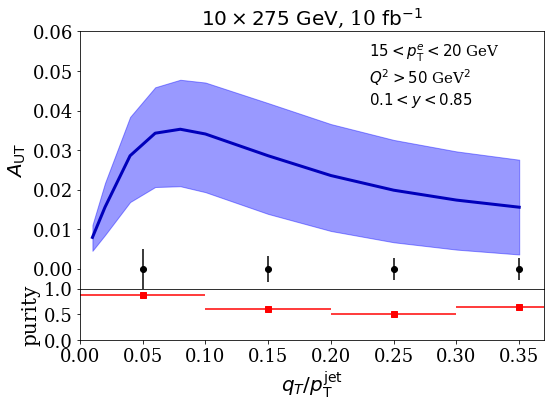

In [596]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import copy
import pandas as pd
import time
mpl.rcParams.update({'font.size': 18})
mpl.rcParams.update({'legend.fontsize': 20})
mpl.rcParams.update({'xtick.labelsize': 18})
mpl.rcParams.update({'ytick.labelsize': 18})
mpl.rcParams.update({'text.usetex' : False})

rc('text', usetex=False)

fig,axs = plt.subplots(2,1,figsize=(8,6),sharex='all',gridspec_kw=dict(height_ratios=(1,.2)))
plt.sca(axs[0])
x_theory= [0.10E-01 ,0.20E-01 ,0.40E-01,0.60E-01,0.80E-01,0.10E+00,0.15E+00,0.20E+00,0.25E+00,0.30E+00,0.35E+00]
y_theory = [0.797E-02, 0.156E-01,  0.286E-01,0.343E-01 , 0.353E-01 , 0.341E-01, 0.286E-01,  0.236E-01 ,0.199E-01 ,0.174E-01, 0.156E-01    ]

ymin_theory = [0.111E-01,0.217E-01,0.384E-01 ,0.459E-01,0.478E-01,0.471E-01,0.419E-01,0.366E-01,0.326E-01 ,0.297E-01, 0.276E-01 ]

ymax_theory = [0.458E-02,0.855E-02,  0.169E-01, 0.207E-01, 0.209E-01,0.194E-01,0.139E-01,0.959E-02,0.674E-02,0.489E-02,0.366E-02]


plt.fill_between(x_theory, ymin_theory , ymax_theory,alpha=0.4,color='blue',label='theory uncertainty')     
plt.plot(x_theory,y_theory,linewidth=3,color='#0000bb')
#plt.ylabel('$A_{\mathrm{UT}}^{\sin(\phi_S-\phi_\mathrm{q})}$',fontsize=25)
plt.ylabel('$A_{\mathrm{UT}}$',fontsize=20)

#plt.xlabel('$\Delta\phi = \pi-|\phi_{e}-\phi_{jet}|$',fontsize=20)
axs[1].set_xlabel(r'$q_{T}/p_{\mathrm{T}}^{\mathrm{jet}}$',fontsize=20)

n,edges = np.histogram(h_qt_pte, bins=np.linspace(0,0.4,5))
print(n)
scale_sigma=10/0.147*treeSize/subtreeSize # generated 0.147 pb^-1, scale for 10 fb^-1
lumi = 10
nscale = n/subtreeSize*lumi*xsec*1000
print(nscale)
n=n*float(scale_sigma)
print(n)
    
erry = 1/np.sqrt(n)/.70
print(erry)
x = (edges[1:]+edges[:-1])/2

0.049910873440285206,0
0.049910873440285206,0.0016336633663366351
0.1497326203208556,0
0.1497326203208556,0.0010396039603960266
0.2501782531194296,0
0.2501782531194296,0.000891089108910878
0.35,0
0.35,0.000891089108910878

erry =np.multiply(np.sqrt(10),[0.001633,0.001039,0.00089108,0.000891])
print(erry)


plt.errorbar(x,y=np.zeros(len(x)) , yerr=erry, fmt='o',ls='none',color='black',label='projected precision')

y_theory_subset = [0.0286,0.0341,0.0236,0.0199,0.0174]
#plt.errorbar(x, y_theory_subset , yerr=erry, fmt='o',ls='none',color='black')

print(x)
print(x_theory)
print(y_theory)
#plt.title("$e+p^{\uparrow}$, $10+275 \mathrm{ ~GeV}$, $100$ $\mathrm{fb}$^{-1}$, $0.1<y<0.85$", fontsize=20)
plt.title("$10\\times 275 \mathrm{ ~GeV}$, 10 $\\mathrm{fb}^{-1}$", fontsize=20)
#plt.text(0.07, 0.040, '$0.1<x<0.2$, $0.1<y<0.85$ ',fontsize=17)
#plt.yticks(fontsize=15)
#plt.xticks(fontsize=15)
#plt.legend(frameon=False,ncol=1, loc='upper left',fontsize=15)
#plt.text(0.18,0.042, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(15,20) + '$\ \mathrm{ GeV}$ \n' +
#                      r'$\langle x \rangle=%2.2f, \langle Q^{2} \rangle=%2.0f \ \mathrm{GeV}^{2}$'%(x_mean, Q2_mean), fontsize=19)
plt.text(0.23,0.037, r'$%2.0f<p_{\mathrm{T}}^{e}<%2.0f$'%(15,20) + ' GeV\n' +
                      '$Q^{2} > 50$ GeV$^2$\n$0.1<y<0.85$\n',fontsize=15)


plt.ylim([-0.005,0.06])

#bottom panel
#x= []
y= []
for i in range(len(edges)-1):
    #n_gen_in_bin=sum((edges[i]<h_qt_pte_gen)*(edges[i+1]>=h_qt_pte_gen))
    n_recon_in_bin=sum((edges[i]<h_qt_pte)*(edges[i+1]>=h_qt_pte)*(pd.Series(h_qt_pte_gen)>0))
    n_gen_recon_in_bin=sum((edges[i]<h_qt_pte)*(edges[i+1]>=h_qt_pte)*\
                           (edges[i]<h_qt_pte_gen)*(edges[i+1]>=h_qt_pte_gen))
    y.append(n_gen_recon_in_bin/n_recon_in_bin)
plt.sca(axs[1])
plt.errorbar(x,y,0,(edges[1]-edges[0])/2,color='r',linestyle='',marker='s')
plt.ylabel("purity",fontsize=20)
plt.ylim(0,1)
plt.xlim(0,0.37)
#plt.yticks(fontsize=15)
#plt.xticks(fontsize=15)
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.5))
plt.tight_layout()
plt.subplots_adjust(hspace=0)
plt.savefig('png/AUT_Sivers_qtbins_theoryerror.png', bbox_inches='tight')
plt.savefig('pdf/AUT_Sivers_qtbins_theoryerror.pdf', bbox_inches='tight')
plt.show()

In [439]:
print(len(h_qt_pte_gen), len(h_qt_pte))

15218 15218


(array([8.360e+02, 1.882e+03, 2.354e+03, 2.376e+03, 1.802e+03, 1.388e+03,
        9.390e+02, 6.870e+02, 5.510e+02, 3.740e+02, 2.640e+02, 2.510e+02,
        1.960e+02, 1.470e+02, 1.400e+02, 9.600e+01, 1.010e+02, 8.300e+01,
        8.300e+01, 5.400e+01, 5.300e+01, 5.500e+01, 6.900e+01, 4.100e+01,
        3.700e+01, 3.100e+01, 3.900e+01, 2.900e+01, 2.600e+01, 2.500e+01,
        2.000e+01, 1.600e+01, 1.500e+01, 1.600e+01, 1.000e+01, 9.000e+00,
        1.300e+01, 1.100e+01, 8.000e+00, 1.000e+01, 7.000e+00, 8.000e+00,
        6.000e+00, 3.000e+00, 6.000e+00, 2.000e+00, 4.000e+00, 3.000e+00,
        7.000e+00, 2.000e+00, 4.000e+00, 3.000e+00, 1.000e+00, 5.000e+00,
        1.000e+00, 0.000e+00, 3.000e+00, 2.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+0

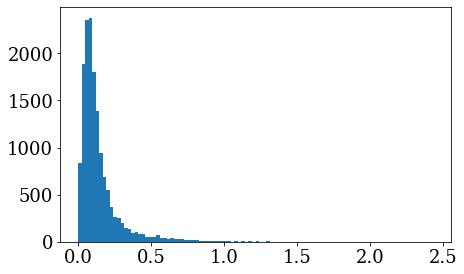

In [438]:
plt.hist(h_qt_pte,bins=100)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file png/test.png has been created


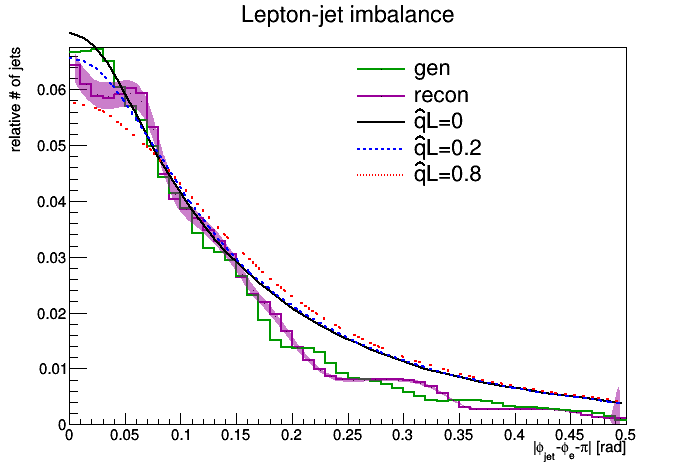

In [143]:
#crappy plot.  
c = ROOT.TCanvas("c1","c1")

#smoothed=False

if not smoothed:
    hgen.Rebin()
    hrecon.Rebin()
    hgen.Smooth()
    hrecon.Smooth()
    smoothed=True
    hgen.Scale(1/hgen.Integral())
    hrecon.Scale(1/hrecon.Integral())

hgen.SetLineColor(ROOT.kGreen+2)
hgen.SetLineWidth(2)
hrecon.SetTitle("Lepton-jet imbalance;|#phi_{jet}-#phi_{e}-#pi| [rad];relative # of jets")
hgen.SetStats(0)
hrecon.SetLineColor(ROOT.kMagenta+2)
hrecon.SetLineWidth(2)
hrecon.Draw("HIST")
hgen.Draw("HIST SAME")
hrecon.SetStats(0)
hrecon2 = hrecon.Clone()
hrecon2.Smooth()
hrecon2.Smooth()
for i in range(hrecon2.GetXaxis().GetNbins()):
    hrecon2.SetBinError(i,hrecon2.GetBinContent(i)*.04)
hrecon2.SetFillColorAlpha(ROOT.kMagenta+2,0.5)
hrecon2.Draw("e4 SAME")


polylines=[]
linestyles=[1,2,3]
colors=[ROOT.kBlack, ROOT.kBlue, ROOT.kRed]
for i in range(3):
    df=pd.read_csv(f"../curve{i+1}.csv")
    if i==0:
        scale=0.07/df.y[0]
    polylines.append(ROOT.TPolyLine())
    
    for j in range(len(df)):
        polylines[i].SetPoint(j, df.x[j],df.y[j]*scale)
    polylines[i].SetLineWidth(2)
    polylines[i].SetLineStyle(linestyles[i])
    polylines[i].SetLineColor(colors[i])
    polylines[i].SetFillStyle(0)
    polylines[i].SetFillColorAlpha(0,0)
    polylines[i].Draw()

l = ROOT.TLegend(0.5, 0.6, 0.88, 0.88)
l.AddEntry(hgen, "gen")
l.AddEntry(hrecon, "recon")
l.AddEntry(polylines[0], "#hat{q}L=0","l")
l.AddEntry(polylines[1], "#hat{q}L=0.2","l")
l.AddEntry(polylines[2], "#hat{q}L=0.8",'l')
l.SetBorderSize(0);

l.Draw()
c.Draw()
c.SaveAs("png/test.png")

In [591]:
#quick way to get xsec
tree.Draw("Event.CrossSection", "","", 100000)
xsec = tree.GetHistogram().GetMean()

x_sum=0
denom=0
nu_sum=0
Q2_sum=0
ebeam = ROOT.TLorentzVector(0,0,-10,10)
hbeam = ROOT.TLorentzVector(0,0,np.sqrt(275**2-.938**2),275)
#hrecon = ROOT.TH1D("h1", "recon", 100, 0, 0.5)
#hgen = ROOT.TH1D("h1", "gen", 100, 0, 0.5)
pt_e = []
pt_jet = []

treeSize=tree.GetEntries()
subtreeSize=100000
for i,event in enumerate(tree):
    if len(event.Electron) == 0:
        continue
    for electron in event.Electron:
        Pte=electron.PT
        phi_e = electron.Phi
        e =electron.P4()
        Q2 = abs((e-ebeam)*(e-ebeam))
        y = (ebeam-e)*hbeam/(ebeam*hbeam)
        nu = (ebeam-e).T()
        x  =  -(e-ebeam)*(e-ebeam)/(2*(ebeam-e)*hbeam)
        print(y)
    if Q2<25 or y<0.1 or y>0.85:
        continue
    pt_e.append(Pte)
       
    for jet in event.Jet:
        pt_jet.append(jet.PT)
    
    if i>subtreeSize:
        break
        #x_sum+=

0.25821729061914395
0.04736579367194232
0.303104432785746
0.08784038497227892
0.5789489357310809
0.3052782126686477
0.7057981987456085
0.022892818336878017
0.1212428079855886
0.018607733913853227
0.7172796896943473
0.42806573094825145
0.061203735113177435
0.13344414785763414
0.9949012378727154
0.02883367865908047
0.17965427547291335
0.013715772454143273
0.0728309583557082
0.10269824713951378
0.10961006257581642
0.34887328686591595
0.18668954367453358
0.1715759064359148
0.37854972094566075
0.38711312690360933
0.8653382224839904
0.39209211035626096
0.9067755283983415
0.474290830715043
0.9997427697257656
0.05649136349882079
0.12664022405309316
0.1707548970834702
0.41265320919046433
0.44458270873732797
0.47163648376204714
0.10645564591595859
0.2255185519138785
0.8691083958945452
0.5520506309439882
0.026119497792601375
0.030102824900403124
0.11962544088002182
0.3967560262374019
0.023354181293220852
0.6852123936753173
0.03212277487557544
0.1008897913845235
0.020589368724278516
0.978044717062

0.054049717733660414
0.550490863245531
0.329512080836137
0.0393165442293346
0.29048329147124213
0.07092343321059875
0.09308410302472844
0.22753982868150432
0.4224460820722442
0.6943506287538866
0.0856651015728738
0.07856051081170486
0.14977879995479468
0.40973020527498005
0.03840223260654918
0.6430020826454462
0.9791307977524181
0.22876505553564433
0.16881574759496357
0.2818612801819787
0.08904628675097226
0.4952840779269198
0.0314725073368452
0.7059034031992582
0.058128566814235845
0.3557589764847262
0.39697442278182
0.05994245536448493
0.30341856512171883
0.3923281095043955
0.7117913714175725
0.11464978148422159
0.19794647336875473
0.015986704941837442
0.6697517030259066
0.6588825777859301
0.6548756609171654
0.16464536127870624
0.09871180170343732
0.32180710197609586
0.03096107570044005
0.08044891250305775
0.109179551322217
0.13691848052492914
0.05328131023988129
0.10535342764265036
0.10498479124435847
0.03721189170452328
0.198082564448364
0.4463136763382742
0.08492162731325596
0.297

0.6216768960490191
0.5758455928130712
0.047138594446154224
0.746016206770548
0.021958830820329643
0.0534631904221244
0.07606515538150295
0.4721278691255915
0.9400095832392441
0.26386254082288835
0.17775810602843492
0.37494286173363633
0.9667177188273961
0.42668587703781824
0.026278534462441508
0.22709128291679231
0.6666521467642633
0.1341928663948082
0.10495038026986715
0.13098890997030535
0.03407108396159579
0.1515730416269283
0.04255808329141952
0.9998217809058149
0.5528005524503667
0.08195828084133534
0.054294653383033596
0.6463818919388761
0.1767682172069729
0.032397883381531704
0.33970736764046067
0.3192353201324486
0.7189959627021759
0.9987138573778211
0.8259544622410129
0.015160259257478461
0.6833603312736021
0.06799107173889901
0.08508433162736043
0.2533564661997363
0.04166185565625187
0.5972125935876336
0.43881538808328063
0.36976416277019347
0.06483772096943585
0.08623404373795152
0.08642720933535124
0.028095846922477387
0.05545555344351024
0.11759734081475577
0.0382972305322

0.5117634074783922
0.0781683504030215
0.34628207457677695
0.15001573236300364
0.8894555226485535
0.4247027911048703
0.35282373911464826
0.17305088948648825
0.03820953781902622
0.03071397455426918
0.4141815279704716
0.14482447558894573
0.5481289113659659
0.015353276216253382
0.29705079251649347
0.17203554089763406
0.3486075527998929
0.18340860887300264
0.021700159025805556
0.504995613222387
0.03561701343883066
0.12079449404163992
0.06729272034799313
0.22146882786902997
0.3224691485960541
0.04079920697497561
0.06299418093489102
0.2974314367865209
0.4183977216282593
0.10253777673499948
0.022216533130439114
0.1128400681092457
0.44083510027457695
0.034430784708088184
0.6707459959167986
0.7047483342825633
0.11737332322306053
0.6615197982467201
0.15025623896273854
0.9686633493756859
0.5945633536475431
0.33898303069463775
0.6302456653303906
0.3363797226752117
0.2199490003463925
0.8949964243239014
0.1993320897362462
0.2361998158149063
0.48518331728361624
0.6638588047864203
0.02216375785422796
0

0.0166651579900083
0.16428061694413393
0.09758327826588269
0.01271585493071564
0.12172069662982217
0.4367825758924133
0.11404004061367141
0.04899306387694956
0.05466825150612394
0.8727706975733214
0.14890954723735078
0.050530451644099014
0.14436847824560078
0.15075459345241474
0.04778637092132845
0.34801421464591625
0.039889341952523354
0.026801656497489657
0.3871252158051404
0.11930774820389121
0.38761322800689313
0.17922046608696718
0.21463158932286397
0.19299642306473896
0.9829681165250613
0.3178854299213336
0.38389701608294224
0.16057804594528682
0.04734604729384113
0.2399541202065122
0.09553411109237755
0.43154456341197855
0.425413551136052
0.01891690448856946
0.08847792479796876
0.042710493468273894
0.5019420586290246
0.08707491800114917
0.14868784504170213
0.39559932509161344
0.11796044404157069
0.12450132652294682
0.161620606365302
0.3947597834101784
0.02751923861039517
0.02550653885883426
0.024122113625745244
0.09036456773173979
0.4051091751789793
0.13476323638148502
0.6389525

0.23197589807931737
0.18557498840250564
0.1721057660858237
0.023756880723766995
0.027421971703656893
0.5690979012796783
0.1240229343162025
0.2564531731984091
0.14325488001253428
0.6391773594940148
0.11587204711147667
0.7861437400215521
0.7277808955628549
0.032797812772614766
0.036434639347071314
0.2550231431593011
0.11850038203109917
0.021044511074641253
0.7969684713680066
0.3891013693458933
0.3066395504073243
0.029796046675886284
0.29073902086256037
0.01925555050855636
0.4784692406644253
0.02968149691198376
0.12569349160426496
0.11834721919364387
0.4219941850146145
0.03320436798301297
0.3827432334055616
0.05051174921417631
0.3776526188653173
0.12501999221132884
0.45530143219052793
0.6231553189612513
0.6530169355827381
0.5835927407155971
0.15154168996236653
0.11439996469578351
0.036127634297833625
0.06166587310345935
0.036471509467472525
0.15173338322089028
0.2302614628459836
0.43139623769819935
0.33062109355041575
0.03514540606438705
0.21637189916455016
0.32568620616007715
0.125935830

0.01909620931209155
0.09267658497688847
0.20238346788673153
0.03893433423070008
0.20741111234522888
0.7763816387525169
0.05315163179165116
0.7183998403839102
0.06950451194231415
0.15040354764351468
0.35086979974994675
0.1734149778080526
0.15524274472183103
0.24444227145342617
0.8260286158219163
0.3773345212472219
0.053602256479716545
0.7003267915279496
0.43676605352904246
0.11779739473196203
0.5420161810380357
0.23441785269348828
0.07337910670918125
0.643717232043592
0.04666659165001983
0.1297511793257583
0.16910465184345833
0.020590802160716012
0.4595601672696285
0.8460134390861511
0.023730059422715447
0.06940280861807091
0.09660748356744316
0.041424710451647306
0.12556187924452533
0.16700837183005637
0.4918389592416155
0.02570832767118479
0.03699780221867664
0.17399545520704054
0.10469527633045198
0.5287138645802811
0.010785444246870252
0.08761553974406561
0.0859402238784019
0.2779104887797394
0.028628997536909312
0.4301907319791037
0.4061063898179686
0.7076745094746888
0.01726704631

0.011304375470598267
0.1752773298879647
0.042829585742488976
0.07596841014824583
0.4207267092020226
0.26095107819223307
0.018944083547834736
0.1894580344203202
0.04191462185928592
0.09684334488432035
0.05811756610787236
0.02355019749023095
0.05083667363916974
0.5737772681216978
0.5158634628036783
0.38351791571421756
0.10994304340489473
0.019545918697216957
0.03195626022791467
0.6008234357237536
0.03416507891517325
0.08231386213333738
0.02254261257808847
0.2045768286066435
0.03655421642055009
0.8797970657918603
0.036856896470388874
0.10935963836542927
0.10115192326960827
0.11849627079161415
0.834726350579392
0.09502390462774524
0.6105744198094696
0.09537603307864523
0.9449304917024818
0.2578314544951885
0.026957661411463735
0.1171414297856742
0.31549418456107065
0.12725802117136342
0.7670212370763331
0.502746944356427
0.9950945072271922
0.23298708221233577
0.1570623361748299
0.9512721987531593
0.9988886039257456
0.17968288046031167
0.32461655520406035
0.26875454083367234
0.0257719619037

0.17167094658452733
0.9663374124789534
0.05677888056241327
0.1782815232754071
0.06415561107004475
0.26543688656425407
0.06872599724029614
0.5195510594938954
0.3284549954198248
0.10158097012466347
0.792325390700684
0.1846126560404994
0.11413193899471216
0.08316138345874409
0.029008818473109127
0.09225242525232671
0.2100359361426149
0.11359924382641334
0.0762653825219609
0.48774058279256116
0.9136732178904898
0.9547429629466911
0.10180885667462945
0.11425895658828342
0.7447875167920817
0.07718960077874669
0.9981359639781867
0.14135763009552663
0.10675432379924858
0.6595038557457237
0.36032757450129527
0.12741830410772878
0.5490838995913802
0.9207272558358433
0.7400810403234906
0.24240292221232318
0.1894662068142714
0.09837827951176693
0.5533891681378603
0.017595366570806605
0.15804888838689254
0.15957975103591476
0.03342147945741886
0.03855080856632306
0.5525943822524924
0.16226014876708714
0.9953919603844193
0.9573896106378765
0.1620607002912091
0.01198167551431057
0.05669050317875882
0

0.16147403984425565
0.33315653250189664
0.24618050495041835
0.062171800099314764
0.8175600008329308
0.054299551747250784
0.462486348262837
0.08870015399277145
0.47992015443582614
0.20649298781941075
0.1790538937805838
0.1221699327752757
0.12293269129131332
0.1693784586717778
0.12609516787572284
0.14444291488325942
0.10217280864181211
0.3154621490207729
0.01702128353615727
0.06379236867550746
0.8625768970993047
0.14707037879936466
0.036829958655372044
0.5270538363826495
0.41270503133953423
0.11312935404586501
0.23040433165233887
0.28830052850739846
0.24369776958825123
0.05129441261144848
0.18003263743259323
0.4432414577789441
0.30307156277725666
0.034592579982071395
0.43598547572112833
0.04625926029830123
0.16997737817113148
0.23106835149139973
0.4706583775322214
0.4390594702385369
0.5153182364767591
0.40964688920927295
0.5233343488635245
0.40068015487843667
0.07694877374414272
0.641200566603549
0.0691497865882322
0.009618665026042188
0.06978458965802627
0.21800664230404157
0.1340055449

0.9747656608327088
0.07616541550437857
0.046286070577424086
0.2732587328676101
0.5003189841610155
0.42677988749310475
0.10608857448281515
0.04975530802590809
0.3871919812616442
0.4314000170352641
0.04715340445520874
0.4030559388998006
0.0722308763771734
0.317174270008604
0.0897189794367508
0.11505034144293061
0.34661192871972996
0.44748862917351706
0.7294802565568501
0.04095119192123121
0.3265447789549414
0.057917607528487215
0.2891402095903816
0.12340682929815759
0.1063926005316424
0.016205541774775737
0.02399208489421238
0.07133251627401521
0.17483975313454697
0.7691362805695117
0.16648190620450892
0.5797367259409605
0.05077582539835788
0.11692174346739416
0.08641430002111541
0.3084092658228179
0.05336988109707418
0.34517440208138384
0.06066809893998955
0.01692320227130461
0.5685116927618573
0.19236314171637367
0.08653599331064989
0.6630567807732993
0.04714336133210477
0.16024363535115121
0.078130152368681
0.2273678875222608
0.3793693083893026
0.03624347628629549
0.04161071526821766


0.21097620583082366
0.5704300245456138
0.7534937914770483
0.06786198714525213
0.312363287193104
0.5842874160737759
0.020638691576491185
0.2688209231869348
0.0950264195602426
0.23865636851874236
0.6905528210693516
0.04650010775019564
0.49590461727667157
0.9970341913993371
0.6662047043282128
0.4564491060394957
0.23518561580084682
0.104479315635765
0.5295512321214159
0.2308647022831706
0.03387526380149032
0.30925347555258237
0.05497015765282302
0.2493994782941041
0.4798509726971968
0.08307444280795112
0.6174051472371878
0.06191604280342534
0.021629622731988696
0.09263724634309457
0.02728215082325043
0.24729213500951838
0.12975621463110848
0.3619601573073634
0.27796134751615903
0.032052929918013964
0.6276545716590527
0.23826207097727342
0.08320207191980239
0.2962901008504018
0.06869310287997846
0.0043827031108598325
0.5566035394232175
0.34608133602127966
0.13509346307270012
0.08837866302798741
0.9850380707380147
0.19238220541290307
0.03016096454516991
0.3593920634237687
0.1622480243303639


0.4434833614564225
0.23963549939305323
0.13353775604292592
0.29474721787917413
0.6540471846316994
0.08568980715017747
0.22459082085225546
0.0265951605715556
0.15940485667104345
0.6346888142347675
0.23983194944009328
0.9958766258927692
0.6208795900590728
0.3550262684453798
0.28996878930338
0.4184998281306812
0.4223770589056833
0.2382658289467397
0.031082742334315492
0.05013140086535542
0.0027898130118794856
0.08996237518928704
0.03149817199420001
0.2565785482877621
0.8207912086268799
0.053734087270560026
0.6719510067282622
0.2819891799809442
0.4739249497308077
0.3360171580512433
0.17609382755549294
0.11803652484400153
0.23299875537240758
0.29664339981276605
0.14685054536202904
0.03353343244133908
0.16993119550987318
0.013396970671962726
0.04197706899421739
0.6163390595760958
0.9998660925969485
0.05584758617211489
0.04366415296767919
0.11054195193459253
0.09070300659070303
0.13553487491969787
0.16215813434919057
0.06421984854199735
0.014205736501033734
0.273375427868025
0.067916838571822

0.08106044109371811
0.17386421015271822
0.6871069351471092
0.1493769610222027
0.0411446759676676
0.010109943667305003
0.1541494350383109
0.47268216988132716
0.999201223899473
0.5588718493982593
0.14726680549600063
0.08810132540750522
0.27311243580710043
0.07784298240577357
0.05126683581748208
0.030961305381015547
0.24109492996817525
0.36623543731444375
0.5126192447699119
0.14439266323045488
0.17243240669763074
0.8721860993390219
0.11012714909026912
0.10661200248140029
0.022263205104934763
0.8878329858318292
0.14017335009389714
0.13379555557839407
0.11737730526146105
0.1399314987153554
0.7887629357019859
0.6145389091764962
0.33247236486282294
0.4492610653106162
0.253752974826114
0.016831093551860056
0.23947066745517104
0.2190910816222911
0.09442230461373882
0.11320106407116615
0.9679545656311765
0.47777832879901316
0.0513085265882656
0.5310878364814514
0.12524167890395177
0.9065923125921125
0.41115561269844475
0.05960655081308411
0.3062029687970473
0.991930547597363
0.8019716308023571
0

0.4255459872576305
0.16263783376052168
0.1931126925962839
0.44693621612342677
0.5165439609739435
0.09205757966344345
0.6032412004847194
0.05127155570895223
0.3168209460456939
0.2730367818813907
0.19288157256637128
0.9087333471283932
0.8383122983148094
0.17932016139074797
0.22874677576547484
0.31906756878008075
0.5194093640902134
0.4626317622334731
0.12558494016799132
0.30451267151139044
0.0488938701331276
0.07454838484569966
0.05943991082643659
0.6641979324665781
0.26664427786653344
0.21521954555937634
0.21261848858382773
0.021741662918056057
0.12259608951354375
0.06597178971074419
0.5503877854898879
0.05238977819812388
0.26914506627370266
0.5422479927632952
0.03589558786296129
0.6653858369229143
0.07669428381473081
0.5692397102252508
0.015730013498326936
0.5526388196988898
0.9141847492044667
0.09695071598617948
0.8616083685496658
0.19685126808778883
0.24585206633303322
0.7175860968018721
0.14925105844513772
0.12163929399685025
0.23473152524736232
0.10235598764694157
0.2320554320693995

0.08415186222495856
0.035648688196206146
0.1656330756453978
0.2313707400464596
0.017180018547179123
0.7708964285072988
0.5680978918900984
0.022133342222775312
0.25310600859590227
0.07875400516740114
0.7374748353765925
0.193840467958871
0.10253066222435223
0.17008711374931795
0.09401163086068344
0.03404817476161035
0.14127819471777617
0.07202242804109446
0.4805706996154488
0.2589075578638409
0.04015168264991421
0.0712324400204191
0.68879806819093
0.7374231276999641
0.21862569312648308
0.6404235327681811
0.4724042223985237
0.43111812304872155
0.03726625549434586
0.5320774164654409
0.571174802219128
0.1775808732076818
0.17328094835391897
0.019103903722509186
0.22729849764058815
0.21838545148797453
0.6712311911108738
0.1304007478384071
0.23205417968788514
0.3535431915608878
0.9970004523045144
0.9990414407450264
0.0007012802270578737
0.21097911179195764
0.03508830761785209
0.4923354972010112
0.14762315655338337
0.18927066490336925
0.11890147011506172
0.2649435450686079
0.042791892840320235


0.18675119503082574
0.08295796324420386
0.775308254462616
0.21068997788771707
0.038114547310299667
0.5347911192934243
0.23416146870470006
0.025252371123948805
0.08232263775636761
0.07614359640996135
0.5647563095475762
0.06439028262554171
0.5815337843840389
0.9976181938291108
0.6027065330255932
0.020094760356735925
0.23720077133522388
0.09699676496995671
0.05280428021186701
0.37934300228002543
0.9943465291664136
0.1318795085513114
0.398474983142607
0.1417525596893794
0.5618617773364495
0.06077936039484526
0.09527828998442814
0.8940344479877187
0.018515278105961392
0.39699226184087255
0.439243746382573
0.08072686783673634
0.12263953227861502
0.12416117892621906
0.2140618911897458
0.4064251648806505
0.1358288787860537
0.5725007667673169
0.9931773028299525
0.0748193797515142
0.09526922832357577
0.46822873831423784
0.03593461887806877
0.11564571110157285
0.19646147741034095
0.9964209878546767
0.039295620061342254
0.009874139737101181
0.7649831781857677
0.014011509314406713
0.119541856019136

0.027596001010510025
0.7173060826102469
0.04076146940056599
0.5107218655015555
0.03695591465557305
0.1497448146501541
0.13122780281483687
0.03984219507412938
0.13780240988552786
0.11117705777279026
0.06307562419366863
0.11035697863484904
0.49578947649959393
0.04921430744303261
0.09886644798053197
0.7848145508372838
0.6317370761405482
0.9931318659383437
0.11467865812858474
0.22864827781606709
0.05657117929645239
0.2024907085275308
0.010495525848132624
0.7532547165389356
0.27779077940275415
0.285580485163766
0.06315206852687606
0.3629995762490796
0.04019880891699151
0.2325961908300685
0.23285873903352275
0.16197038552880885
0.08707066507711818
0.18286155108175095
0.0162553608666243
0.09117619224071073
0.18625982451173592
0.027616177411766304
0.10647699344874316
0.12386491050840773
0.11996308143181801
0.13565594063389172
0.08137779502720847
0.8257942299975238
0.2839328287781425
0.5913683801919151
0.22406603837226094
0.05673455569761317
0.6808434169252402
0.09029282574827292
0.339524412064

0.25393023691317335
0.6497514885422147
0.04966870694527064
0.16612003314774154
0.058338104257876514
0.02162620455503372
0.6108601225678948
0.19513586746627634
0.020151685024880704
0.43798703121118754
0.7092455675624315
0.049171826351002014
0.1811989732219446
0.8355316361898691
0.37276321177475086
0.059020357764081155
0.5709422455061803
0.011419077145927919
0.2047868164366766
0.26780733843685806
0.9973790407521651
0.03412657371447084
0.5129617651694789
0.18860740124858766
0.4562177299217434
0.09692430602156041
0.3324461198294867
0.6198058253659252
0.9827091199391103
0.13022718527772661
0.03332471072802832
0.1448811500358286
0.19316047034504896
0.27800752150598873
0.04240901976596141
0.08085662340111115
0.3194374407399618
0.21401535350920656
0.08287754791658399
0.26652718179196483
0.16166708491799003
0.5074548008268893
0.15188350700373693
0.09419382606021084
0.5611932650928491
0.29764108090815955
0.4971508122453761
0.425202595926091
0.4402820523353616
0.6099851203616096
0.029556148183483

0.2161530751608023
0.009780673459498714
0.05699916793917311
0.11298382993927061
0.05125316499364973
0.39503441055746424
0.04687265533527352
0.04305192171290201
0.032156431261348414
0.05820945621207297
0.05022081824656692
0.7794257935939005
0.3047621654375709
0.18691643737890165
0.08431487689565356
0.28055479585610277
0.09203105814316753
0.024511367099300154
0.5219346781543042
0.17950991957700488
0.28700908336666947
0.03094742083919272
0.028218990936868426
0.34123903769938496
0.15822654653420862
0.09800979493092127
0.07207470968228855
0.3254198813783023
0.243900099876362
0.8244627645618411
0.12398179232297328
0.12102994401805793
0.03753270659200824
0.2836967702281948
0.941732457109838
0.23721952268670882
0.6217400874412516
0.05020689244085652
0.2581190112545124
0.15047295842093084
0.10064377491917727
0.11422535571904831
0.8141849974369001
0.11578844201995701
0.13710357532130465
0.1501860553600334
0.06275044824488056
0.33692832328162203
0.20614956202363013
0.02744881696607705
0.347382236

0.5618271728045366
0.11412219066512745
0.1165521564165934
0.22317538887036112
0.37257982484865576
0.4477300990922674
0.6008326820841073
0.6524284533764543
0.12641289466702874
0.3229303261130023
0.07364751631201448
0.025390888030150285
0.575089954712375
0.2990537985230407
0.06354983323468195
0.39070824615945066
0.8897733752877707
0.13757684969326456
0.02656534550604392
0.054171502612641094
0.1425804614297263
0.0846130838541085
0.48986281535967774
0.08246684763137982
0.0982424861775587
0.047438448468386844
0.9994821170493186
0.35797505196105195
0.1679958526160636
0.040256549892046085
0.26192647497954086
0.3526273741622234
0.22952893211672784
0.10051650458665624
0.27975208993614553
0.429519700251951
0.2237785857208445
0.8644787249345881
0.12280953364365468
0.3211661235613229
0.09843372599649389
0.9306199282830979
0.3845765104262815
0.9993127642426205
0.5520079584778431
0.5882542680505028
0.042675933862546055
0.15801491048595642
0.025719774653703703
0.10090300667843234
0.4298029119491364
0

0.3331815776621944
0.2765504261815673
0.1435082892030955
0.1391948699791147
0.28474615378745965
0.11106629478838916
0.5788759129241335
0.1546447536313086
0.25669303862358595
0.014535524800375165
0.17268250696437296
0.2999452464947382
0.8728633932303815
0.13403231264730556
0.19951443327437368
0.14742644102848992
0.7227610660113317
0.38377360682984923
0.5670098749929741
0.04534968312206339
0.13152231385479846
0.24582611130706558
0.9000899854112494
0.08295888674949266
0.014661685327371702
0.15412876315569282
0.073057887514232
0.0732420970600962
0.15572077407620816
0.015913959988904134
0.2207463330772825
0.8816920180125141
0.04631591476145543
0.05773948431421607
0.19173638678624486
0.2694914369981965
0.2862971741902467
0.3898960153834634
0.08919001841627526
0.059524735255703835
0.5765373155592359
0.05726415803586067
0.195549182346439
0.544746677054879
0.20939208548786778
0.2285953262938378
0.9992801778815289
0.22015413269683018
0.24075884074567805
0.06961470345692906
0.9424514103727625
0.2

0.09124634536298706
0.21043848841514887
0.163717289103666
0.06870272624198412
0.3709681642885352
0.7371912542720153
0.540903341749872
0.542672545226538
0.5300045013527989
0.9937600619335374
0.48581324534056397
0.33441288580691064
0.4996524536301192
0.9969075154071385
0.11193366456155782
0.38692297682010746
0.03519184141212791
0.5128421076190138
0.2068936609003622
0.9997454183969671
0.039126052425946696
0.0204734634389781
0.8012003100689259
0.5029637624341315
0.2042454151645569
0.06571371931686767
0.0932548147484628
0.45010905777867255
0.5872042140545674
0.5303573356257036
0.1812464287636519
0.04068492298003469
0.12972354981274684
0.015655611916019926
0.16701159049686343
0.23312741289335193
0.1108762360327589
0.06617377828243054
0.4224791311690892
0.11010959682101136
0.9149648717287197
0.16984608356871822
0.05145407852869911
0.17831389133320086
0.08885904205052604
0.03835151993466656
0.4286674025096135
0.8455405016997088
0.6815458729330051
0.077685287299876
0.08024118535140379
0.2796422

0.12474138801296521
0.3647224905075843
0.30647359294337606
0.49078664347548884
0.08729840410361117
0.05721536359845299
0.11052696627772976
0.0594674354861344
0.12179547989911879
0.1467131048606113
0.022455711274135284
0.13012314549997686
0.041012176445410095
0.07318308349963494
0.05030720474650681
0.2686116298812503
0.6258419865712804
0.29672072747069855
0.971810492770367
0.02262884097368798
0.1033587756713151
0.4541974391176447
0.02699947027074678
0.09520860817904425
0.928823809338798
0.23015220968140435
0.846594149065754
0.9997130296276329
0.11069432159192215
0.4638405123652606
0.75829503376396
0.34428408294845614
0.4337172090750836
0.03936426877008187
0.07746165161807456
0.4299356666535192
0.901970700569136
0.06489184411705591
0.07384928249630143
0.8129283275930884
0.11041334615348854
0.26913684680643346
0.21488782288597827
0.17130852246301126
0.09135026935423342
0.0749568402601899
0.4600027563853619
0.028168634876229167
0.048884651336837295
0.09560181345656917
0.061708292789586325


0.1587730470001925
0.19462016761025402
0.10811971880304175
0.2952346733826458
0.9904778929884811
0.027854167938062637
0.005705513832367517
0.09435687295005513
0.4248783544545822
0.1786920706313882
0.09882793441905265
0.16075324600816507
0.6164748246660359
0.9190696712746502
0.0613088288482893
0.023858856232503396
0.22064062050997307
0.9990723837038601
0.22905472358248505
0.06185786061597238
0.9997988533216257
0.4730366492415583
0.43064759999184477
0.09892144108255149
0.2200078474769454
0.04948426841536813
0.021064033289592665
0.12450183080805896
0.16205835173706312
0.16759828267010698
0.033194540983060815
0.07890357859585875
0.024927287270915772
0.07702623629418189
0.22051460060551673
0.046066355790742884
0.3279332111183303
0.5189997986123526
0.06168772150544455
0.5222210469177766
0.7593141788104883
0.4133339725368003
0.2141534282118508
0.5345025751492963
0.18877734526659942
0.08083098470000283
0.06729024084063229
0.2077748345308506
0.3891623574233305
0.9991526396848416
0.0553115896275

0.02697878053861215
0.963225861852539
0.7449339306061421
0.012520530992853515
0.6684108189297692
0.3885142459467895
0.0030665061942337043
0.11515732189916342
0.06398977762942294
0.049855623616634745
0.06536286489214783
0.1699423532848442
0.19218060971423487
0.5993726739632644
0.04670846197350265
0.13309278864625884
0.02303165045654933
0.1643604247837197
0.09566270439787368
0.07301592640841818
0.24249167028307234
0.33175363616360204
0.047695652014926114
0.04389420786806336
0.2822738686031208
0.19300209934173626
0.04965912753999583
0.8911282573908066
0.8712674021898816
0.8791817434861053
0.26771756267763797
0.3965726418611525
0.14039445780769447
0.11996253722294105
0.4502483850936719
0.02314307684999562
0.14448556740393884
0.08688859242669747
0.05059262144075179
0.38288186740824404
0.4058525189493709
0.32407153608412165
0.017360306394224076
0.6852040001278422
0.02975968958900586
0.02931920779355283
0.20682463368365733
0.20897428457772607
0.08933033679961445
0.2920394955818137
0.049402448

0.09169433502121198
0.28002032757533823
0.5663075552406747
0.6121551905156324
0.04556467029037587
0.7916793848039031
0.2762867967899648
0.08835521364036199
0.31073216285144123
0.16496028960930528
0.06789417248255178
0.11938024276058036
0.05399007297462552
0.7591268388851576
0.15660163228382576
0.417381499742964
0.09817438862583806
0.3920981175408223
0.013710848483139906
0.05417502457527092
0.020304529967250736
0.15616823136169128
0.05229237285578019
0.26457895580816987
0.3689398783587334
0.36824399336024477
0.09720002393747003
0.10274052478738678
0.16316842264078055
0.11444957804921639
0.10817852151427353
0.20403957932181213
0.37561499265602644
0.03545096154292412
0.09438750740405612
0.028340907520752332
0.15722455296518834
0.17163625618291017
0.14177868604128124
0.28680008255046147
0.13085861397249712
0.05165048941745196
0.49380672154562716
0.48443092908230867
0.0910882324006047
0.3867691162250008
0.03621842987579696
0.09925746406788988
0.09680981648826696
0.23645220345106127
0.065130

0.4241123764995441
0.5233407432878544
0.34911519090937115
0.9982479055121289
0.9992611517415811
0.17259576739730575
0.05613880014588998
0.07136737775199722
0.1266571235673638
0.12267669929369611
0.20720296355047385
0.10616778261102124
0.04526548957417104
0.0804150179899314
0.29919610877102604
0.10521867587791837
0.02214456493082062
0.07692171785551741
0.3229234342881955
0.8100174957803462
0.022509430868565074
0.08394753248184363
0.86807896855147
0.1835346526515624
0.35402056729947173
0.8202585510492145
0.7144914543606717
0.1492684602295481
0.4416216262630271
0.1647287996063401
0.6502938432194563
0.3268352471165568
0.4451741476645571
0.14546511094553452
0.03185415479170711
0.25674724045744024
0.6781875813447186
0.4468401023047309
0.18107018529083618
0.4903334283653464
0.06759317660134101
0.037537317284312505
0.14400522594941692
0.40948616364313395
0.01974810557172347
0.5452723622026225
0.06834306767683956
0.49008880578552316
0.2698778460120731
0.17189237782328184
0.2018816820428897
0.09

0.7238757390791352
0.011202683378350677
0.39622521845728076
0.9634285224342137
0.041030810468752954
0.034794178607270736
0.35363404816662825
0.15819331102144626
0.4667543928577426
0.5263583737455402
0.4271451215567467
0.07520568520219344
0.0656499235788468
0.04987953999521096
0.08547260009629985
0.39189474137588165
0.044274070482666794
0.03469532596232676
0.011352636901027537
0.19389361406181688
0.1374639478866791
0.03972435769821627
0.04279567277150834
0.2805152853333731
0.21104181316243992
0.03683294340011461
0.1750072862924025
0.5686230315988564
0.0668656283805027
0.19892607045232422
0.2194073937194442
0.22111255468531577
0.23623924867353163
0.26811519055199357
0.01704340189451892
0.15481108534778998
0.5035396713386479
0.5648642184895435
0.20808126202965208
0.028683505909810832
0.3905536729493387
0.3960582965679211
0.19461560043373874
0.4650063916362643
0.16253941683203266
0.14567488590036304
0.3069496049691241
0.28006580023264616
0.03494808238623312
0.19615472379786855
0.3279442777

0.3414464101663601
0.15071353988344516
0.09377595894075526
0.3697422765399034
0.44249847786148566
0.21716597526821857
0.48792005785211207
0.0818243378589747
0.1092221981627092
0.03455495939812618
0.19930265594103538
0.08411855229547555
0.46704638835179574
0.04466748828393525
0.35615935350205785
0.2625852370318342
0.3682056078210917
0.18939534317553813
0.14311952912167733
0.28639726387072983
0.20698504065941023
0.12408221449773017
0.05193948494397753
0.2096847089554365
0.9995439831225869
0.05663090800842368
0.3224066213667164
0.32562640392819375
0.2984848812218113
0.13289379808803548
0.5736971398720476
0.22289802370000947
0.04409471412506627
0.016070038959199097
0.3152004736608226
0.012713945422602296
0.06478284329765767
0.1764117963315623
0.26965543363435845
0.32985683310333774
0.29304631124124375
0.41240778998979943
0.9992299790252462
0.30095215067258607
0.3008495706441062
0.23139603551459192
0.5985237382752406
0.042955163174689164
0.31967756361551125
0.9656211836989517
0.097547019649

0.04252480572812848
0.7481864505172151
0.17600244863881645
0.03666426458630059
0.6648710358103473
0.11137250976217163
0.03999221299494445
0.27863229009197255
0.44295973691752877
0.07530109976781782
0.01904680381241362
0.057644931738551584
0.05906662904050999
0.01735151739682992
0.16982703077157213
0.4880968835771214
0.74882019171411
0.5781820020128186
0.2524691942947144
0.3835125695660998
0.06482089730504183
0.19212019789099988
0.14245437016592977
0.3529200492066951
0.09118529609479438
0.637543208765937
0.9563667033468819
0.6786967931589603
0.23831875742795192
0.24218151918977357
0.30628069748727704
0.017611402367361445
0.09232211052650671
0.9884055156025002
0.9983774622675811
0.4454427548845368
0.19303857853869796
0.08832830672242413
0.8544054192310654
0.04638056430939021
0.03050058165297696
0.15445830966525503
0.07914502225023373
0.05500313060223052
0.03946909948516902
0.07001180642824044
0.10728946419568465
0.049097823412922424
0.08096396741050947
0.4974027700746439
0.21495899946975

0.6338806659866276
0.1722597796266553
0.08771895035740582
0.785182452346991
0.01309141613630569
0.11122844193763592
0.07271741339632463
0.5229535274119762
0.09151322471609166
0.031433892030906074
0.10410565686369072
0.5448853545447726
0.36432333454088783
0.23176619395491282
0.15123870865749617
0.27592569412362794
0.13687371322419198
0.10830700809972996
0.4682115765509453
0.6231225592670392
0.011000386973080718
0.9511676770775883
0.17001762314663077
0.44892462071684064
0.05208815236842986
0.02519103131126646
0.4696248147566584
0.04815131902109519
0.04991962147506655
0.35207728166754393
0.25616879755520033
0.875821293441846
0.1643102545275474
0.31066583766716804
0.40393101141352267
0.4846005595552083
0.07991423810643253
0.4450512033749684
0.8160225837963642
0.2302414436952692
0.6376983957477766
0.05023221672820988
0.021146451385278875
0.3715079719002684
0.41357709719510527
0.15622982210209463
0.7301523099658053
0.5691747548846617
0.5571343545665777
0.5061302927253957
0.4585396028478668
0

0.3591103754976392
0.230890454015052
0.22553764036881518
0.46344170039371774
0.047068785929466284
0.016185569316483392
0.0485781607866091
0.08681664435056206
0.281521338588197
0.15700978143963354
0.13199447128357622
0.4009034196606127
0.08203607415429977
0.04854509337789301
0.32916948036167487
0.08929287452089299
0.2606673585307029
0.028694526256398158
0.10303590954380866
0.021147811993402155
0.19904925656630915
0.19897911691110418
0.05336545286335893
0.18689792950947445
0.6269170503907769
0.10937081890939684
0.8664742239824839
0.412744929728042
0.03218566492037296
0.9627922079584068
0.026755487905290722
0.5369011192130947
0.6793322484067646
0.13950430841751726
0.1222140941151404
0.5392323146405987
0.07911056111399264
0.2927556195649591
0.013281278249629687
0.008984951157760374
0.9996409043440715
0.05108398195516448
0.5718454036798631
0.1412560253427675
0.28789335324533194
0.09284376489136162
0.2518213988767116
0.7445374532967848
0.06275410755445288
0.8780489049836977
0.378504045184831

0.5666287231587692
0.6425090999864667
0.19235037878705508
0.467955166981122
0.07709691781420558
0.11083717157907232
0.6918798372209187
0.012404114912998747
0.03198413728351578
0.7950621495065672
0.32752114027186907
0.32354456834410766
0.07825373897465207
0.6400163277668867
0.08032984619681852
0.1226374401475026
0.05039406671460569
0.7574165958726073
0.39825807768150934
0.5439796193999554
0.04748176019141332
0.01676291994054247
0.12166644695496702
0.35792549561154985
0.13741859710032828
0.8458885468715335
0.5867766556064931
0.6431729863892544
0.0115121375138612
0.11719927704812445
0.15536584170740536
0.19485179348105464
0.5809573468831672
0.051777797823846304
0.1370545937525182
0.45787242695205527
0.18694312031330154
0.30699837997871654
0.20085374693400537
0.17064393204442838
0.028416269754198333
0.2815224722248563
0.17614476724175696
0.9377084819078741
0.9772593492519538
0.22385135888308388
0.1969370780420823
0.6828954489987935
0.20456254500828408
0.5143304190253759
0.24467790747277918

0.07154843329141239
0.13008817883458246
0.6875612837815113
0.22048692463247843
0.18066288698853927
0.07645575759637659
0.513731971228372
0.46725724921650263
0.01239441424537443
0.16705462318721356
0.5489436297947364
0.022717859855848406
0.2553815169987818
0.4357688049755888
0.1259704225995738
0.630328061292137
0.10455673271826318
0.11123240048537451
0.1638667613690225
0.049902849552338355
0.02500411623591085
0.6772790704778446
0.07864039049162798
0.6203747464777939
0.4637886252787302
0.20289168192672474
0.4791022748182561
0.29097199137612
0.024420646716081136
0.04732954956858033
0.07979560637776288
0.12893698570320297
0.9486255057244108
0.024593061476934318
0.04568804960728328
0.4090643903898194
0.14073929971079904
0.5865896109080774
0.14375902934290774
0.5327216652339392
0.5460910184505395
0.19945484942415878
0.7930884924813968
0.6535081715061387
0.103756071134089
0.02773720993138639
0.5334618758859196
0.36490573554139033
0.16907975865376895
0.2815093812539027
0.1687453108979684
0.824

0.19095042253475095
0.05751313500406451
0.07274066498317329
0.01481458588640977
0.6121342469020349
0.9148065293797703
0.16688983367766302
0.040513632985351405
0.3087833821971427
0.2256272145879613
0.29894077654896095
0.354321005947212
0.24996658427954555
0.17806596389899326
0.22829836813648519
0.13486356618941858
0.24990326006769045
0.016537502721831212
0.0944978458128081
0.2512491024294463
0.06948105382212645
0.46929435361628186
0.2858660145582865
0.42690948835025405
0.02132605806614641
0.03045731147425464
0.022400627519658538
0.2726460142597324
0.04451954770836709
0.12210363240791175
0.10866227832827732
0.0723587492723865
0.7535858732709325
0.44090943329349264
0.01291117407326649
0.5497653213532219
0.04800671559560541
0.507812832047523
0.054983987614805066
0.06796955635022332
0.7147387174334283
0.05314286390947228
0.23380548738082574
0.260020680528968
0.063910426121314
0.09137658579852652
0.8775671687676815
0.9892600850664302
0.033513249793635465
0.2671954553586823
0.4348333261397066

0.0982469101270295
0.11501277053342564
0.16502694047086242
0.0405029861711001
0.12397430557217663
0.2789918944978986
0.5453207355881031
0.02354261994043568
0.357262409044723
0.09125178386343358
0.06770033797625707
0.8851191702797172
0.33599352055858117
0.05594027239682646
0.20455825253364188
0.48400270652481536
0.05573351045141209
0.04824339219933892
0.17025772333492975
0.039657911903436566
0.13810913605092406
0.1902180784307547
0.008449102705571325
0.26931418321841877
0.2108545805987801
0.13600400689826958
0.5213766333658605
0.23926206000072392
0.9992047528924823
0.24947177995396322
0.23149668547943497
0.2832022475956662
0.17416323038234632
0.7312410551672613
0.03604458193505234
0.18738579583449638
0.05752007653910586
0.04848030790352487
0.7666032892460618
0.12116588163749889
0.20049161359236906
0.6805098011669208
0.37581801660586023
0.1510701771662661
0.07765177077768085
0.10643620907048564
0.19871831038101817
0.7202009057090827
0.0341498024494776
0.14592901140540196
0.39075650492317

0.6522833792897361
0.08499592307533374
0.059597386896778515
0.1197542106770397
0.21713816360747026
0.0658445107069842
0.013125082157912847
0.8476297973636103
0.06519527489840513
0.09049196434772813
0.734658805359282
0.2929359592954446
0.1749208019979882
0.052699433726817464
0.3961147412464529
0.07495672364230345
0.18856273055949246
0.09732004235462356
0.5258527746204151
0.01927628203187898
0.020856581363283208
0.23154223920003086
0.3562999528536694
0.7350101423138193
0.07557208551081307
0.4603546693541946
0.1287035431967471
0.07045747658667556
0.15722151679307522
0.06404050283597322
0.6749024920772114
0.11633520188816503
0.16929464983286796
0.03177534530742472
0.045943354424147
0.06161755232423654
0.04043991827320467
0.0253221549724561
0.14142063218241574
0.3791137553482292
0.4098056948971914
0.0452446014807068
0.8297046242016063
0.7169991863907922
0.049742679587460564
0.09519024483787684
0.03394385419710851
0.117229719943198
0.27485658822144776
0.1516650407717391
0.1856748520985189
0.

0.0721875775468722
0.748321217005946
0.0550267925214785
0.038914627069471706
0.7607565189550705
0.06595170780852186
0.29445771300165313
0.344709591794366
0.03842185833070928
0.5039410168457225
0.03227190468529986
0.2567180274798184
0.03337627910464555
0.008061013340410077
0.07162119775380692
0.13488697360365265
0.11865185490709264
0.14141356172667935
0.4260998717275402
0.2904200367725148
0.2058993064327818
0.24448575599726777
0.030327692035301838
0.18362585119507188
0.11554702473335794
0.04865063702838198
0.41092637435980617
0.09926528959697614
0.0871164932399167
0.41326681787652525
0.012314163687403377
0.23211316770603085
0.6833830361972641
0.23372263440542246
0.09670555779819678
0.49585091870661707
0.4299388499310472
0.9941023074606812
0.23387855726531756
0.05941591227365728
0.5888151913778954
0.2698446901554519
0.024952400428783484
0.10529436387773752
0.09172816659884418
0.0247150649675182
0.15858478182500066
0.019665510754110604
0.14197861330044642
0.5822388640008176
0.538001196149

0.06941208311148714
0.2975388333401322
0.09548895896060663
0.08652521751045444
0.6136911374832859
0.06646635528514265
0.10361018411898745
0.3984332630251954
0.9190080969352357
0.17983784336878736
0.8647892022452911
0.4905155092429093
0.08868844085870364
0.9984950278026093
0.5745040268473343
0.2170597383629878
0.7106699319919463
0.3976039284743327
0.16907618253354575
0.6528058730299884
0.06238772240549981
0.15220963183964814
0.020507371189647867
0.20982171990047174
0.14374408812194378
0.15683839773514427
0.2850345113411157
0.3098311959059393
0.405699239767061
0.10938352201233818
0.33057827016950114
0.04430540775902286
0.04919135511725176
0.059549071690610876
0.6101435300281296
0.1525404611487992
0.1939880648711869
0.046374766538657006
0.3155146461813147
0.15823870316827324
0.1693509297783681
0.24180694777941958
0.4408837264939473
0.12122095596637354
0.22705788235294846
0.5757822358451834
0.20395062778963682
0.03358663478077193
0.014355728523559368
0.14372340270948583
0.5084045626884671


0.06283534942548584
0.20531476584518593
0.6741232382391759
0.8718522140941862
0.11552870151566352
0.03364617564263315
0.6415399810620822
0.7162879574742002
0.012719747763547827
0.0871175470624843
0.03043234252322421
0.08643032920228556
0.039426863815883256
0.20378425091218497
0.6959416295366654
0.41508225187926273
0.17722473506727726
0.2815987920919797
0.06226687681974249
0.13005057208164875
0.9060727427582324
0.10681166227524314
0.0043482296936453845
0.37386209909898066
0.39322779573917493
0.28607107939666787
0.15441542292687932
0.04030627482674142
0.7060538666697862
0.2036917161219236
0.009865339936423807
0.45965391234203706
0.018028772184528412
0.09273880529524854
0.07753099854565193
0.018679024034188932
0.5903726462132606
0.23280449483661608
0.17928307509902605
0.09052896474753769
0.9994444727783344
0.05489130839605875
0.3342452410393989
0.0156561618642098
0.0765528954461454
0.22358991679032636
0.22107613147590333
0.454625297154621
0.11959118419389872
0.29324665688515694
0.75877460

0.37560880792540646
0.06134968510450328
0.15610269138543814
0.31260392088127936
0.04509276050229168
0.19990718062516585
0.4051448880484649
0.06516026638546801
0.7607047851412049
0.09714640632314082
0.06922506199296
0.10666751130267504
0.3072532013901915
0.2766353368969945
0.13619101068301354
0.16372627290619943
0.059138922033973175
0.03833369470133119
0.22116586020554263
0.67766699496017
0.057881084986776035
0.9761405385206623
0.18570883683917003
0.04942088205378976
0.03173192588401353
0.31216704132962847
0.06190713431781512
0.026913121030860614
0.202676132216471
0.7428448058635259
0.96163580415604
0.18375251266172368
0.09030188101356387
0.350989813037347
0.06336047608666699
0.014950376131867433
0.10524658856501094
0.359924885259668
0.7860885877576448
0.14184391237628985
0.1591408484046076
0.36214774568332014
0.19696922286259666
0.2035701623614541
0.4299087304274401
0.06774615555964258
0.9860571497268057
0.197484716208188
0.43182660986897586
0.2432138853005742
0.10119284686860591
0.337

0.21998171529616706
0.2936234611035936
0.5133253735587135
0.046632622601770694
0.1721222581221458
0.02877882628274965
0.17243132003372189
0.07649631694244333
0.3258054906981843
0.6990047921167095
0.10417750677489432
0.04747246251023895
0.22152955660581675
0.7660979443467668
0.03934894099867646
0.17700557453366692
0.6386227162277781
0.17985813601616935
0.44892231352124606
0.07676194143132153
0.685833984594282
0.019255995393954752
0.20900730727514907
0.06587576270899732
0.04399513389606677
0.32481280511990385
0.11442675392495205
0.18611446697178882
0.13130558673783316
0.08256464731231669
0.142102116186491
0.04444654106938121
0.023109783125138332
0.26323750587717926
0.5154366895911179
0.2511707302184632
0.021873076962187533
0.19874802804191388
0.060027184017059795
0.6625199612767744
0.27322318899932635
0.02857708561745383
0.5833108568922177
0.2633002010811316
0.8362329510234442
0.26637223645201297
0.2993346137662589
0.03645026759850579
0.8122500046128677
0.34505345567857587
0.900198483126

0.013795915290635542
0.16522659666828882
0.19150987289362043
0.24087784494346445
0.9916521685577526
0.5456803209442398
0.8963851775951523
0.29939775899631194
0.20225806752145556
0.324636140452361
0.30522116548782907
0.2884455724496299
0.04008537059094593
0.6895391473119641
0.038574354297101286
0.08883330647440449
0.0832209501804003
0.4718449487943725
0.07842817363016144
0.8091859021432191
0.11571184810820175
0.19557377885684288
0.39822322852447184
0.02427401028446277
0.19311264070976417
0.04950353845289267
0.47419860011730597
0.2200363251020723
0.06400821319787199
0.4051005798796383
0.021456801974744928
0.5634186822316383
0.4387720023403718
0.004804491423239757
0.057555231079692765
0.1098066955158347
0.41860901954012164
0.050069874859599954
0.1599619405052407
0.7403953968214504
0.0297706101224438
0.0528838441933914
0.09102027187099758
0.1661370640654794
0.043011511004245905
0.025512134263139016
0.3428342251515827
0.04757585720125138
0.333641172674654
0.11701016126743458
0.7583439177517

0.5092371826177445
0.2721543533789552
0.40991281083929665
0.020906719317432394
0.7956492715731737
0.2831595350091808
0.37466300169202665
0.1338855335650815
0.9805995015887766
0.7743068394267896
0.03612342397044884
0.3892442919783898
0.9976170894827141
0.997747806578899
0.37977430386269767
0.3060220697110235
0.09757708095437047
0.4098805260072243
0.12696293818992613
0.8011559651846951
0.15541312633189394
0.558108112439479
0.046584459572030244
0.5312730707395515
0.20621429688886386
0.11585830231056862
0.0387497172542558
0.10339838583669168
0.06374630038486502
0.1384450207539693
0.006709101284988265
0.04670225131745894
0.33557641995263593
0.5009957600687458
0.09994695919347332
0.7242939826305337
0.07947378127294603
0.2206324454705985
0.15893106596284234
0.17294274185353486
0.059512318930034086
0.2458920463626753
0.5846808286524319
0.39738558694056814
0.5978839111572055
0.3885854498232199
0.07449368119648737
0.2968666325463025
0.032676339649560154
0.05144076192519932
0.3753709383984364
0.2

0.5857870532298446
0.21660441337234065
0.31831935822777296
0.0808117815425363
0.9685534135715256
0.18613704027924782
0.13643095666458505
0.36776195327223915
0.05239725315716894
0.0939020040547835
0.7056222340327113
0.2500476776151462
0.9525509079339756
0.07164378818714569
0.14054377943127058
0.09422082125228252
0.128694746652974
0.010804372980072892
0.12286306845625487
0.15994377950213493
0.0346312029019848
0.2177242123445186
0.22766647246967903
0.8036137152853119
0.7347650369185572
0.33663974823798326
0.997943980137754
0.13815450796625772
0.6538792938941289
0.8378594551386346
0.3403229754356787
0.09616600460214393
0.0423328156022826
0.3249974028286329
0.7090114508847264
0.6316423640751166
0.15167502920011006
0.016145681460256196
0.14910201816916904
0.11787190147409876
0.023965062140151094
0.0270646745430534
0.14857305375335983
0.1265883334948419
0.23212554258575968
0.11315062960124793
0.5706240986579673
0.6036980857145625
0.20800017674441998
0.12455045274937573
0.11688443306507601
0.1

0.11297385774455036
0.12645343712367516
0.15250506056252053
0.5266523652599436
0.5135941783398457
0.07039904541021619
0.4449307066510893
0.0861500169171253
0.7555733344174236
0.2542570717098145
0.08859805873294918
0.05356102655918237
0.24092637367530337
0.04331203005331417
0.1942318184773437
0.05022160572729277
0.8857689913933844
0.054238241023386924
0.014905355536874361
0.9264290590787421
0.6756917121844517
0.41904341731182837
0.03759505151661214
0.22005448790634724
0.10699292354889549
0.19220226873700655
0.07223429761182436
0.15406520893114403
0.2668203421000044
0.10647519447737307
0.06071697322616516
0.05939750538520955
0.5430603788553258
0.0265792083685447
0.2864054079791337
0.0507225476303852
0.13864486650978355
0.2803712795971777
0.4675718030866678
0.9324450208764038
0.7521739808945905
0.5155282067376982
0.5466475277903067
0.7113699888598696
0.4605079130743838
0.09606621719806166
0.47543503306773877
0.4402758944926428
0.11976348423304344
0.31721278472644915
0.8952120236676688
0.0

0.09487762113218688
0.12890150828281421
0.08802278086879178
0.11001320122506723
0.22375041551917232
0.024362358059518807
0.03270765820244793
0.06328809608574659
0.9989289245286248
0.027106809723225656
0.4087931743382028
0.5467275357805244
0.030336389120033187
0.7023504129082334
0.6955875049038998
0.36777591435552914
0.9945555323044181
0.9988256012927177
0.020787253358628716
0.011220677980228343
0.6667910040160621
0.09676514493598805
0.04054402975113348
0.04411365753783321
0.047401274178857956
0.7087523062541943
0.030935394887837742
0.015200848583374752
0.14749009867191565
0.3183001011257014
0.5539478747705624
0.09351025858364487
0.40418766978535403
0.5839655905677404
0.6726994583591134
0.03915726206059396
0.22329727925831727
0.16937028042085642
0.11106307787576813
0.044956310375193466
0.3964260506209489
0.8351415448522181
0.27256072349558524
0.1541355840708257
0.008454051729178371
0.2510510546270829
0.028450764811006234
0.0047415677706487925
0.5389290584999697
0.06289929174533115
0.337

0.17564320772105155
0.18949983065903744
0.13397665282858007
0.015928413942856635
0.06661797174999008
0.3162492841816488
0.024932466010511987
0.5986653381281526
0.01935118069749249
0.09179028350965794
0.11135295862189692
0.062072410850324465
0.018755291455054262
0.241043230858715
0.04870313903704025
0.8380813356516063
0.3468841683458952
0.07427722740609392
0.6255463021413178
0.2163317027883783
0.04718989512196464
0.1793421307929539
0.13430447034553053
0.03735033971673225
0.13794060324090307
0.41868303994134565
0.3970855210986593
0.09577832415282171
0.08498292105530696
0.17722629325445552
0.43007193421168516
0.037457795829917935
0.4218592548564135
0.08156259582111328
0.09184841934253692
0.013271905847886043
0.1133857998696509
0.5062376684341786
0.025472766039800622
0.023191294253375114
0.6201562972812681
0.3482644952053809
0.32361283408871244
0.15729079150780445
0.1457049100488893
0.38036455100823197
0.09363341609675128
0.1565641733077224
0.11120052195907912
0.26315896153642554
0.2269785

0.05748426119316995
0.10646560877980381
0.1616864189716885
0.4566499317089151
0.6539059043965965
0.11169216569170191
0.034333130811204454
0.43539928135150663
0.06144450514583953
0.59878136545109
0.4383028644394048
0.23626696240514802
0.01949172257848606
0.6700584564929091
0.15511270023089127
0.03052714434714221
0.456796603089448
0.03870816234319324
0.6603121013966909
0.9997853347871127
0.17425788641481202
0.12260000900995477
0.036259448286010534
0.3273719354298797
0.023507880226417095
0.07615143816173972
0.022106302064281803
0.08741433809170761
0.030538457453450827
0.23858907795266662
0.1963010101219234
0.014205042908827497
0.23410923053677354
0.03280097477086118
0.01176565350555689
0.17736785316233625
0.6297176401431069
0.33516468182766684
0.12408943628198088
0.29841276304392805
0.0887369309414462
0.04820606094406458
0.012003859218395675
0.48374097446156805
0.11898058454152242
0.3286776776261122
0.4182352661889579
0.13557316407340333
0.0248867592566434
0.0418643347337102
0.16573892621

0.25104621256100795
0.035865526376356656
0.06683122351515394
0.016853498304407348
0.19392929909738363
0.9997502170184609
0.03727809504063846
0.5638477769762271
0.036513212549583896
0.07394812009422212
0.1300026635696505
0.15456977248502254
0.7126206786175722
0.06601402128266456
0.9997460947824035
0.03984821768496449
0.043324113614616924
0.18173571625280474
0.7511017016934592
0.04906317109390302
0.020722217500636502
0.042158045244308315
0.031015720668484417
0.300509441399744
0.11524044029319352
0.19245757708421835
0.1497651212260507
0.72594014446543
0.11658430785369692
0.47612261226173286
0.5253644618801511
0.10265497671047492
0.29850693868194106
0.6554540433961487
0.08107302218978583
0.45893716649403754
0.09748782917643735
0.20233653630757115
0.014247916966511905
0.3728068414925366
0.267949890024713
0.11065669012348074
0.13503148558724126
0.2551092320723075
0.11572859457316
0.02124429220940586
0.5585182732156552
0.3286682318925258
0.0870558519525372
0.14552878668677915
0.09549075282339

0.15261243514060938
0.13441677213495415
0.20772116953129222
0.09615290096811475
0.2314434433251777
0.21386313119722639
0.7107355257731224
0.6165436695531924
0.26631092046637894
0.19044969912434068
0.44882898453835335
0.9995455180393195
0.26756020403701
0.04768910888787995
0.11633281642678493
0.007658937119229833
0.05368366555627759
0.02908273051250474
0.054283936233886186
0.7986484365221727
0.7284461937905561
0.1982852616277852
0.007838557997547593
0.4154796218819974
0.04355458475329191
0.06701304732086984
0.8420008459203198
0.019266533394976467
0.30001103224304365
0.5924167252164023
0.9986346411217242
0.9993928297514953
0.025605139184667718
0.04710360598728755
0.22265522380894134
0.9495065076324034
0.13220109050465
0.38500284886486186
0.14133745115005902
0.39065977377749317
0.49689437360365396
0.9423815869561565
0.20070205977912428
0.033696407972588924
0.017344329636602405
0.17666670555978128
0.544331415024738
0.023122443543600657
0.258977827617602
0.22822399687680728
0.05308008262508

0.27170957756402825
0.05749568423948583
0.835410146110869
0.5469136503831536
0.4702705708520607
0.9987143546280687
0.9993455006581501
0.12904387041709137
0.8468541227302893
0.7759948482499267
0.999180829093114
0.8133012916376331
0.8027952132952277
0.05955441492628567
0.7679560935560801
0.6373841370034574
0.14697801601416974
0.013754284568472807
0.31929015735337996
0.05199877157407265
0.5058706858649578
0.2852440153866135
0.8416671044857337
0.3321898319330615
0.2797260530758216
0.19037492066468845
0.11848543173981202
0.3307973363088131
0.057605646437940874
0.34840963049934864
0.01804999449073089
0.9064706815306008
0.11358702211706004
0.7482752247107758
0.019559970812398273
0.10518428707243126
0.3630620329261306
0.14014041703594413
0.11389396748087677
0.378199993725269
0.39088224837545354
0.6173184589348443
0.2118601755049984
0.2575303125586441
0.0161464690712435
0.18108587391049025
0.5858028365031694
0.15002601560310808
0.49542815983832256
0.25389570045625076
0.17668657165199855
0.59354

0.17075474643863794
0.01637591813430169
0.045159654138982694
0.2925931450862129
0.11108325629877716
0.08961606952350311
0.9997419300383772
0.999798023277647
0.6243188646312395
0.019891115803020755
0.5464333667027528
0.041738504324120615
0.9897929890403732
0.4058147207139287
0.149762733106141
0.06680943520662957
0.0902621159348509
0.5087437991157118
0.050171638612846764
0.01861876276371643
0.1753860585011975
0.8127164179264476
0.0806541449674116
0.03563081428255678
0.9089383761928355
0.8834314561925749
0.7676984026678673
0.23713252957718625
0.038379017197900205
0.08285261450942366
0.14351932143451382
0.4971826035045212
0.7661335126609032
0.11745611785425598
0.08480898712011904
0.7950427217933838
0.6705173911437577
0.05985569478111313
0.3597672427544033
0.38732239865927487
0.3763063638808181
0.31684191338842027
0.12385556752449178
0.2719853722228425
0.10519035692535794
0.3198613353951089
0.72818434710382
0.15706054940765118
0.08844131441364148
0.3399843069012333
0.06163895380278473
0.206

0.05043452001046135
0.0768724849322671
0.11275198905741683
0.01687001287630631
0.14059501252678386
0.13854157701990147
0.22788664714298668
0.1367131063801939
0.1563051089788163
0.31187791078461025
0.5918847937985877
0.13109352969984933
0.23004324671369578
0.02645093263257699
0.32710186867831725
0.5299208225546969
0.16495716019542206
0.10826706166334467
0.03590639610242583
0.49001224288385625
0.032000542479626186
0.033672951176831487
0.16104548317583176
0.442838640098811
0.021487689887415028
0.1808271430004687
0.030454617115753892
0.5868270702972843
0.2575331804244318
0.2103793485442561
0.5063180119956096
0.2135991811040743
0.3809846557141842
0.867807368042635
0.013840029811383044
0.1970217399314724
0.05421683537191211
0.23124229868143759
0.5404150330943304
0.31408390186732726
0.7606822344588268
0.7204702903834055
0.02438275432386319
0.9818174697369446
0.0283681165248983
0.332261374100377
0.8351398124745398
0.1417632069160315
0.06265442077087911
0.39412816091579456
0.2376203795052258
0.

0.5575150686909777
0.6043090932510966
0.5601829068780277
0.12534367437358368
0.34898870760174666
0.09551492960817506
0.058973728033711786
0.2780760608928296
0.45257278923253563
0.1859970348819072
0.0795645000514903
0.21289470126860002
0.019074948873879234
0.04390171814570779
0.0766059686832107
0.07670957606384837
0.23825324364543934
0.2611534980311319
0.16557153278465525
0.19518946871000248
0.6031829177934801
0.3529283322688953
0.07376291414963408
0.3323857769683492
0.026013693764368462
0.37616550445550373
0.42408975574558994
0.025430574244471944
0.00368347531848443
0.28383308436834537
0.8696277781441379
0.9993449805307381
0.10320766627232844
0.5825159709553424
0.21876933608918855
0.039542317252548455
0.17149904034460012
0.013911581051525962
0.15203640079317077
0.29343659424725244
0.5044436395732618
0.4336587377776903
0.8622188637691973
0.9986359640609523
0.4425025465126309
0.998726107505816
0.041941559511086725
0.11835108039345876
0.3190792921199923
0.2789630107259635
0.27951538078996

0.041180693672174785
0.5229200384540401
0.1746820969409632
0.6443178399821062
0.9409474227298422
0.06099275407030773
0.026781084615546888
0.010916185464092044
0.8565499556533237
0.026180144414111928
0.038035869479616576
0.593818871285117
0.08794951881931011
0.07526276077537947
0.1026856550283424
0.2474125610528228
0.11282809093530541
0.3774350569269536
0.4220266827482425
0.7131740745762459
0.26376982290132445
0.705181900544837
0.06590427034819007
0.2891756709488252
0.4195505297976839
0.022383886864353927
0.166612184811534
0.7557968257973143
0.8909134556412011
0.15750456926580345
0.309599897840221
0.3738812492250075
0.26526360345007494
0.2727673189470499
0.44773123116839436
0.03761333037095007
0.9993046977997629
0.7486459238693082
0.09360060360625098
0.836406159759968
0.3104957069859194
0.2039829973634141
0.14981989407960142
0.05650943352660797
0.5141987786708551
0.8039181597438196
0.1304941382486534
0.024258300250950885
0.29742008286319016
0.07061118621796549
0.040639736932905735
0.138

0.3663679664500424
0.3427971956871966
0.12371728698577539
0.08682069149294981
0.05475580214223429
0.07009072301490643
0.20249140087945927
0.22939774068751892
0.3714288962946825
0.786692906428919
0.19074051753483168
0.039913342873824864
0.40973442057572185
0.24636671905075677
0.10026159219473675
0.07758765701761511
0.12561058066048472
0.10516864377943243
0.42390189118495847
0.07586176717378651
0.2672325835666076
0.4872990153914921
0.018177570773918413
0.18223227844487053
0.5308288048628793
0.07984887165448946
0.31220431568430834
0.131248810660043
0.34330858566318145
0.030626525095045973
0.1525621966956957
0.03401836651110113
0.03575456727091644
0.13708746478824035
0.13690158111748135
0.25766023981507963
0.011863627863820411
0.03379517559113074
0.1611394569255825
0.3049249687761165
0.04044440260297654
0.4053356935899592
0.10098425879369657
0.02191157495144378
0.7990415456944862
0.7327408615153128
0.3794778669829692
0.03370194648097067
0.23158996306791424
0.2317401604048772
0.999422153130

0.05712418670194567
0.058879080390529394
0.31119860211068556
0.06878761663770191
0.14522104748816503
0.11007380272823102
0.4649667197877714
0.24154813753538978
0.31855695835930115
0.8073645727673229
0.1195901559173667
0.0777649769522176
0.42472582800578007
0.01789176220810283
0.13115476707120044
0.38926755132608165
0.7070752154832398
0.8660497623679588
0.2385660580003881
0.9875258807290186
0.36161083553555157
0.9781634118829632
0.08309411691681465
0.5064578595735801
0.32103352708206
0.17176749128605812
0.23552548554612615
0.08919311750955011
0.07620969358879015
0.04082841929747808
0.021721682837622058
0.039018382980917206
0.7076427419649163
0.0444027522420618
0.4538388954731005
0.01330408490481944
0.9996031044940634
0.3255694982512891
0.04685618960327172
0.13886150482720125
0.5206791551795681
0.45838523638821793
0.47223477426378674
0.38120751192563246
0.033415255191153154
0.35961021775371127
0.04556676623946195
0.06132288767391321
0.2266196704254207
0.2525907311592909
0.105637866810585

0.1633592536514952
0.012062652079551742
0.03020967082340692
0.18756012869350758
0.19274506063187527
0.15942601226892963
0.36140594328421893
0.4225930873109975
0.07651497581407159
0.22153278291490386
0.7772806412814194
0.016515914933841826
0.0315103479645547
0.43003170232532223
0.9903496530488582
0.06050048658039656
0.42494139030369676
0.3335461430054061
0.02905700513384072
0.6510228863369617
0.03544639703026891
0.039843525793280245
0.03339577230347563
0.7308568250680597
0.04682685852046435
0.6786684759123779
0.4416235816941854
0.7479513721811163
0.034500578841088037
0.20267098706494951
0.07893033378067968
0.21195748118305124
0.04414072205335931
0.4463098606790298
0.998853933127905
0.01913113907138441
0.0905562733896134
0.05046415174320138
0.07933822648767462
0.11153537507525606
0.08140032996479532
0.7436018049659966
0.08226207133279291
0.006331365594992467
0.6059455032453062
0.16476728034643148
0.05632170276500393
0.36626093864532727
0.6955374285607351
0.06485514318287042
0.09118483041

0.006989858612671427
0.27613764731079266
0.20802514280711815
0.32455074475184204
0.2300153632979549
0.10625734371983638
0.6468624517667472
0.21430966538156707
0.29004931601427747
0.15525714414955352
0.0132081250171735
0.21530059211541472
0.13292464437498883
0.08105424896894316
0.020173113957228154
0.14592565733666069
0.37605776963678395
0.04465318425805806
0.057303997730138743
0.05355324873915578
0.9323813479115016
0.10609500519590133
0.09124723182371666
0.9994963964847761
0.8792111696793254
0.04940194077825002
0.4318740505722155
0.16535329028407214
0.7700613400992624
0.43657413841402104
0.016329647127289546
0.02395326784438939
0.5267306811192066
0.6171216599550344
0.43865695547292727
0.21746207393866876
0.09128310953620312
0.22617627969773732
0.40307496922034225
0.03593316091552451
0.058993260217529216
0.18385850361125344
0.09622947857625114
0.5839234970414464
0.056766573602088685
0.06703224999848659
0.3347768941518812
0.1800560943011442
0.16220776982101492
0.9997173986611915
0.296177

0.015182092894029215
0.024120382436892
0.32575979409863565
0.03433809524221338
0.21303179208345147
0.23433349478794954
0.6816080935548295
0.135154186312844
0.11714473640400765
0.35794105646299035
0.08001098953993226
0.15247359489964613
0.39783890730558735
0.07391415962393277
0.012085420062611412
0.9907981626715072
0.5147642131590303
0.03420980980124458
0.22094015092454306
0.07211290122796754
0.07134611939924283
0.10836876352892236
0.7424301183105693
0.20778769382672058
0.23558660634549616
0.21769046629932212
0.0635016424615512
0.19157795915617443
0.041203279913260275
0.4540055394819232
0.06970188438866834
0.4722285481609498
0.5442307686202736
0.09678076973400547
0.3574318871399126
0.03414998860909142
0.08598347879720816
0.2986313144385495
0.4595097831443522
0.2927957219015381
0.5145330771895582
0.06632014302667813
0.3262316663301694
0.2799112900145965
0.9997024329906846
0.7175484323118445
0.2459326793913411
0.3396656444224373
0.46857983785131335
0.19023589546500896
0.059353171492454754

0.152831737168598
0.5323889369852284
0.7114991109296018
0.3891817051276585
0.6341876322179528
0.10991759473590013
0.19049965327664428
0.024385791863576603
0.01838920116086347
0.5106545161638009
0.04368030567665814
0.5136643938848988
0.1303445198956641
0.0677443275095053
0.31216137827643703
0.34841522543645836
0.02394777258538932
0.1530769892375557
0.01626989619471741
0.08841579234749716
0.11213169079798554
0.17672374906560379
0.03888718685201962
0.11651727947883496
0.5448815878292459
0.06687768881784066
0.1934127815413657
0.2423213954826497
0.4371033299555719
0.9994562966929718
0.7554322328139631
0.17848040844277416
0.04919358009132872
0.045511059679826375
0.6411999955431262
0.35235640036915433
0.7683775594056201
0.3788103189065273
0.292389692587607
0.5979186042233974
0.062152219251715386
0.998703169939409
0.1264628980269561
0.8042950340840556
0.1012502099705344
0.8369401561293979
0.06771591640387165
0.1456681805800675
0.10470718084117053
0.147261278212647
0.09632185452942499
0.8066583

0.2431974259743894
0.09595093921382597
0.3273743756589002
0.1450892335343922
0.06905290297749665
0.08048660102128928
0.3133640079237577
0.30471763283635594
0.11506848210863124
0.21640007191526958
0.10425355325341122
0.04723495590660509
0.07030729558709746
0.3225094882646684
0.8763206744553728
0.1944016894747646
0.7530253429873319
0.04602029706412201
0.2724399068893906
0.15308465056941045
0.0164965689612932
0.6137597419445946
0.055367327694408316
0.024172018279761013
0.7706652437647249
0.12163771375124932
0.15042094472751158
0.6776185095173161
0.2717074152501123
0.25706425335822236
0.35706195201673047
0.6694758755480502
0.018323118013421947
0.1400328090636551
0.08330125678690234
0.06952061829715345
0.020972029075419923
0.7679632827688548
0.13769528490473568
0.060617343159330345
0.302010592414033
0.41327455820654013
0.033901370588921856
0.49450477269069326
0.13693238678656816
0.6148274076756605
0.09949766476697315
0.022024621580574777
0.31371593953814414
0.03020307108760497
0.27221675973

0.012484870082911536
0.16791783792860693
0.16021816939920716
0.24879103485409584
0.4362483457059938
0.24405880756473014
0.03373206608986673
0.10768185701817812
0.08369352820544704
0.3406898472634207
0.0348177047292305
0.24839444040592515
0.09788713235334542
0.40167919868439156
0.6784823539801618
0.13241452526612044
0.8862070490527106
0.3066307142600179
0.053927847230611475
0.2834212947245713
0.9682574891775685
0.25139747264765944
0.17893526626310272
0.027277035880578396
0.12957722961455004
0.43892529572829453
0.07270683812157623
0.2921678794698964
0.10271649409716775
0.18616227123885484
0.01624851110410869
0.9995283482561275
0.20826484341157236
0.08297672498146111
0.07702006492899796
0.03331617289112124
0.022663060955563794
0.11926333285589533
0.9325272939030783
0.033527823937310276
0.026761835037135785
0.2926362748634056
0.08340647698642523
0.08598615592329285
0.14678592175003205
0.21130844801449827
0.17974945817291552
0.4308703911181838
0.7940718378923787
0.08354966943789759
0.376632

0.020088599351597763
0.025385547834299152
0.2908237207257716
0.0472743403446278
0.18078356686837593
0.8816995741812997
0.4081948287274863
0.062215691990146774
0.011593286631898046
0.19303518094019775
0.04210579079673352
0.3710754058957319
0.02042034702079183
0.081832448482968
0.05213870913365641
0.64157021719149
0.4075795534295525
0.9977088315148337
0.6809203561850072
0.5108365256932407
0.37664456548583053
0.22280784321669989
0.34093782104975967
0.15566365568104848
0.7887468753000261
0.3075898507056893
0.1388613595858425
0.20341132316261482
0.12264978420852972
0.6054590260521437
0.2893156732120112
0.2409885230879866
0.1628367377148192
0.46620760337455547
0.2724821502827268
0.03393801645685402
0.456598841253712
0.46644847884853485
0.04064984880333091
0.21601062548408198
0.034984977158494975
0.1565585574382023
0.8036054732141944
0.9422418349848903
0.9513892857340187
0.8009083286538263
0.22947743271149898
0.5061870014227658
0.9886771374841171
0.5016878183574188
0.08085496220215248
0.60995

0.1616918767988755
0.07262064490827466
0.10876882161835637
0.04636905999933833
0.041338183986868615
0.25036001310436856
0.3018530176832628
0.7828435293480629
0.016210240916919964
0.008438567946260866
0.2573762467129839
0.9661121253824566
0.657327061590314
0.7097640481126349
0.12832582089588115
0.8972701116346243
0.12379667723454292
0.03750242144901055
0.08076547626303754
0.022070981602108134
0.018523443301872812
0.08293453157881742
0.03175850774111415
0.03732976418287328
0.8287699665412164
0.25313335581575536
0.043155583147189064
0.8577762403982203
0.020218571074931534
0.06902541030307272
0.3166826132928706
0.48457121876451215
0.8901754337036193
0.07267120300000461
0.7756980729610415
0.11270533461967625
0.008889374075407118
0.10098007223699955
0.0446852681396769
0.29654756714584773
0.12003600504393917
0.9945040626361145
0.2535840606822189
0.17064617685266245
0.2917431496963095
0.3132797954154736
0.04136447757042633
0.040007915502897715
0.22984493274900916
0.3602796420753198
0.179892262

0.06557954788459208
0.16430308222880452
0.12529860771260026
0.5790633980917258
0.035559618428151675
0.4540203980589987
0.0855115718155534
0.13340216370337973
0.14256375685333264
0.1041514616528591
0.5215612854347855
0.07974449743192855
0.157448536916227
0.16945464409068764
0.02034785496627952
0.023299287596975186
0.06966370291850946
0.18819268664981595
0.44985861597345883
0.9996842552832237
0.5162640122237772
0.22551220253077145
0.10796959692286043
0.028772711738096778
0.02788644913468713
0.2276926192219727
0.25177217627914594
0.07584052780263101
0.07138943842525292
0.10553446483816296
0.21789614074668115
0.05969363325286876
0.05089465481584104
0.03539887972789439
0.08559203615574712
0.02805730775614043
0.025201547248528463
0.3875629724266243
0.3631278220918149
0.028273187953863757
0.7622866308015019
0.022388265956524725
0.6613602114117928
0.03256197806544656
0.6200228506619214
0.05109863385705496
0.02981918344875722
0.14942857848177518
0.031765402610532324
0.36315341021630515
0.038377

0.44098368099597457
0.20109143112649844
0.015436830951365828
0.7490207730884381
0.033961171933226814
0.3336478729434893
0.08685128870262131
0.22459439044228688
0.34643023809074364
0.13761677984393703
0.15535612926914757
0.35098497946473883
0.32562589259307334
0.04786184041944715
0.045948702697799784
0.1613822912414368
0.13888993893040347
0.06634507268880428
0.10703814280097992
0.047697541181008295
0.1554838879862346
0.375086844364564
0.1624169075631194
0.02018530970587739
0.13255363669929685
0.18156123764575574
0.032999720309265575
0.040863794014303456
0.16279710502539843
0.9875969606431494
0.22383882486842913
0.036571269714756285
0.4339615982080349
0.999238020167644
0.07872056822359522
0.20742829911297925
0.5956985317473206
0.0216771124257294
0.21870896328621883
0.3955184453378365
0.13765541552160493
0.27657498115150286
0.06043238320124045
0.2846803938952233
0.5687052664171829
0.03351169855513424
0.11510469450107226
0.3538241132466195
0.9984447298993137
0.145691613807599
0.15699324472

0.1129406240211333
0.6948846890344835
0.07054719666836698
0.5813054929726527
0.05285034261812545
0.3367433770945559
0.00954376170673993
0.15429971750754207
0.6161367082445969
0.8278777268754988
0.26541147839763984
0.2438693982447823
0.4651406970012488
0.054506262821251206
0.461447813426898
0.008849794862916366
0.06410083055780219
0.18786801998229394
0.6102185693785974
0.01958427393133056
0.18696365293751024
0.08779823557568756
0.07244081722257217
0.28931651061730773
0.09972040233706767
0.29241968072917246
0.3729534311206031
0.19077324347887722
0.06754403460751458
0.702510442307457
0.6359280914435956
0.5860848390156103
0.009471322660864723
0.15169983224225536
0.16286999695210894
0.33425083763683994
0.31909006326088607
0.09276472691368512
0.4774466940348627
0.2526780167959617
0.19658685760400413
0.5024488361205427
0.21300798678505153
0.12240525121679242
0.3784695652140876
0.05771230255331039
0.2203111626596781
0.1150656914245163
0.23054804222439934
0.49733035915644963
0.04283373031091717

0.09305956356064009
0.19825506316582892
0.04314184841023262
0.18394617672333538
0.6792813184031544
0.09361556198115105
0.09781627723578541
0.06065348566939369
0.04858062261520729
0.2347514003182313
0.16200026590521535
0.038274429167923764
0.9997362897695768
0.052009381283024014
0.016629254942225176
0.07292568079554493
0.29802095409324947
0.1747156236157045
0.005813781532812323
0.07530825573792944
0.14549917095820863
0.10682703780458319
0.2285613390860861
0.29393407882936345
0.04588153450047326
0.024378969542676855
0.08639250952526717
0.03643379291701228
0.21495746131193216
0.3400287361393671
0.4280623874489621
0.3694524616651094
0.32989024637157754
0.09979165578621503
0.16700560017342925
0.26851131676357987
0.10436883664575178
0.5733642921670514
0.04746857573791079
0.15022781546886482
0.08729253160700595
0.06107181016454001
0.1521050027509514
0.09566051240112793
0.9972562455348837
0.1366693834309081
0.06053966527908951
0.5551257244706445
0.3863512548041063
0.19539125723395104
0.3288655

0.08595576326236508
0.9961888020394449
0.5066238220562914
0.08549709191116792
0.05748156842168661
0.22421282301182413
0.6424425947241109
0.049492337577238484
0.9274581825571316
0.02781580125094222
0.1753870152237324
0.04244000704718474
0.5722189472787571
0.20814428103649918
0.24534117304293757
0.09361269467196627
0.02085961837147023
0.34396055690047916
0.6794243539411595
0.26025975384498024
0.1032279001060504
0.23421445166484411
0.7307419536768822
0.0347726556224011
0.7880305718867892
0.0248819388088957
0.022610002855614285
0.07753703881493733
0.064017918883634
0.10465081358759484
0.0466466277301057
0.5859143164309798
0.02372928594935395
0.11913617785127908
0.13405258648297666
0.15679223873470272
0.3939210388900838
0.08243163969274997
0.06511038443591442
0.1614990655329557
0.637494827101937
0.13253970057101946
0.09936895391482409
0.23406614009401286
0.06376214121965422
0.7254315386160362
0.033697485682237543
0.6383217028732
0.07356043145786773
0.5436024259069938
0.17342677387424674
0.0

0.4769003342635921
0.13595651739834377
0.0626130994402508
0.24678136330702732
0.07825665941795215
0.1505135084296334
0.02529524202303073
0.14636805910260714
0.2279653248785421
0.43005380663697534
0.27820283980469845
0.779975602564708
0.052769715544117295
0.3886775857809603
0.21795162208248914
0.19608116051229607
0.2393689416991278
0.9988431143244987
0.9990996654766346
0.32871045448278147
0.2819261793297978
0.5420721034402546
0.09883934087197896
0.28279640798646327
0.05499110862516975
0.811921259802328
0.010412197326875322
0.4794800391185961
0.25145898334497724
0.24434250217415987
0.11159476099130734
0.1939640025414042
0.030057940911448294
0.22332955607743263
0.03582746781209289
0.4149877574500599
0.3624806654335171
0.27731528188441606
0.8840709636295193
0.06767372870901463
0.65968980685724
0.07339394300460927
0.40836217309905326
0.14903010106229442
0.10389428088702053
0.14927468767875088
0.6724348250695075
0.9996709190269527
0.12833210664083047
0.04513960093829285
0.49609465786660406
0

0.21125217963152296
0.09224363921075321
0.04131197363520189
0.2673629674843487
0.583218099633011
0.07563848578627042
0.12943887395417406
0.05486997899839487
0.371526481303047
0.07381400370033103
0.6278092208519283
0.03312039114741792
0.030185928637794658
0.07882746360407665
0.01717553674047901
0.9832688939858532
0.8141358157138543
0.08294135868406526
0.2713947662995577
0.011086254963394843
0.6029372934142136
0.07645917057616068
0.31400721440804413
0.124377028051104
0.058561742189240436
0.06830890610796952
0.2381843824659047
0.25756849240170215
0.11851652021553552
0.27451080290411284
0.373604779801629
0.04334377624957428
0.04161167976339475
0.011433461399741926
0.11523314210256191
0.30738949524573356
0.056057195402192554
0.5427619026489394
0.15269006436762622
0.19468738005521125
0.5158060753142881
0.024977519356659064
0.08052550010350565
0.47805938579819945
0.03674601082087855
0.06048962854122814
0.5265813254257228
0.2534056211843431
0.11102459428030569
0.4868115995895682
0.508781021741

0.0036164595761478116
0.040257552472351556
0.4532077710083318
0.051446755507608986
0.05522097762576191
0.3988998017256078
0.1480349090854943
0.06701754617510793
0.7409159653381852
0.3652288829163595
0.0969832113770493
0.21143232192205766
0.032585802441568786
0.05427100285343103
0.3523824296921088
0.06470894813469752
0.054658408596268714
0.12578272604837215
0.9451523116373296
0.06976594458624778
0.012214811155287017
0.20489753841165623
0.20451466589937056
0.3233787643209945
0.01002770253158298
0.7245466411864088
0.11594750790483582
0.58088835401042
0.03538408164753281
0.030954531293821225
0.4032491902750388
0.033629960840440266
0.33636336257685506
0.9555762496311723
0.65760228196565
0.013893685210488714
0.2953846598369898
0.25039663477681634
0.06199135400408621
0.058358837869339625
0.30287916302841833
0.13674724450305573
0.9850508832188192
0.11022916620986074
0.2178249445024501
0.11686267830391833
0.0488295925212444
0.04344541041928136
0.4517227024519153
0.04833691073742111
0.1081537686

0.06578475818755747
0.48660013549656117
0.01743766232403709
0.1545765090675318
0.25840125631938543
0.1144941729107599
0.14295859790719803
0.12126947518611339
0.11567195290070396
0.1157223919491082
0.0701290104544261
0.07185979965245354
0.7437333636022431
0.3418052864124043
0.0947586032145404
0.11380340285550589
0.9199626759550278
0.11016333956575017
0.5794825259068922
0.4061024249693845
0.5507382207459194
0.028212580019373063
0.2763032949348623
0.049736470172550826
0.016910216949903075
0.3024397759782698
0.025598586662840598
0.09867559566040562
0.26391421093908096
0.27706972429568544
0.13719693842790576
0.04301897389723289
0.3264742605339641
0.04782308126135755
0.09978979737074276
0.08559979565355719
0.0942274216634737
0.017212325826628315
0.7501517169728662
0.5330980971015872
0.3490364782640606
0.043472762375612886
0.35668790652023785
0.5946579336573673
0.464115569854744
0.19363262678340631
0.11934129853547866
0.023565931453002387
0.04742088382695686
0.2500016284162556
0.0423173985469

0.01876348965293867
0.9183579168357932
0.08969554126500162
0.17260161523599404
0.4793496093110443
0.14291862311132444
0.09500461493750002
0.1857597968014731
0.043960401026776556
0.11865210212397953
0.18264342946550194
0.07318951545405789
0.6628696769478545
0.9947098904150742
0.4658110344161833
0.7842433077322414
0.04754851922548051
0.26369012578676104
0.06103245229704264
0.318894490564343
0.02659623944152332
0.24624557542459705
0.04134983642875865
0.023940219494329205
0.46490703658349203
0.07323848150236337
0.6808784792237875
0.23359225287624535
0.11845945892537987
0.16221271062956957
0.13388328583980064
0.3753085894270402
0.4977564524052247
0.1319872844163972
0.72143302264657
0.018653219330462795
0.022785990017235653
0.20386683745030784
0.13736707392828548
0.8161611268073035
0.5003547889410741
0.9641912615840444
0.981669960989959
0.5324619176088277
0.33521637057939685
0.17621791474077603
0.23496661920939801
0.511307446693779
0.08639447997088241
0.9996570750393491
0.278071408657116
0.0

0.014288569426667506
0.4240275132601775
0.07164058415092225
0.13365907081396997
0.06485045289728338
0.6026239844895591
0.03687126779246499
0.431024723002865
0.9906427825924502
0.32794568751951486
0.1570552958504772
0.10102918058816733
0.23692562616818894
0.11844825500760961
0.9403150176844468
0.05117150919042575
0.08530438422569692
0.2789357469336338
0.14059263111017345
0.12006657857156454
0.0615460732104996
0.1035690184232454
0.4600678542246073
0.44032972193512565
0.9651150462800633
0.05737647777572609
0.05803919819375569
0.286239673169582
0.5843559236233659
0.26533710765328933
0.6808298743594656
0.03713998140425053
0.33533689914793574
0.026770403462257623
0.018911441791796463
0.6038694637992145
0.7745581200341856
0.03324541315340952
0.1750694062774539
0.09825452919731333
0.14204681969358213
0.3168987512757075
0.7397514745955711
0.2687154784593228
0.5658640964859676
0.4234701183682763
0.850260729369637
0.802510253926056
0.2914989200489133
0.14077873704263416
0.10737027986882444
0.8169

0.878390870199193
0.01849231566746993
0.6459510456478107
0.8279553943908948
0.33643667851675596
0.06041244236599481
0.07459025368072184
0.2654348798773632
0.23018159545142153
0.6436713179059533
0.2401710343689034
0.20462151952280333
0.05040314294555098
0.09613139892346946
0.7661759965931615
0.3885787481895596
0.16459054083414001
0.6731332479793857
0.04530844921260087
0.2299394285270821
0.6279070552362452
0.9937780956406306
0.07878886905696714
0.5578012806140636
0.5997961999879279
0.4373096747882418
0.037566874486259456
0.6138412191694653
0.045151635105212244
0.125420618315281
0.038340815421787945
0.7301173547156736
0.061196274493201294
0.12332237066573923
0.5016724521263084
0.25680928911074113
0.07539072245643486
0.05470096320191656
0.04343828431063494
0.13253398388700918
0.9252225380503036
0.39507651482530465
0.07644241753455318
0.10333167172683348
0.6068337197060212
0.2736478996865533
0.1693206041122654
0.1322804961023922
0.005822415479058922
0.23437950404381863
0.39196924352405504
0

0.1663128927702133
0.07987125149948728
0.0803996243523661
0.29132992290969567
0.05739253431901344
0.07642647603467277
0.02866709717547078
0.13121682478180233
0.024881051170009397
0.0779931050810207
0.6347462268708425
0.1411905563270311
0.6596695008088995
0.37667782392095595
0.050320375742982155
0.02925760816390203
-0.0007464302760087227
0.02622635839002085
0.06285656374373162
0.2601173490678682
0.22041084670602412
0.045954801565663415
0.10965218097386917
0.06533992015549168
0.01743299650910242
0.4767257019386602
0.2199400435370828
0.2991967059112592
0.16156349075979207
0.3851775165602351
0.2594121652816884
0.1301827811375788
0.5201704543904907
0.1264745600170207
0.20288756676729514
0.017678432492455647
0.025112140337535668
0.7503608885570847
0.5312955442116349
0.03621860247285248
0.12573283692278037
0.17413285954939703
0.6629358372216013
0.04865352758998216
0.4967121023703271
0.20596427625277028
0.08223880290904774
0.4073888549371298
0.08371823135223859
0.23135448365375869
0.1299604828

0.08600614033962507
0.14923857952337904
0.866652493891624
0.27695306352812904
0.3653107306039158
0.23495552271252798
0.44909760227817563
0.9986596385137861
0.030561219090766752
0.005659138643164813
0.9980214866494669
0.9984785296521947
0.10164620861022748
0.03712605428722724
0.1510066050433045
0.022826162651390165
0.2758107265326338
0.04387717556265769
0.9908911957755536
0.21384197100730817
0.10215784777115236
0.4780343382953874
0.02460627323391566
0.08341852594838618
0.2226377053580031
0.0355182999321287
0.9148176013994083
0.03758218437072851
0.15288057144918327
0.08501641311257012
0.0937609610882083
0.048060825645883376
0.8180198157630048
0.13157122782687072
0.24229974421042552
0.2085716808976366
0.6082411294910869
0.2094267279007418
0.07865244990955363
0.17806827450353505
0.13984447538786163
0.15715300734575102
0.09445283935387756
0.29018410959864094
0.3740036626819239
0.2612484641198117
0.7986038648649282
0.15214585644730047
0.056977838532085094
0.04085558620891884
0.16723359146904

0.0609055202843497
0.2635433892607336
0.10964163516793034
0.1574725037476464
0.06493824387980723
0.01680203813664235
0.929291639025514
0.2220618418722088
0.09724693778051427
0.6395182029177439
0.35389519319764884
0.04776991976156727
0.640591575600335
0.3670707755445129
0.040844519120412544
0.010082281099545799
0.6070076039723408
0.18072217296124327
0.04689849860358178
0.17535459277381177
0.062046072019727165
0.2918668311754003
0.11247978815956616
0.021916690920560696
0.24310081840981823
0.10090810159871005
0.3096723695870497
0.8969563600207426
0.048263016868750196
0.1627409580046227
0.06096164132041018
0.18134109691460729
0.04079462010633664
0.03810250937279555
0.011055765720733633
0.14785860561558367
0.14513613709225293
0.06371763005788493
0.46938356359781314
0.09898191646803052
0.5914817451979864
0.20892172671067988
0.35841617153099886
0.3177587696664736
0.24668413034593764
0.1762849505404028
0.6930051583623703
0.12453398833198817
0.37377205729244095
0.14591613859020236
0.33119936473

0.23014970541594462
0.18107047951799113
0.22507376768321669
0.10156101167850605
0.9164486383025711
0.06832187872329383
0.2411501546149157
0.43878925016270537
0.08546052463218946
0.6195050522656214
0.054994207308776265
0.3848279439708844
0.0831331195888878
0.05741740782244012
0.5680391531831444
0.040486579057628404
0.105121761750446
0.9991732915150296
0.44708589005029736
0.4284115724064089
0.8371884053513783
0.5791090249128934
0.09096649798004545
0.2200175232158568
0.15961278291725706
0.014884734052638295
0.9489158494943387
0.25929731978868986
0.037934657297876775
0.4762076685226237
0.47857268703706063
0.026352460568142604
0.026662812277707625
0.11020239891997996
0.18160244089464464
0.2575383484082649
0.12263677740894345
0.12616990023317218
0.1088982718507019
0.05170096273651142
0.06566335812689301
0.2032050754174107
0.3794370326951731
0.24663180800392545
0.05537740508437443
0.6327586728955346
0.5098699247445859
0.1659301326817039
0.1200262673046406
0.2764496300836013
0.3926491654918511

0.12004727583587468
0.5258981154330804
0.2691354077617898
0.9670862739755526
0.07193366709566411
0.18857291011912128
0.24926894030622934
0.3922853983576977
0.04872309637055518
0.018956357638734263
0.08154688715679528
0.43751127325967326
0.10561976859037944
0.05470513487996858
0.064774261328477
0.012472091582781264
0.6124495855532888
0.06506495933728706
0.274551822921957
0.009904260231709063
0.1610589277782851
0.09675982472616294
0.6966227215614047
0.05483916073957755
0.1299978208372704
0.3069984139595409
0.02420001781502173
0.021305120126898325
0.25679819454174363
0.7857707079345003
0.04629983407341344
0.5830093057132583
0.7298326335873349
0.5684061624038212
0.017479577012885952
0.09343695233078943
0.13413109060322034
0.3540950038342892
0.25561514038721556
0.11747975599418413
0.15772211605580966
0.049572445138801026
0.056332055444760575
0.12449516211828349
0.10986417018982136
0.3919026342152583
0.9986341307505162
0.0337203538549001
0.04875983282054642
0.11783180549345688
0.469026839684

0.17478549789940592
0.13869812671153287
0.6352783625819619
0.8007284692702343
0.5098124431212759
0.07864070877552787
0.03990274026188453
0.3624719154686325
0.10535350802786317
0.05065981424021286
0.1295191031386032
0.1427115094855503
0.525814841475552
0.888194836588231
0.06352072650675512
0.06832666614072136
0.544039269566921
0.3728381047718824
0.022311111781920707
0.2155651399895832
0.1589676087282665
0.1609485453430713
0.028243350827519963
0.6516313665161462
0.4798379635718765
0.35677141303116744
0.39379951761728993
0.7006750882995922
0.7590667120663047
0.24634447782575034
0.2986931413235013
0.07419718189006785
0.12216479102790205
0.09564314194447948
0.031044574642674166
0.29644637987271705
0.1739976728787243
0.07995377018969531
0.5999101043877761
0.027910660223638854
0.019879643638132584
0.03659230332548578
0.061308253214773296
0.0178388188846782
0.18146036795826032
0.127153206822424
0.01668786795247223
0.03624897174719919
0.03463907843236681
0.8121373412438815
0.31668927507155703
0

0.9865130357214817
0.14895837670060882
0.10749089124771438
0.1727627732763178
0.6914191190021526
0.15060367062523675
0.09056767808618313
0.7389289137859315
0.40892451280129777
0.3376288564087558
0.9869514333999881
0.1635201062037654
0.2347385061844912
0.1557238858015995
0.5727832594124895
0.09011250165411692
0.12557655862105097
0.3131925076527514
0.5680650002919326
0.025117057980190358
0.36420771824684556
0.08233238930515574
0.059500260741870224
0.0883310104946018
0.30754665131451925
0.07553972239044844
0.21180409946170586
0.7401911165726189
0.17330064829482908
0.13756744145248642
0.3152711294103188
0.08399492469917723
0.07263495536801975
0.023427440410386843
0.6336978373080663
0.20920388864696793
0.2672723457200938
0.0945266125085897
0.132945061571093
0.4448960723245791
0.06480559665931991
0.3632421867603069
0.1437441454928377
0.03980892043608717
0.8375388118720027
0.15002466150276086
0.3583837454778754
0.06546334507848828
0.11417160010808648
0.994160697327085
0.05421287257524562
0.22

0.0859609181743917
0.18620999720602632
0.5508246039123971
0.02125487263704485
0.029009728958073973
0.39885918669536446
0.13122118987404857
0.03534282088387275
0.2578045485187008
0.5792965494096897
0.011862410037521535
0.07733436720766082
0.2510624417315912
0.03342205960548797
0.05504164409069592
0.05707674149116009
0.2033184350148936
0.04279736959323016
0.05875883762733018
0.6872523400736126
0.1473107852219618
0.36569510922946846
0.3493391982254408
0.17985300826171324
0.34665206023803974
0.37826716937976895
0.04970793219697132
0.10719410668239412
0.061237990480349155
0.36407891206345894
0.28286984199705295
0.15051770908354636
0.03872430508007956
0.7047529048789026
0.06521313205993184
0.028354314319117346
0.20030714467105568
0.454521942658021
0.3733774365898318
0.7686384799054935
0.19020447531383416
0.15258252406593809
0.7615991729005166
0.03674042855042378
0.4781592169095675
0.13880080587042842
0.1570889356153755
0.08698217844352231
0.06913410061163452
0.2427041267795687
0.351216830135

0.8608719979711174
0.06645324407540205
0.4390676716054017
0.35483683435083724
0.2624055667403983
0.04600921720584553
0.03355993737917186
0.11809934107421537
0.18763273634044575
0.10272147042221072
0.1989695300708812
0.4581604477259432
0.008754001989759466
0.4476165154298903
0.23689066873522377
0.38560699408130045
0.049268612272014824
0.1189895792889437
0.37487913431048225
0.023869727111302915
0.07212650757140754
0.47239122707591874
0.17564502409415678
0.12063237008295435
0.10923986520158097
0.5150322377576412
0.4647593953611681
0.19147343229795522
0.14659939803534566
0.07488390279787024
0.04856213221529366
0.3895715604847354
0.6379536135006726
0.5125030288098498
0.6257286310867531
0.6056417340354957
0.029050224040197182
0.38873520279363327
0.17196813491087723
0.06999993229640156
0.34414872563808
0.748417845218436
0.10776190184844595
0.39715752866752224
0.7983391621622186
0.39157215274790946
0.04717010122347942
0.11837055306508673
0.09258297470121589
0.2708115328080677
0.026285024879634

0.2058715471593372
0.1427455147574475
0.2759358384562256
0.43446610861793594
0.039879988709661925
0.5167568836671399
0.5312617638310517
0.06694751527032522
0.03026144357935217
0.645681770517428
0.6564465683005288
0.22477142713821865
0.371323701092149
0.11597172218437192
0.45067579176843026
0.05683913687775536
0.1553552150189063
0.11177029814100335
0.8386027899697543
0.49753156175848035
0.33537201601397293
0.9951657167287866
0.1339868025230723
0.5927573200943559
0.2609696926054256
0.13707783445688473
0.03933084588843149
0.9984482154056806
0.30773907575048964
0.42362712680297804
0.10221998237403496
0.04989032824080021
0.10682235509318483
0.04614806351107185
0.6565713038257706
0.1686618351250444
0.4512128877523597
0.3712903246285009
0.046532523002733035
0.012235531882953768
0.032646843672636004
0.23605086499565095
0.03274146425669543
0.16846041272871662
0.06346185554989021
0.07562401917728998
0.26230897471202913
0.6550478661208208
0.08276074319269063
0.14847753520650964
0.0884646754451298

0.4108063848716914
0.016051399133743077
0.24683540444352345
0.08001973402683143
0.17974255148637913
0.4713435740965347
0.14190432642195233
0.2666604697394404
0.03044072870110668
0.028382650059715558
0.7017102480304663
0.3345180997364613
0.15639460195447571
0.007480084687046861
0.22749968567179765
0.13778950085036806
0.01591660847888967
0.8369621971640553
0.9928036251437852
0.34496580140624006
0.2580038981820465
0.3533505905749382
0.10955373458912859
0.46501533220901314
0.3678423757969735
0.36321260507792236
0.4263425437845687
0.7445928785336416
0.148891550909964
0.08547314159208379
0.2399381412870412
0.1017453812808231
0.3813390480190992
0.07017703078940538
0.11805583489120977
0.4160401128130351
0.10576105227248751
0.11026238712787542
0.038214894116050516
0.06624510579281205
0.8466223581596014
0.09427229107262922
0.030963702493235927
0.0881516699102976
0.03822833610210346
0.1372511687296916
0.10011006478081276
0.257870919535059
0.09856075441166823
0.08355826349441706
0.0450466386597037

0.905658588627002
0.012866020023431736
0.06509101278972164
0.07695535680749957
0.14078321400947183
0.3665616154242851
0.17821033211593157
0.06302021259283731
0.05095453140807214
0.10171327228559313
0.713151976101543
0.15545354026846314
0.23930369066761092
0.03601605784379241
0.17211027245561988
0.29798320604016604
0.09441442753691866
0.14076032824670381
0.14931998633678906
0.2897403977639477
0.4563888777739271
0.35268135261167244
0.05179106881570869
0.8787087448080413
0.07788880558072964
0.11328879615162822
0.10785095504195114
0.49641873272872383
0.6666807586464527
0.08045899644529944
0.5666734824073809
0.05785782737915052
0.3476660275532079
0.14257162849738977
0.05743541419191021
0.022123640012804407
0.24716159152365166
0.2563391648042736
0.22162037186790606
0.034220860748459356
0.9996459348393181
0.999847442017816
0.2941178904650705
0.1763020724219606
0.6679158654182952
0.02753251568656606
0.035909801854081325
0.0388220020081237
0.006278453576229234
0.614998112021801
0.29814221724324

0.1414787701311902
0.5889523757297705
0.10741351035130824
0.07401823555323656
0.3193906795809284
0.9841287593409049
0.02455181141264079
0.10984429358247347
0.3066178882906383
0.01996788408901852
0.15714152333121734
0.14627454692144842
0.035359889258583396
0.015983828133688975
0.19959563720600762
0.11719130445944397
0.1246492868315577
0.053025650814530007
0.35779798514109784
0.02395115661271139
0.05271697105068552
0.028561136542446484
0.09522751291479493
0.05299615332717037
0.12875522144231943
0.032619227320927334
0.196364740351056
0.23824880875538895
0.30383052099306795
0.7261895014984363
0.4826003239773053
0.7399224730967898
0.41558746394845764
0.041647292324026655
0.07444754025271787
0.2384029256486575
0.08910350242399878
0.10335600310579722
0.1782123932829552
0.8518706006657435
0.2822748832512876
0.020571410769034678
0.17330162113923198
0.06513097901025573
0.30681421274367693
0.018327240713289505
0.010822237526857978
0.15683120710538245
0.43217721034557877
0.16562245206652143
0.0340

0.14645734979982086
0.022222470261699056
0.04930410752644522
0.3030643804499178
0.18648268442459492
0.05025451850724261
0.07489537395405854
0.1057220920033897
0.5015172653241311
0.08118476319695299
0.10884876562176436
0.17539337900766538
0.5864175130154266
0.18751247122178205
0.18066107356015973
0.04163429099606051
0.014493060421289086
0.13529558155241586
0.09861972033349199
0.151396336356965
0.1573855277775994
0.11747596171609839
0.043275847679708074
0.17732605497527254
0.034834366067715436
0.015609724077958815
0.11976422297937159
0.10889910705566787
0.13020927766789075
0.3610152753361916
0.012407975132542694
0.1283185737175488
0.47398491950027277
0.038953779400883876
0.5718576086391243
0.01957909596426425
0.634927966030153
0.059680055127342486
0.9987385525245644
0.5072919102328574
0.577788440368954
0.5053278331234398
0.03555956998949325
0.11429712047614388
0.0706138019531169
0.7595439440643051
0.039588271435278065
0.11540435867385161
0.09407603463567327
0.31959702706958903
0.74771890

0.030788460722456754
0.5221243270966553
0.2008545203271878
0.41463047679285986
0.07395950071569596
0.38584366238552087
0.10775755003391435
0.0393276104510363
0.09352516114518102
0.49628511755518834
0.13866029463188861
0.9993107527030721
0.632906587818573
0.052750868327784535
0.2034052201916032
0.23019583134220584
0.15280386959114975
0.14150386437565818
0.8517269499963057
0.15943023358875322
0.6108389820313995
0.011590704340335748
0.4707608057628171
0.9905064656894643
0.9718209649445475
0.4488194987270495
0.7568875529219099
0.017124250885497017
0.5772493354388548
0.9854960867964215
0.276746880567382
0.23119340055469484
0.5264100170194924
0.08903980633539513
0.056992908764010156
0.20367291061885714
0.09039061552902128
0.03790620608113568
0.45187336223324814
0.06473948334313584
0.06211849191305918
0.10392585795228793
0.3294181812774869
0.049994040641447114
0.5199246602484644
0.03406205806880228
0.7114252359020525
0.046737161016924704
0.3218531768470807
0.24285848525408674
0.99981747177283

0.28527165505205887
0.2019035151651515
0.39061649199299
0.08152940016037026
0.23488814254453963
0.12664256853021236
0.63271183766265
0.14312012960717777
0.20342428828087075
0.09638555717260287
0.2757533833948432
0.0682631905534789
0.06719967395792156
0.3205842274181001
0.14726960673510714
0.025438306443961976
0.8325122944326372
0.011585388817932913
0.32090348846617256
0.15815863852743545
0.1750449288101381
0.19072309645871055
0.5055955132200421
0.022692542837812756
0.1050733247965682
0.8703190117842745
0.12906615833384197
0.2340541832631876
0.23807016145900647
0.3683816481818453
0.08876565362675998
0.6730027411865145
0.293621194425001
0.0572336307722203
0.8544673715620662
0.08487687885588689
0.3831653550985676
0.2658112350054583
0.20036645563790037
0.1668307079798866
0.1109685106785968
0.10161472319497818
0.03523386398141869
0.1023472395611564
0.074400276513283
0.06053422471489267
0.8460930473301511
0.676600210736041
0.3833443383465728
0.1878017722097267
0.9351695934768571
0.0657993513

0.3277018631380231
0.6710630664780768
0.0824941218853495
0.7414293942307191
0.08147652976743888
0.9997950851271094
0.1987758627925993
0.4607529325875605
0.5301416875134051
0.325723507138337
0.16840351170193
0.18292757020086847
0.5544121513815556
0.12992158734514447
0.15987022533353978
0.10291506303817412
0.8499079877042938
0.06577188933546312
0.8744079358641655
0.777944925229019
0.045501033667585525
0.5108651659710479
0.3275268981415573
0.05594785464187998
0.28744452399316756
0.11821288051279903
0.3633474869092027
0.029861840164102916
0.04854470017121056
0.11419619963017708
0.02198634660912431
0.13808916911882466
0.11248773365636607
0.7849793535227633
0.6165134095399201
0.023864440057432868
0.04050109537798777
0.3516416852778261
0.21585162005711342
0.16220412447201304
0.2038110247575939
0.21261945261791473
0.1581623730082306
0.3004250947382002
0.25764323983976967
0.9263217964967814
0.10200158489870918
0.13917106669655446
0.36292751648155125
0.1635984613493776
0.36114960954169684
0.5661

0.3113066186017088
0.5402324127038565
0.5446865267758735
0.13238319199562057
0.6752340224951489
0.050272716795974004
0.30428698452521774
0.00569425949150046
0.057929944849421953
0.12227989956258209
0.22722596407720913
0.9428607660217512
0.08908793447091264
0.32965104269919376
0.12114998155300585
0.5154365278155117
0.032882147491165505
0.35670624524325045
0.07271019609787588
0.015552513331911445
0.06640261575234582
0.36171446068640745
0.14706916194800082
0.08327631271396463
0.25675616640283905
0.37593346588981
0.025926295132989777
0.7249087516739416
0.5816878685617557
0.3337081085992695
0.17147278464896
0.32599535838905774
0.019387096420693768
0.47092930493468355
0.1220580412231433
0.034041067350170956
0.10103132997383113
0.04556488242181648
0.0826751568144055
0.7156744927069704
0.039131328724340955
0.21106602901452456
0.038297083513113964
0.043562856367365496
0.0336333638797878
0.16492540828918245
0.37440927368793603
0.25735811896957406
0.26166894142645225
0.0821659651865398
0.09497196

0.1399936135489231
0.22508685088296881
0.019225206981055086
0.999863473991198
0.06806232526609707
0.11004194427741396
0.27127142547982247
0.2524863456496534
0.041502977969393534
0.25068101032747947
0.8198279149482439
0.1221244158870149
0.32189677409554074
0.22681899546655954
0.3341031148403465
0.3086098365883827
0.3739926475035732
0.013071777130818718
0.9053207321874016
0.5346637522664658
0.1765016589754034
0.012757031761256948
0.10489938412717008
0.507386344481073
0.15710967001518816
0.1280124534971464
0.03468678320279135
0.4250214153559228
0.9246548855530518
0.9968000120434302
0.311410098842301
0.6227247656907087
0.05064423041927446
0.6353678479775675
0.7072326623259881
0.3620729469250193
0.37836786743183787
0.6943853114640376
0.11525723805435148
0.09420381441919883
0.36426715158180084
0.08778937528174657
0.11558468848379648
0.16871806326068692
0.15569935854385347
0.606681418445602
0.058491818296759694
0.0835724731019529
0.0768687860308313
0.29530108763660745
0.030770380094640528
0.3

0.3623670079910503
0.8629961985821765
0.026049584141441998
0.10369437089516027
0.01805749953282957
0.32689088817429457
0.12471444879845342
0.027981014996248343
0.13654818724004403
0.09915271006001376
0.08108925227762212
0.3556262228657281
0.2089975195134357
0.28394825278421804
0.246326704492419
0.20044703350653897
0.03434132162460573
0.41574327853886567
0.6820636934700537
0.046514023189819446
0.0454776398347564
0.5858663272385204
0.2690212583034156
0.05226995034103029
0.10037070929375173
0.07281018288238601
0.08884565435571212
0.16964989004121925
0.11787990188690486
0.868851096046977
0.179091888455805
0.006339169445241861
0.09414390513353528
0.7358365401643528
0.2404921354891242
0.9995651520782557
0.9996889473193701
0.889814609748717
0.43439788168958904
0.8825016529459171
0.2352388450737433
0.09922289551170842
0.172068015930816
0.4170428212243168
0.016244930442204073
0.6197417990627863
0.05092642820073319
0.5440971461871951
0.08381583882421856
0.061723342846878276
0.006314219397163473


0.5616047355164203
0.34433704715043306
0.06734240173639246
0.018174410375821452
0.015716765433080815
0.14590121326464744
0.15141797552257383
0.13665034186296451
0.08315812393590793
0.3424462557817143
0.8513995584395744
0.029247529699821258
0.14923735668282628
0.2135589039367293
0.4718881540536388
0.8414388739502989
0.4431462540473598
0.5823687833472972
0.11146303632026863
0.06486857326285955
0.8442545646243139
0.018797290403608093
0.09608750160766304
0.24261849121475765
0.21466299235723013
0.021333914582097442
0.19080166937984275
0.3961177619800182
0.2503264930927478
0.2910233041387043
0.2675164771893966
0.0537476958180365
0.05140241168493396
0.25544321813874915
0.14712427388538546
0.05760490220033442
0.9912495121076044
0.023815256436019477
0.6980016822544597
0.7440874725174793
0.19047223217225104
0.04001882305487347
0.7782508310554594
0.04024031936820311
0.03020017148406673
0.4578702579239244
0.07572553313053873
0.19925897336351292
0.7633241032983892
0.313444334976281
0.01655193852838

0.07810548194555346
0.1580802948746345
0.36027515663203974
0.10699574094132092
0.38972000669719387
0.6379770877488018
0.1374552668936389
0.04897026535029415
0.06219607565457189
0.3656689536535701
0.08518922047884751
0.24524785703950322
0.044572961903407336
0.7705364350441744
0.06741105479893321
0.21623128401179414
0.2541344625251338
0.43489955580205075
0.20687979180977872
0.9851163454783077
0.0289320095094236
0.7856316055101566
0.1692581885260194
0.9994181945182523
0.9997394886755601
0.28728165156878727
0.08151493651592455
0.547873880221121
0.14537323401067026
0.07475521625057671
0.8813633191940284
0.4098099326334656
0.03858731494105646
0.7649116757726309
0.24865018678050674
0.05641587431365972
0.02128414891115908
0.7044434290770515
0.16269347804524853
0.19773743096937055
0.06269511840096664
0.5357960888662928
0.2144675278312249
0.42456950172995034
0.0743192399204031
0.1711022403675552
0.48299798324435317
0.053135918862492554
0.08840053732952027
0.36384829735667545
0.06573686534728834


0.13484948810752087
0.9998296307387334
0.10900031584507437
0.21930457881890417
0.46048332569876393
0.13347302929565782
0.07499766952624827
0.15865757256610874
0.10292945207108803
0.22940017865769674
0.2543721032936604
0.05969531542037916
0.029757709326869112
0.23449683709320399
0.18377076435653547
0.21637976331778622
0.19574815310649363
0.5645714425557126
0.038857816745148245
0.04617157303461713
0.5753877362054021
0.5020032050983281
0.027620455586592756
0.5551609435336576
0.9998386936388157
0.6153901086362185
0.18199399938345648
0.12731690828642322
0.04351545114405811
0.514505125798793
0.2393539676437231
0.05372369677828347
0.1044549488980781
0.07526029055065613
0.02457562042203725
0.03714658229485864
0.07294022233021133
0.034086303355714664
0.18679126688761527
0.039106028091015994
0.7830077827252567
0.13703131414494646
0.04641052052852096
0.49066858947808945
0.542574628432707
0.971654419889971
0.01941731732032062
0.5391874966568426
0.5668521748565396
0.008120898095750182
0.05420532911

0.11569447581758771
0.9402701029159093
0.7482779050849604
0.20759873195122497
0.692796331967423
0.10218104192466278
0.26855134878236464
0.5785483993255257
0.9759980553475794
0.5472819238142996
0.03780263066032409
0.09825043124995189
0.02662065422291794
0.6568001187310772
0.37822335864856116
0.3570366765426147
0.7529021555540004
0.07920440427871618
0.11038763717821172
0.13988057104088028
0.358765794033419
0.16812691618360123
0.3634132772379535
0.04914804070381816
0.11665744472254383
0.356517271407378
0.2151457422389652
0.17975635679039753
0.41674022759403734
0.633500599084166
0.09503371355847239
0.047247298816696835
0.49657567063862257
0.09041640614835073
0.09668977378364035
0.22304942843001346
0.7611408928750454
0.022256870345226613
0.029718521399868233
0.7125043588041173
0.1665173705234404
0.040364379110067905
0.36959074216424437
0.27958747574388365
0.7459725419657403
0.057556269426895894
0.036461293027891
0.027056603507257387
0.39551134043465097
0.8208914163347533
0.47947394405727545

0.07842104747518379
0.4306685436116723
0.2641047790404132
0.4606197967400749
0.02299294767802653
0.0437051889904626
0.14031977650449468
0.06348869342933218
0.020699533940610963
0.28776622537805496
0.5800191808451917
0.04888197581986264
0.3999732666511099
0.11242781843673508
0.030875221881186618
0.053136971518430075
0.7083050383885487
0.06147513572920816
0.01721006700872383
0.3110864948799195
0.21525876307626957
0.07035950030967879
0.32401149477403274
0.17069794330109622
0.017695723074358818
0.020773008593713657
0.7343346644340873
0.23230149180092022
0.1460836208136564
0.08083618890220558
0.43494452246791665
0.21149756025024416
0.04476136641434042
0.1624461466915409
0.9777645006953322
0.10962303745867451
0.4194762699606401
0.0469071641538798
0.07571437428657993
0.48059780132079694
0.16093140350301705
0.1458714072695249
0.18026079908295875
0.03411045907227326
0.23545858650843166
0.4749268470294554
0.0614106837906735
0.8519889790727424
0.414060805527994
0.8574491947335446
0.17425332264068

0.015991377421518512
0.07022131692785692
0.12346318534885833
0.5927301464373042
0.39042995697228566
0.17835289283885397
0.06605549648323662
0.06447793456971662
0.016417674214509737
0.012049974667824273
0.03871369708651592
0.5114875822967117
0.5326342474802469
0.9912334497662612
0.026494589078742244
0.07548650704768924
0.5856621484776307
0.799439352785322
0.03924363657681839
0.37500502095325877
0.1993451025193087
0.24726555678216044
0.9143256063901122
0.24426272994905263
0.044316066657121095
0.03563975863538683
0.11279575587601386
0.03717373553983797
0.031237376485212194
0.7850186692990238
0.026443318396846927
0.1243576977717459
0.19040860879393387
0.16532487368605392
0.28258135233318565
0.2367134468716117
0.2633408578707908
0.1753910893461144
0.22138176376948412
0.9958702216240003
0.9984620988815616
0.6695630190886842
0.12799713197053764
0.630360729230189
0.15133385998197876
0.5613898694396554
0.13160722346758238
0.4940145758085102
0.24208296506946334
0.10036001813317283
0.163507825614

0.23367902343900593
0.11937956601716773
0.04263162733721023
0.4264523805190066
0.2527852046339052
0.9973496603222652
0.038715889531051255
0.13748471494431017
0.771253155610775
0.09819797676641122
0.04605189388785927
0.2503965546765596
0.030077235208034542
0.28484351096534066
0.5354104121957748
0.17639092677159168
0.09118409076452945
0.6583581604419939
0.056771026504399615
0.32245536803683666
0.3499683161571737
0.4765907984426462
0.03802693872143128
0.2623061234763376
0.450288420991879
0.5026044301188399
0.5952588985938371
0.4151536456851045
0.06316606830772589
0.14888055774232226
0.2208216049417707
0.023352115714652392
0.10466776628587202
0.027285752612995443
0.0854904104592098
0.8372851567007452
0.12544134921513758
0.1480009858109597
0.7705405601564156
0.21709472211984648
0.516031244243306
0.9050032536510837
0.0872805980599568
0.29225677423042323
0.017643968537582
0.02707248438719729
0.4024576872995099
0.4982335885289057
0.03909177142893999
0.3056528253224859
0.5921190003268979
0.0560

0.9580406622020515
0.05323537821485457
0.156485681272584
0.01794663729460701
0.19007790137897324
0.9720773380442143
0.0622379645949804
0.10674246658396763
0.15470140060853158
0.5160799614970945
0.044904594451327995
0.20863765253944586
0.04075961342597576
0.09281314631555711
0.052294397926523975
0.22541646959818273
0.49538077769767647
0.06562074780061374
0.22720696998492343
0.4437414000717215
0.2676841972480665
0.9516190062735567
0.15779022157339084
0.007659375730153913
0.563394426934309
0.3314073845120024
0.055826217515802856
0.03181851944945086
0.2294959652534682
0.024684240132468956
0.07453920349892262
0.7162133195520776
0.05839835815431297
0.04259465471457482
0.9983914118197986
0.9996307176151689
0.5284092481470722
0.14035757451485445
0.6291361596917624
0.06140428958689321
0.4463709697512542
0.43824302431852674
0.043511237441583285
0.4541353165864633
0.9988696500617896
0.17476931260195575
0.24305566020842015
0.35405214051916867
0.8248874310631111
0.08216881147933124
0.36527014074675

0.34897569274112344
0.6745993062637373
0.14075509776939726
0.09176209477554936
0.20350844038075697
0.45664787912890714
0.8762750650711086
0.046382881423732314
0.18017766322812095
0.760965728626571
0.1402326254858044
0.01576522630294029
0.20932878401064517
0.44278846205235567
0.8619238390949514
0.27205724068554316
0.04381401089153987
0.11732046078594169
0.5436982385915573
0.7527809549559468
0.5612055667469877
0.1439652565246117
0.09549804993812949
0.09327510798277801
0.0994414552563818
0.05818549294320379
0.11502861174853328
0.022716838410063413
0.048613612695408176
0.018400032940412602
0.4956381123183973
0.0231200943063796
0.6420989535315661
0.19731976954088357
0.5378454342735149
0.04337473679558765
0.3384050917058122
0.030527554187090026
0.03429910308150035
0.4544509399023528
0.03582802608220898
0.01727151138701203
0.5502071522256383
0.32984120082026397
0.288694692975348
0.009322321212490726
0.578897231298914
0.09557585807911805
0.04743744339879659
0.0027169929619393707
0.187457798155

0.09830202788302676
0.21248267603494203
0.4058170132309702
0.7489154639487143
0.4137579091306465
0.05820730670792807
0.023075284865768517
0.10791641952740408
0.022561662355522715
0.12495512398004938
0.06265952159502812
0.09703608466360683
0.179980055590429
0.3830920904400715
0.10150098902839974
0.5217816563916596
0.03772747616635327
0.2995592873276756
0.031358401198996355
0.010888127662362222
0.5105129210919399
0.1335350231055748
0.6797794270954665
0.2289999436242732
0.9967794274218157
0.05975635740942794
0.7705334503790636
0.1367712542147773
0.17650966757185582
0.027872958428070426
0.18562818992435484
0.06691379198578833
0.31213142406661176
0.08837252808138985
0.8571073121209641
0.11772855480343372
0.08623422301131023
0.5589948964595775
0.0184985608160572
0.5718051640413119
0.26119767550497786
0.03415921791243684
0.0649312120157095
0.02025393415902521
0.19563477826538897
0.01444227203989548
0.7193789537232969
0.07800665418531888
0.12190176424996291
0.9458506459145016
0.338980832517939

0.12839980897568784
0.22321134686699137
0.9285918982631737
0.006395835672747508
0.14377052995393466
0.038933770579421864
0.6331609401837038
0.0013933559159396516
0.09315301661499392
0.0655306120845188
0.2615320204898935
0.9998639561531877
0.018093901656636435
0.022375114974349092
0.34813348051742604
0.8000375030569503
0.47580489943534027
0.09821349981550707
0.32950664688753833
0.09810042778049888
0.7455529601975467
0.2442251678009036
0.4915505445547941
0.2778638022178827
0.17809160676284547
0.030394218812349806
0.02113068868780341
0.8949262959399076
0.1570454515728601
0.09366451358105805
0.19914679157345783
0.6765982391637955
0.053845911773213434
0.12055592860639215
0.6997346787788751
0.013084033312977382
0.9595311546128404
0.03975976249237116
0.510498584230382
0.5534775562386537
0.04086165037010497
0.25114852202726146
0.09509062819435771
0.012533475489486813
0.10874940579438565
0.5234470727180323
0.24691784508045278
0.25689992843984844
0.4466038421681839
0.05642250718779884
0.02810281

0.07644067094607472
0.7418799546629591
0.07071407824526572
0.26351952315574423
0.15566849779901612
0.08770315892604005
0.12830270682291992
0.014730536746382679
0.3438569236170049
0.11830451639134441
0.005324624136425076
0.02641665624917673
0.0841713380045202
0.02685445478567508
0.23989814779422838
0.5177944010719736
0.3744701146797865
0.22827124047968164
0.19621889394682165
0.11814068186950438
0.2869046885032238
0.03526870830262875
0.24126894508279312
0.4459353068283482
0.13309186399560954
0.6097111305478098
0.10308707157241855
0.26424345140258326
0.2955262055657804
0.05649172565026752
0.5054263443710966
0.9384228756440417
0.5031658407083937
0.8829621406495307
0.29227295987064134
0.9992795752087609
0.03694921592180722
0.06167729190137284
0.04300183571872581
0.20026243687000828
0.04107618241538358
0.01251844746268751
0.7228995647959058
0.3241070055651182
0.017131818248302413
0.8693105126219051
0.10079139023599264
0.6685252598579451
0.9640765783279625
0.15445042729926164
0.03009326922891

0.9987872033760739
0.15071396199267167
0.17520444277949113
0.500128269593393
0.2609873223423712
0.5769683914077779
0.12570405870564832
0.011301121601584004
0.6704683533356555
0.14162417783283412
0.4486025303426314
0.5741780021335542
0.5452843239037124
0.19242894052556633
0.01662759905687401
0.1603261203597283
0.9234148724183039
0.06268456979648208
0.06897609960362466
0.12243766110939902
0.05890220180884967
0.091884934171334
0.13273943253186524
0.060680758989349874
0.08615582331728425
0.6540803428371448
0.01577234420613155
0.054279180759019593
0.11949665353603695
0.6893609404670288
0.18101710602845592
0.16498775893671838
0.45511276125087047
0.7090610813583839
0.23929947240167262
0.5399844351464126
0.08666391581273035
0.03004569984601154
0.01566157030431596
0.18118741370138738
0.10724098815895751
0.15735096149725
0.04143474787684027
0.060833683625189115
0.13229134604625165
0.031857893647340166
0.15667877457645996
0.1926978843811509
0.6129576051206992
0.16278546973295618
0.998946833172036

0.050990293757368806
0.134340305860606
0.8764395492719709
0.049252887479093836
0.04104068300714938
0.4875354206298424
0.16276717185255152
0.07219207298405907
0.013521786919606005
0.03598041011609767
0.20875756324586925
0.7033411213861266
0.15630037230212865
0.22363430229477801
0.08403536485592959
0.08238857659180622
0.02843546002266963
0.03543056726177354
0.16674955939047326
0.12406902963317794
0.0566454912535315
0.7685114350187598
0.9858406108614198
0.22397124428308712
0.4379177828307835
0.587722004026875
0.03389132329210087
0.050497172162921426
0.056500868264867415
0.10727006219780073
0.11539685973256718
0.04409117412686174
0.20630269881185312
0.3448634656978556
0.09436661534267635
0.8597068502796592
0.37050978870274304
0.35223975494021315
0.05625269201143913
0.034483560606758584
0.3381923165216405
0.0601369057711009
0.04760464483032894
0.07030529544259981
0.25072088456194735
0.2092286316224569
0.04930588937965617
0.5492835450235309
0.9980308455519024
0.015725952083078996
0.203226410

0.0592554387037103
0.46795517046110674
0.08951834171170321
0.05938338263889714
0.6182633646359471
0.25726205634403476
0.5626847302644102
0.715999117913309
0.21785481455699832
0.8799306133839416
0.313896352272792
0.4626888116875799
0.4401717131975068
0.07710371638244042
0.0741553566048196
0.15552688728761557
0.07772923186702915
0.16515570936250631
0.6447320008418282
0.06461419384755093
0.30271389861808884
0.12253697585412338
0.07311073204490248
0.44603966130364076
0.24131329043868394
0.011616825074389575
0.3245166365870284
0.6126273979407537
0.03914949569179134
0.2906932564105369
0.054668583516912714
0.696284760712118
0.19113482682649638
0.3630576927291627
0.18042131850035567
0.4703496420718133
0.37400401885534207
0.38880386290106655
0.11044658828922829
0.146333827402088
0.30440257809183763
0.1158972573788939
0.4401215767078699
0.030581528257074612
0.09788709011513591
0.6604914317022454
0.13660085215993858
0.179700983297703
0.02771081037081224
0.08258536634482334
0.6389695458395249
0.87

0.17902027586223912
0.2241739122100195
0.5988469537329605
0.09706751674460617
0.037124543870749774
0.5701729967468524
0.05607721237746378
0.019656995875307292
0.051473207667235545
0.14931382580522423
0.5309350075634993
0.8550389069651975
0.1874061941673654
0.17686194519903398
0.8228794372117568
0.3321306948368273
0.7254188212328545
0.07253458678620674
0.04195421020416527
0.1355546457914194
0.7376216087752794
0.03986458706409506
0.45137176248339356
0.2587254165600184
0.2568126365012305
0.15281960822777255
0.18902612244993808
0.5012367206503608
0.1073563639402393
0.10637072199582703
0.344151059638714
0.09250842169770715
0.05078032039629907
0.026515207064714802
0.11261589646419654
0.18799558210912898
0.05475709560120845
0.07075811850159618
0.116966778504856
0.22168682820849514
0.5755958998266874
0.03830966114482271
0.10819717111543599
0.03607230709673578
0.1318570778909838
0.25460003334106973
0.17088624723231977
0.3996953637510894
0.06761178396344736
0.06797280469189577
0.1697798250128878

0.19501315769238128
0.8324131120195847
0.007177841391381539
0.08916445438680783
0.45066497825476187
0.7088782782258741
0.03683734918345174
0.2596523097602264
0.1086582238173071
0.21908279748484497
0.05090971402184692
0.12770157604799387
0.03727649504362426
0.03961888298188819
0.017579444586419732
0.10383456757979662
0.3383698964287282
0.7778891088648949
0.44278825443933506
0.026471734258492835
0.821724231885296
0.20713277630463117
0.3150530808465287
0.13576985383151488
0.027787685383167466
0.022133342952202626
0.4549145414741613
0.12314477668228822
0.04408114567758762
0.9440913708387109
0.11449878436497073
0.0877857375975635
0.3766801818281051
0.11617269018107419
0.12421246779824065
0.31797846006011105
0.3287851671415635
0.1466452269615236
0.3115691803084117
0.05576461583184612
0.105111872914382
0.04733837566787844
0.6082829833971827
0.28887286046754046
0.9967499211965579
0.037787206209170775
0.4239639340466507
0.8615664665555534
0.9082068866886193
0.04871024257255764
0.103624721515253

0.7997111574321757
0.02124619696040437
0.27125064209334915
0.09956338071188164
0.04445717178176946
0.9949312769977893
0.040622858059628834
0.0935700071367024
0.04474669318647123
0.2115335147846054
0.5149296452206229
0.022377769405360775
0.383423802321957
0.2113084345566197
0.023069646510098574
0.34380512225167237
0.40025850405770586
0.018245603110858512
0.1242547191224944
0.03541900090295238
0.3085761406048742
0.11744705754758389
0.5926697052229836
0.16343229053421257
0.2229105997848081
0.40748045519554044
0.814055649547924
0.2821819566486946
0.1237950089164162
0.2210569147896164
0.37481796023777286
0.08252724831036207
0.13446755241772662
0.8639883797217528
0.18973020509389021
0.02950900731602676
0.7229511773201852
0.4471376470421375
0.9994412788114845
0.547767197151553
0.33595502662514237
0.0783988542028484
0.08705665022701758
0.08071457330357155
0.06466130103319753
0.18320460633335184
0.6323427653517942
0.28763212872680277
0.01949221915855609
0.08536732023320188
0.04556530780642447
0

0.04063072329140804
0.33745553447337656
0.603255662983603
0.35472967064292665
0.9745082605296416
0.04639911443792938
0.04355824227544726
0.1067941798140125
0.07924450434089454
0.7326216845465893
0.07734118429088997
0.3632636313500074
0.318897246469556
0.03191210504442044
0.38544974499488255
0.1449476146065181
0.1603728942040581
0.2194071515523826
0.38982461773576016
0.30321329374000144
0.03954084675114495
0.19777576241575176
0.5521152105730491
0.09394161566564173
0.08186797589251689
0.32478932085320933
0.4611679218534348
0.07265159539355492
0.022346588999584784
0.11148618775823682
0.9971883890124106
0.05057449583527072
0.06450205465059776
0.9700016842877355
0.13760715860039957
0.036547619521255584
0.9875605972728225
0.38963928018568095
0.47863359744102013
0.6582758637447453
0.11482854424160849
0.11313647360132494
0.25828223331597616
0.10908724635689905
0.6714281358951408
0.1604961400197581
0.2682421707408684
0.15572630549417418
0.1726442091073593
0.17033837058922907
0.1784834748668033


0.15408181717737326
0.20513568311803723
0.19802171508829516
0.18084923533310296
0.08586013448609142
0.30716607589431516
0.05320300563721006
0.32221448906925515
0.7082103695006448
0.28756915184219306
0.04017080188145172
0.7275230633835187
0.23640424086052114
0.10688851803218995
0.07432324575474614
0.3768901152123842
0.16945699075207554
0.042738170945772806
0.5251546584413643
0.007213079910347294
0.48856623668540844
0.06657860075808283
0.08552012709352902
0.03292934973408167
0.29458067317942777
0.43534243464482314
0.03151828054425081
0.005275589276778074
0.42298584934684147
0.7806931642843395
0.16650734506836745
0.6026824917513662
0.027864691373157124
0.15647457205651433
0.23565440721332875
0.25093514192996136
0.22392306989024424
0.03717492883394668
0.06572481552682741
0.025980264680193023
0.15779214137568318
0.37085390896048476
0.09096927986687253
0.0523081119849139
0.09116017929531389
0.132234696078538
0.08630411040387499
0.0974196095292739
0.08724232970428196
0.07138560009512786
0.067

0.9975351703572034
0.37925304735308046
0.06265233024894588
0.7405492534494418
0.2525289485357225
0.06759459096646829
0.006317197281419444
0.8516329999889205
0.08588097640135132
0.872311713362976
0.28720092892541227
0.05428556348002844
0.05093723740329643
0.19204408168188958
0.022151041174150683
0.0553761971577022
0.036610535993965326
0.04957885097382801
0.7590163071557385
0.017784108459888776
0.41497878130987853
0.777482359664225
0.013701123254828952
0.1443884692078559
0.018033177132640608
0.07446499517166505
0.0946774825724986
0.7326992576043213
0.05948437928428976
0.29061574432414056
0.21386071137063062
0.17555726090263737
0.053529190988962395
0.5709859972845526
0.5371361729224149
0.06435094643688855
0.04738129012571108
0.6644375505356618
0.47948661164136214
0.0966097792380109
0.14682601521706887
0.0430375747600459
0.024169417816233375
0.07185751897545532
0.7092308966523726
0.33647761488569466
0.47588091770282437
0.21813534765369635
0.053308911117341956
0.09682240793186726
0.31212109

0.617821019122636
0.5550100048791944
0.10987665681008443
0.18533108626446998
0.7150092464176293
0.311352709099051
0.9992719835042462
0.26932076023206325
0.5716972122322324
0.07730710893043688
0.036908999668786656
0.015940692212981594
0.22867872039934067
0.03949323953678225
0.26841405940308116
0.03763137670660195
0.03576938117477237
0.045434366138841935
0.07411561573102818
0.050811266040369535
0.4482506801288946
0.022571339599680773
0.14452604997169888
0.04053637058526723
0.12275474663835868
0.41146131957767496
0.07208613127641252
0.06915918099301867
0.14004320553787233
0.7357799339153143
0.1624674133656063
0.35826152625137675
0.06832988460448049
0.034190054572499094
0.25704111628283666
0.35501332557091714
0.7154901157093914
0.15655544666035306
0.02380808793208005
0.13387191487104894
0.09412788811565032
0.8716526605735088
0.36443513697573576
0.0967445081109157
0.16618138143549793
0.183806138710828
0.03157788700515724
0.07233951142271604
0.43719807230195934
0.054417376693779274
0.7352636

0.156199354568102
0.488009758401297
0.045790670163783284
0.12903924081162046
0.064667728032124
0.0314393762557684
0.29759971768051746
0.696233720279949
0.5581025211473012
0.5800353213625951
0.7082378384244292
0.1759523340939996
0.11589442843299134
0.07034427268214771
0.3058343021404883
0.2503169648033598
0.4352777962290777
0.0724310949727832
0.037047053789035
0.5226498151431962
0.9979739374331317
0.433197725850445
0.3576114552815524
0.6419745601440355
0.41152678243630286
0.1451839250757916
0.1799432183799833
0.4114771015079293
0.8695302308375773
0.019727207485641288
0.36486873185357366
0.5222377604879478
0.4827507658368293
0.6661390213008553
0.06292119622732328
0.8024340607441866
0.41848864966435473
0.09232298495025638
0.23923835394892387
0.15213099451575415
0.9983017546996413
0.9985921664070488
0.05533387700688642
0.8597834215489278
0.0991437865412998
0.2623722925905654
0.1387206307021357
0.5040219373033461
0.11185283724507886
0.2945343565014896
0.10952682086686162
0.16308045697819898

0.14420516478315826
0.40417561476746217
0.02400214513270252
0.2887086555279632
0.29011038489926116
0.16207318122056175
0.18707655137822016
0.20469500220916978
0.13960324857661752
0.8349361258656708
0.8906309898254352
0.13021406967310914
0.3743020243456269
0.1606223887353846
0.21219963258636382
0.31869619476893873
0.05519453437124343
0.152047962257845
0.05602708864330206
0.4099164071187128
0.3803642839861479
0.29810771778119827
0.8933288023264345
0.03621370072191089
0.11784215295340268
0.13543550263895904
0.3776954601067066
0.4991832496986672
0.3484198123402518
0.013222696674965072
0.2894615002818341
0.1235357952721434
0.14376941720971376
0.012909058008634133
0.09478960242177384
0.03347898894194938
0.4935255547016789
0.2432342650336995
0.2807710220834394
0.014505631468691115
0.12712324447136647
0.04136635629788283
0.048786985379890076
0.08956596378117232
0.042254347013254284
0.051044563482101804
0.5874199982740862
0.5280648858544751
0.24684853646556976
0.2946167817095263
0.0731636984392

0.14805301896713788
0.6296806472313564
0.1760999905611596
0.03139865969289203
0.28973050609892387
0.13485770853214382
0.049474917279956135
0.32321097551323574
0.4196998648960338
0.1502726513707951
0.0595408540991817
0.06130618258839193
0.29468885043765136
0.3162947929457608
0.05522726236603939
0.10827626004035684
0.7159844114691922
0.12405003592444241
0.4111026462843216
0.007661777109948296
0.05735503311646071
0.154658222739476
0.28920760383525507
0.47211897823394616
0.8934790890180334
0.045187614138350735
0.109207965459231
0.01700482635349153
0.17874824535928047
0.07548026659463657
0.03188023629124412
0.24604089830885245
0.5897099441072352
0.07306087165287188
0.1655523286705071
0.7709965642666151
0.3757337766178716
0.02875804854056646
0.06806876185602595
0.030674733067178765
0.09117468298444432
0.14117039804469464
0.04967029510048423
0.4453135170168694
0.036304779457762934
0.15556813071090328
0.156281408479599
0.02986847403895699
0.16711652730733614
0.3733493858968489
0.55542087159974

0.6025116163153369
0.1801977140814598
0.15305579144319273
0.24877790066097463
0.22036629987685222
0.37302441973048567
0.3697798974772388
0.19800120131229068
0.06591615074234161
0.04193929292522752
0.05202207842781597
0.0456041313421683
0.008263205880446843
0.5925967806985942
0.34100715884759464
0.14268809487920273
0.16202935616810799
0.5505701460345974
0.2344573703950599
0.04230881444452085
0.028158118443122947
0.009504816897167862
0.24874228785725866
0.07049794287825602
0.06986512603067183
0.5250824915080062
0.7977634607197477
0.2849302277429147
0.07804685592030827
0.037763657848234204
0.06496099840721399
0.2423271034999531
0.03248836588161324
0.5846615513168406
0.3355875251737211
0.018691016770495072
0.08699500375588202
0.12008562416194019
0.026339385895932054
0.23415035605787177
0.05619409746515701
0.27027679686419337
0.23901885749236038
0.8841348595571209
0.35507338286809287
0.07545383093515938
0.22011247313290272
0.2737356080644454
0.37126338980148177
0.10751938863151637
0.2753859

0.2275806557686839
0.04807078280267365
0.5036461183956142
0.03650079585190806
0.006428778147778423
0.031108094355929844
0.007477219286967604
0.5988853070897823
0.18831218992434387
0.01894313171752721
0.2028581974063803
0.33199171477274825
0.1311904536658734
0.15382842779342856
0.21554628863876957
0.5234574995866061
0.05014107281494769
0.7333616850195023
0.22361202057212556
0.015309792230208563
0.44798593379598395
0.32724522924719573
0.11342079787000729
0.035563968219215626
0.040458165062733906
0.7848318363667858
0.5244279680655957
0.9961927485682007
0.25730989615996186
0.09086818136875122
0.025688446229818446
0.1340945188779938
0.6791318854959963
0.10651882187102343
0.556469648670438
0.33604437371112406
0.23236697337224033
0.15270673785393266
0.09739091017516968
0.030976397221489833
0.0898271091881317
0.13144331111177773
0.14274749146385216
0.2518635770137361
0.037436226432656976
0.13858572516284703
0.5881843978185504
0.7830635661904602
0.055712758086941455
0.33039854495785564
0.128878

0.8824560450232571
0.2659472188064955
0.12025974622661253
0.24381591337048827
0.6498777713168162
0.3685535566400001
0.062028506072252444
0.0860896616163183
0.21414689963624223
0.1724201474621309
0.04559653461102051
0.18962679846373057
0.5944302552595531
0.07118311153539406
0.09001827675663052
0.059532821092912816
0.23121578836320997
0.02543402783664505
0.24215309784467753
0.07428959173432599
0.22844120383621697
0.033502882383909444
0.709445274782043
0.04683860681580112
0.06335318679225825
0.01701279004994828
0.2382039259449341
0.12419676573312902
0.24284488837416668
0.0396627520479673
0.5605923247277308
0.02864534226547723
0.8924336538068481
0.03495943958245417
0.14260290640189796
0.14986880443458203
0.11305764471990344
0.5369560970122728
0.014399517364096809
0.2695451828569309
0.4301880487767071
0.04953446003448341
0.7965256970186674
0.03714495480243049
0.05943012218477971
0.3556767610351843
0.3161418746859806
0.1789369689153884
0.7438270455408648
0.040546352370128935
0.30906947343093

0.2694249898237209
0.2114549268927183
0.1068696775938252
0.1268228729110947
0.057770989623526496
0.10857459784201702
0.08863908869069281
0.09533792123040771
0.10190657152531302
0.029280942395148765
0.041036460450383797
0.2131635426034461
0.5417246835118353
0.5471478265499491
0.0890390965681566
0.30611409934716527
0.0409214424055412
0.5883128197831031
0.03959815334428185
0.07946172625463364
0.1569529630733432
0.3121707996654306
0.40895293720656883
0.6206126636643066
0.07366999253283887
0.31122307716112285
0.03477417924548267
0.6758969271345902
0.12465025481670601
0.06260502141373349
0.0903186025354794
0.3250723567260418
0.40940216139838154
0.13612143353156633
0.09840737709457345
0.5512520129883609
0.9845193752734245
0.018509880835337125
0.11746596188099985
0.3348446550251192
0.34919258489495436
0.12781582464450428
0.9986360138903986
0.9996202077524884
0.2769818382972892
0.013725647034511278
0.05418094059757474
0.10499054797126522
0.30765622739784476
0.13800380776913534
0.999131983057450

0.04878520786575505
0.2625410694154293
0.05822833296513694
0.564746743282751
0.5010225441760858
0.04838844142014894
0.7584187000473323
0.7030180732851998
0.8771004699413585
0.05254189810115634
0.2069924054503241
0.33437184963436456
0.2576046764340549
0.9968237162363441
0.9981345547206532
0.2684387461927576
0.09618497181425475
0.19340976367581536
0.49966986433522653
0.028262097264945208
0.16118302825533534
0.17526836929284306
0.1932370474860087
0.07566040305838312
0.053389094282694456
0.5184653370314773
0.10298454736168376
0.15167401942140027
0.04859875552770879
0.05264220418994646
0.08761923297221012
0.3663177449762999
0.42407237556157024
0.09812251094698891
0.03060284564729633
0.5312335159989484
0.120838755397872
0.6996232099477496
0.1524523163591057
0.1468835082377973
0.029066606874576458
0.3070467257496912
0.3457646982733929
0.024414656009032122
0.2939933807210677
0.091043741324088
0.044091959559559225
0.05076517818821655
0.01584857468819514
0.037633866753213834
0.13912904200315587


0.05866468056917532
0.4410400150151847
0.366206128643663
0.0692324803043059
0.02579248803768007
0.04731711796093908
0.022981097686548314
0.07132778997514751
0.10245260814837576
0.20473326837771086
0.18463772852815102
0.01343620929105296
0.05731919519172593
0.4316745302277227
0.1033147041342975
0.4520464548160464
0.3392147940571778
0.736459596233942
0.07055918770917063
0.8648120874894394
0.04930222470474709
0.04724817292969403
0.08305634720139121
0.1532402508188746
0.07131058328967041
0.7645916284663204
0.0027011724622676256
0.6482154795566603
0.27265434110843284
0.26867103997529407
0.13260651371310458
0.1865454771484419
0.0672319351057683
0.06874264514019617
0.14548932813864485
0.18281644855295467
0.017711548242829757
0.4298146458793775
0.019353219779441655
0.45047761689040655
0.8192522261902034
0.5171697283146719
0.01167035772190278
0.037377241798387834
0.27542564644792356
0.34236910426623685
0.0701630912853535
0.11967908483637008
0.040956874749733
0.6870143354508846
0.034653599081875

0.2311843663607017
0.47806618983559707
0.6290798829807077
0.3053231306373896
0.10405111742629576
0.09674185504794997
0.02519978206510987
0.3788364099577839
0.14135016929036207
0.014686830471497611
0.05398802293437197
0.5927983436967975
0.029426135382412746
0.18236672438628163
0.010528852796930046
0.5703549792843509
0.14918760597621153
0.17489641437328332
0.3918988544112781
0.1474389954130921
0.06525889685835466
0.154016434507661
0.2548768848150492
0.19409741736602046
0.19835634653803996
0.8495838852447329
0.02860621088104937
0.4914958221664191
0.0038097057430544166
0.5816074227671088
0.286311245140632
0.034569984946158344
0.13663525921373837
0.16582370302516167
0.9998805722668497
0.08228969193874623
0.6342169158806445
0.31498065037493267
0.10739284262722869
0.6124298922017746
0.35728583873970415
0.19418442029530805
0.0492123134769333
0.16937293946395077
0.11768916080047971
0.3218793093899459
0.9571239219116993
0.46967040237859564
0.1903273335877593
0.12093307924115464
0.022584911808602

0.06406017382763203
0.11493198073764443
0.09059435064685835
0.17180955226761818
0.3037399410908593
0.560752195040371
0.7554498320770485
0.9976439295953323
0.28088261229735006
0.07193691333746251
0.060626022844403514
0.023707730983526153
0.7546002688429463
0.5997536538987217
0.3902629082674673
0.08335086693747415
0.7488516909987829
0.029046835798697202
0.6241056821829517
0.7403844724983522
0.015171238619216033
0.026629530504415886
0.12977468731440003
0.06920007955795233
0.15869078672680623
0.06022476807719509
0.13035879461927616
0.9292485524117539
0.2602957380924272
0.5021726237378669
0.24819818911714428
0.11818217345058839
0.3271861437681276
0.1933559683740335
0.9355924374424771
0.10860679797821851
0.23748471049544997
0.18170796634915978
0.045399711747293924
0.1443758333309366
0.2734403801711833
0.17440219193001397
0.021539056555585582
0.22791880154040356
0.10736526622747058
0.7532598768194753
0.17666819619571736
0.16100524734864685
0.23951602815055398
0.0574979204769776
0.098760481783

0.7125565707228709
0.18944451055196307
0.1632152645118833
0.4449074443897788
0.1497193825804928
0.2542123324873095
0.23150988326958777
0.12533015079103574
0.9373454338194132
0.08300783861126132
0.14114222064405849
0.07783543476920662
0.053538833177720305
0.14248684390279737
0.27051693940057814
0.3874275674846999
0.3049621829735778
0.0817744379256901
0.17971201163491507
0.025514812251478253
0.13722086033404393
0.22527967118047004
0.18442634682591394
0.027877428146134826
0.07893175369324482
0.07765369379499422
0.06649547200645804
0.6092471826493954
0.8850397494048142
0.19882787297292354
0.9993669411136272
0.3537558728954217
0.049816504645780704
0.7750681589413285
0.02773499212504744
0.12128293640706563
0.6423472071260297
0.054187485405504415
0.4269798846083055
0.24150795483983098
0.3270965001481604
0.03706134456108895
0.12861178330642822
0.9997039534316553
0.016525948535149135
0.058447410608174794
0.011789124499270264
0.3105362803971854
0.07707817745759876
0.1982805395461427
0.2084416418

0.2375254380043937
0.6580901476736264
0.014935595559771255
0.2506296985148948
0.03530313512703007
0.8020007901361713
0.1490943034769083
0.747993995797385
0.03473518994342219
0.07328586223537013
0.998675646077415
0.010283643990413935
0.0376385193557446
0.14865193195275753
0.10008040815764892
0.28051704596366656
0.5220282370956604
0.09163670664919188
0.11928679726976345
0.12427069261467616
0.023804481244966723
0.4112537193029751
0.30313096113338933
0.03183238653570329
0.6313732749036924
0.0826968472673069
0.005593858732538219
0.09932958354866427
0.9909983883466775
0.024569697048358454
0.020644841333191694
0.18533340630959277
0.05627889430047689
0.2501352407278336
0.20001051807225967
0.2875906958776863
0.7595068020443062
0.08440449811174054
0.10041120621005804
0.3169239127162384
0.11652587373978257
0.029174792249338534
0.5719502125072405
0.012941113436366544
0.2895228692353336
0.10397205872646681
0.20867040502395423
0.2441326985138027
0.03668120781944293
0.08102155574921636
0.021842516768

0.9968077764165049
0.9994894464997118
0.017468354843220124
0.1535443471819819
0.6509292110849639
0.1523156979568357
0.25408228556052126
0.1755373447779541
0.4454794475611863
0.7005154971645071
0.99836415329258
0.06337141762853694
0.9448584761278873
0.9983446302416324
0.09129923202034952
0.31849624083592476
0.21819760661526041
0.9991271998841615
0.9499594257298142
0.24789095544513573
0.07707779410219036
0.8952576944479932
0.030105071342730935
0.03758610029703668
0.05090366668975243
0.2011769360134324
0.023141971699859626
0.7991654298767585
0.13640462818065713
0.43024650692075295
0.1402879724584992
0.23891878953091653
0.09721630513163816
0.15903095505019826
0.5009109975114455
0.4211463088586645
0.17015096510139283
0.6700911866328032
0.5151803317261869
0.11105581280864828
0.42348949372094163
0.43650684210698254
0.8089965010740893
0.29470448553726697
0.32563647086834474
0.9980978954675419
0.313473467380257
0.05695347400990841
0.3437816145814114
0.044592258121061705
0.8507000440476008
0.292

0.9594822563660288
0.039884621839884754
0.2025683889017802
0.39700106866662127
0.019107207853499637
0.03330990923962951
0.0269842913196348
0.7055627904031886
0.18223483039233446
0.046649814334674064
0.05577353631733434
0.2858992056583917
0.28898737548293746
0.9996243460964813
0.09428779317292417
0.12888849480625747
0.033684843273937594
0.026301130017935836
0.09423127940013225
0.05790315714491506
0.029993681161235287
0.4092562520427191
0.20432815628120335
0.040397648130496476
0.13880635535458097
0.09073523432080534
0.06503348348444411
0.3988107684566396
0.07047742695456499
0.4100595250083866
0.05012677520115345
0.3928816097976074
0.15279855794810132
0.18109968402585455
0.13777591362416655
0.1859381757016321
0.04019818537398278
0.5286782633275151
0.2882804930651096
0.13906118141242196
0.14429284590908892
0.9449151624518773
0.5007530452933807
0.957170828728512
0.17451336622247954
0.036258558774410976
0.259569872152651
0.07429660337025139
0.7863553228399063
0.2394504740863749
0.01161266851

0.1896012801708767
0.9983231349310066
0.6138971635316927
0.7108011907302875
0.14335936679820285
0.6149489985171173
0.037377267793211724
0.03671406428991411
0.5571482558119588
0.11802822665671395
0.12757240838796688
0.061031457277370305
0.26433832909017047
0.6897852805164523
0.11334905797941577
0.6202022757874958
0.1726689285231808
0.07606935740612655
0.12769326231304556
0.674879232975557
0.03870467128940531
0.05985731615636684
0.4633368371725132
0.26955398312357787
0.05201951772803332
0.046728411372603355
0.33003730366493383
0.552470399663465
0.8550541371148174
0.8435631283613516
0.017848277088405865
0.43698018462092914
0.32448184969038035
0.17556300349865447
0.38632586503199406
0.034838510417076536
0.009463949870573706
0.6557036684530616
0.03924637400469035
0.05313337848069616
0.13451609088264577
0.4026434807622853
0.33774397061858646
0.4683080594417207
0.01921613323133315
0.9374485223916985
0.03966154930142962
0.7734160429754122
0.04638457008100346
0.40883040052917885
0.4516253851050

0.15694661794770512
0.029852204330364427
0.9643615326174994
0.999736798828735
0.029064443988005072
0.5859178614222114
0.06754117867782648
0.07022661503756086
0.4043971092612069
0.08932054709232294
0.0516274154212262
0.8175860548042055
0.03802622886873095
0.074879205240751
0.5899726969927058
0.2132548871571186
0.3388008909488709
0.017589256565193945
0.4183559732449119
0.05108481570107251
0.538921307693198
0.9983173895172843
0.2849056266077606
0.013764574222539308
0.6282762555136877
0.0446827555000643
0.007876074594058815
0.12131208617400202
0.5579091235677712
0.15393916790595674
0.3603118425544437
0.12057019235948425
0.6208355993635676
0.9993737535202631
0.3783054113654676
0.00838811989435236
0.047261798854320435
0.1953342585158002
0.35031018451715146
0.148819566239746
0.10790764736139065
0.8943499999192018
0.6816434902618321
0.9993025265671397
0.019503151049231237
0.010303968863246159
0.1738205532566056
0.9737590087722546
0.10043365925292382
0.10289131482500931
0.042795799229061904
0.3

0.12069459612069629
0.037194220171440445
0.15220527397930272
0.4354055388104507
0.10133378735258303
0.1347384869989484
0.7021935311713581
0.07434475965442319
0.30870637027950754
0.6272830352847816
0.16194272271750923
0.7183929070024369
0.0684129272096944
0.21833866469185137
0.039783277135931605
0.057650180515751916
0.21982915903967432
0.12694780752136997
0.018576580069030558
0.11294259678737607
0.06905692728388821
0.5117807461052295
0.6661993648596249
0.18396222521982056
0.059793565049013564
0.032604388888270365
0.09574105890866226
0.23344886282759073
0.10387396702198992
0.3901089506687272
0.3530110267186107
0.7721258698843096
0.32261952970070196
0.06393477647266271
0.008144154199738816
0.06803253449036202
0.4265829517088017
0.03135571267400589
0.05640090768600755
0.6078378555095054
0.9745738810703117
0.09655417233821931
0.39891914991883615
0.12855483023477576
0.780322622758453
0.13121360565256537
0.8039661685072806
0.26883823439866955
0.02943090542695779
0.2708282343970744
0.115023181

0.33097261290046825
0.28359789719183087
0.02597695192224824
0.04541029140905104
0.41450285775951257
0.1952250890789842
0.9081085835265775
0.12352957586684685
0.1890892903897065
0.4948257560692007
0.048903206356425914
0.11585286462157089
0.8299911733568193
0.41927923153345575
0.23382087011157834
0.8169250390134648
0.9804575932191802
0.023146128113004497
0.1326082451799434
0.15940477242668638
0.4067466786016934
0.1601547478139157
0.027831996942257232
0.9676397985321825
0.24077850647162885
0.9717291612422801
0.9117567437429883
0.2126841848460834
0.02285267293685404
0.7202405237312424
0.9560424204522887
0.11183078529804986
0.04600641282887177
0.22874845779253783
0.6157628799338313
0.12184655312524376
0.12285893149262198
0.9978518808767162
0.2797170915647077
0.5731552379040026
0.04919946567651354
0.08754301930869574
0.920666195975183
0.9692557267228958
0.2544333249833412
0.06177682193150306
0.07296892818211949
0.023488515814837314
0.4291099878490521
0.05365564686994848
0.4325368246355982
0.

6799.289112839557


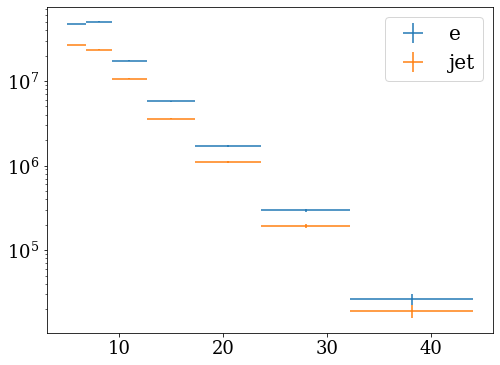

In [476]:
tree.Draw("Event.CrossSection", "","", 1000000)
xsec = tree.GetHistogram().GetMean()
print(xsec)
lumi=100
ntot=subtreeSize
to_cross_section=xsec/ntot
to_counts = to_cross_section*1000*lumi

nbins = 8
minpt = 5
maxpt = 44

plt.figure(figsize=(8,6))

bins=np.logspace(np.log10(minpt),np.log10(maxpt),nbins)

n,edge = np.histogram(pt_e, bins=bins)
x=(edge[1:]+edge[:-1])/2
dpt = (edge[1:]-edge[:-1])
plt.errorbar(x,n*to_counts/dpt,np.sqrt(n)*to_counts/dpt, dpt/2,linestyle='', label='e')
n,edge = np.histogram(pt_jet, bins=bins)
x=(edge[1:]+edge[:-1])/2
dpt = (edge[1:]-edge[:-1])
plt.errorbar(x,n*to_counts/dpt,np.sqrt(n)*to_counts/dpt, dpt/2,linestyle='',label='jet')
plt.legend()
plt.gca().set_yscale('log')


In [585]:
tree.Draw("Event.CrossSection", "","", 1000000)
xsec = tree.GetHistogram().GetMean()

x_sum=0
denom=0
nu_sum=0
Q2_sum=0
ebeam = ROOT.TLorentzVector(0,0,-10,10)
hbeam = ROOT.TLorentzVector(0,0,np.sqrt(275**2-.938**2),275)
#hrecon = ROOT.TH1D("h1", "recon", 100, 0, 0.5)
#hgen = ROOT.TH1D("h1", "gen", 100, 0, 0.5)
zh = []
zh_gen = []
zh_gen_gen = []
hp=[]
heta=[]
hpid = []
hpid_gen=[]
hpid_gen_gen=[]
treeSize=tree.GetEntries()
subtreeSize=1000000
for i,event in enumerate(tree):
    if len(event.Electron) == 0:
        continue
    for electron in event.Electron:
        Pte=electron.PT
        phi_e = electron.Phi
        e =electron.P4()
        Q2 = abs((e-ebeam)*(e-ebeam))
        y = (ebeam-e)*hbeam/(ebeam*hbeam)
        nu = (ebeam-e).T()
        x  =  -(e-ebeam)*(e-ebeam)/(2*(ebeam-e)*hbeam)
        #print(y)
    if x> 0.2 or x<0.15 or Q2<50 or y<0.1:
        continue
    
    
    for jet in event.Jet:
        
        if jet.PT<10:
            continue
        j = jet.P4()
        found = False
        for had,had_gen in zip(jet.Constituents,jet.Particles):
            if "Track" not in str(type(had)):
                continue
            h = had.P4()
            hp.append(h.P())
            heta.append(h.Eta())
            zhi = h.Vect()*j.Vect()/(j.Vect()*j.Vect())
            zh.append(zhi)
            for gen_jet in event.GenJet:
                gj = gen_jet.P4()
                if gj.Angle(j.Vect())<0.3:
                    found=True
                    break
            if not found:
                zh_gen.append(-1)
            else :
                zh_gen.append(had.P4().Vect()*gj.Vect()/(gj.Vect()*gj.Vect()))
            hpid.append(had.PID)
            hpid_gen.append(had_gen.PID)
            #print(had.PID,had_gen.PID, zhi)
        x_sum+=x
        nu_sum+=nu
        Q2_sum+=Q2
        denom+=1
    for jet in event.GenJet:
        
        if jet.PT<10:
            continue
        j = jet.P4()
        found = False
        for had in jet.Particles:
            h = had.P4()
            zhi = h.Vect()*j.Vect()/(j.Vect()*j.Vect())
            zh_gen_gen.append(zhi)
            hpid_gen_gen.append(had_gen.PID)
            #print(had.PID,had_gen.PID, zhi)
        x_sum+=x
        nu_sum+=nu
        Q2_sum+=Q2
        denom+=1
    if i>subtreeSize:
        break
        #x_sum+=
#print(zh)

[13351  3746  1505   641   287   155    60]
[2050  752  304  148   70   45   21]
[1287  640  246  135   48   29   14]


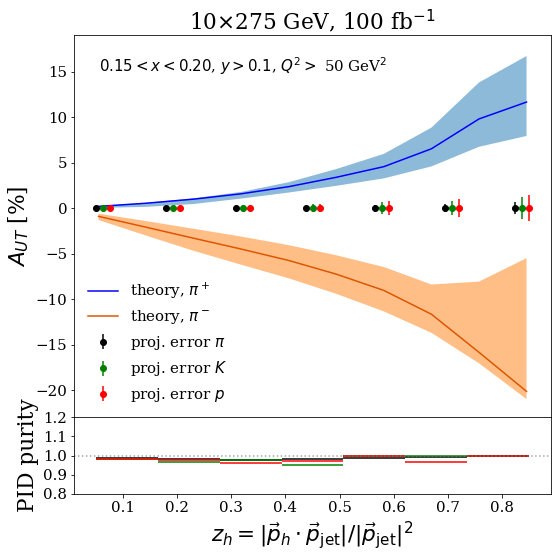

In [590]:
df = pd.DataFrame({"zh":zh,"zh_gen":zh_gen, "hpid":hpid, "hpid_gen":hpid_gen})
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import copy
import pandas as pd
import time
mpl.rcParams.update({'font.size': 15})
mpl.rcParams.update({'legend.fontsize': 18})
mpl.rcParams.update({'xtick.labelsize': 15})
mpl.rcParams.update({'ytick.labelsize': 15})
mpl.rcParams.update({'text.usetex' : False})



rc('text', usetex=False)

fig,axs = plt.subplots(2,1,figsize=(8,8),gridspec_kw=dict(height_ratios=(1,.2)))

plt.sca(axs[0])

axs[-1].set_xlabel(r"$z_h=|\vec p_{h}\cdot\vec p_{\mathrm{jet}}|/|\vec p_{\mathrm{jet}}|^2$")
plt.ylabel(r"$A_{UT}$ [%]")
plt.title(r"10$\times$275 GeV, 100 fb$^{-1}$")

labels = "$\pi$ $K$ $p$".split()
colors='kgr'
for i,query in enumerate(["abs(hpid)==211", "hpid==130 or hpid==310 or hpid==311 or abs(hpid)==321", "abs(hpid)==2212"]):
    n, edge = np.histogram(df.query(query).eval("zh"), bins=np.linspace(0.05, 0.85, 8))
    print(n)
    nscale = n/subtreeSize*lumi*xsec*1000
    x = (edge[:-1]+edge[1:])/2+(edge[1]-edge[0])*0.1*(i-1)
    plt.errorbar(x, np.zeros(len(x)), 100/np.sqrt(nscale)/.7, 
                 linestyle='', marker='o',label="proj. error " +labels[i],color=colors[i])

y_theory={}
y_theory_err_down={}
y_theory_err_up={}
y_pim_theory={}
y_pim_theory_err_up={}
y_pim_theory_err_down={}
    
y_theory['bin3'] = np.array([0.001841892,  0.00530855,   0.00980083,   0.01567932,   0.02352416,
                           0.03382184,   0.04551345,   0.0651338,   0.09792359,   0.1164755])
x_theory = np.array([0.1,0.1777778,0.2555556,0.3333333,0.4111111,0.4888889,0.5666667,0.6444444,0.7222222, 0.8])    

y_theory_err_down['bin3'] = np.array([0.0001278797,  0.001308605, 0.004467875, 0.01042595, 0.01706603,   0.02443286,
                                       0.03260951,   0.04575279,  0.06731039,  0.07921279])
               
y_theory_err_up['bin3'] = np.array([   0.001953411, 0.005710692,   0.01073905,  0.01770672,  0.02842225,
                                   0.04288646,0.05956717,0.0884028,0.1380008,0.1670792])
y_pim_theory['bin3'] = np.array([-0.009104436,
   -0.02105091,
   -0.03316741,
   -0.04504767,
   -0.05760579,
   -0.07263792,
   -0.09052144,
   -0.116675,
   -0.1585023,
   -0.201433])
y_pim_theory_err_down['bin3'] = np.array([  -0.01318612,   -0.0302416,   -0.04697436,   -0.06227085,   -0.07719297,
                                            -0.09424829,   -0.113562,   -0.137085,   -0.1705777,   -0.209904])
y_pim_theory_err_up['bin3'] = np.array([   -0.006155211,   -0.01430332,   -0.02273116,   -0.03131617,   -0.04075223,
                                           -0.05188725,   -0.06479181,   -0.08401091,   -0.08080855,   -0.05506142])

plt.plot(x_theory,100*y_theory['bin3'], '-', color='blue',label='theory, $\pi^+$')
plt.fill_between(x_theory, 100*y_theory_err_down['bin3'] , 100*y_theory_err_up['bin3'],
                 alpha=0.5)  


plt.plot(x_theory,100*y_pim_theory['bin3'], '-',color='#dd5500',label='theory, $\pi^-$')
plt.fill_between(x_theory, 100*y_pim_theory_err_down['bin3'] , 100*y_pim_theory_err_up['bin3'],alpha=0.5) 

plt.legend(frameon=False,loc='lower left', fontsize=15)
plt.ylim(-23, 19)

plt.text(0.1,15,'$0.15<x<0.20$, $y>0.1$, $Q^2>$ 50 GeV$^2$')

#second panel:  PID purity
plt.sca(axs[1])
pids = [211, 321,2212]
for i in range(3):
    pid = pids[i]
    n1, edge = np.histogram(df.query(f"abs(hpid)=={pid} and abs(hpid_gen)=={pid}").eval("zh"), bins=np.linspace(0.05, 0.85, 8))
    n2, edge = np.histogram(df.query(f"abs(hpid)=={pid} ").eval("zh"), bins=np.linspace(0.05, 0.85, 8))
    x = (edge[:-1]+edge[1:])/2
    w = (edge[1]-edge[0])
    plt.errorbar(x, n1/n2, 0, w/2, color=colors[i],label=labels[i], linestyle='')
    x = (edge[:-1]+edge[1:])/2+(edge[1]-edge[0])*0.1*(i-1)
    #plt.errorbar(x, n1/n2, color=colors[i],label=labels[i],marker='o')
plt.ylim(0.8,1.2)    
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.1))
plt.gca().axhline(1, linestyle=':',alpha=0.7, color='0.5')
plt.ylabel("PID purity")

#third panel:  efficiency
if len(axs)==3:
    df2 = pd.DataFrame({'hpid_gen':hpid_gen_gen,'zh_gen':zh_gen_gen})
    plt.sca(axs[2])
    pids = [211, 321,2212]
    for i in range(3):
        pid = pids[i]
        n1, edge = np.histogram(df.query(f"abs(hpid)=={pid} and abs(hpid_gen)=={pid}").eval("zh_gen"), bins=np.linspace(0.05, 0.85, 8))
        n2, edge = np.histogram(df2.query(f"abs(hpid_gen)=={pid} ").eval("zh_gen"), bins=np.linspace(0.05, 0.85, 8))
        x = (edge[:-1]+edge[1:])/2
        w = (edge[1]-edge[0])
        plt.errorbar(x, n1/n2, 0, w/2, color=colors[i],label=labels[i], linestyle='')
        #x = (edge[:-1]+edge[1:])/2+(edge[1]-edge[0])*0.1*(i-1)
        #plt.errorbar(x, n1/n2, color=colors[i],label=labels[i],marker='o')
    plt.ylim(0,1.3)    
    plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.5))
    plt.gca().axhline(1, linestyle=':',alpha=0.7, color='0.5')

plt.tight_layout()
plt.subplots_adjust(hspace=0)
plt.savefig('png/hadron_in_jet.png', bbox_inches='tight')
plt.savefig('pdf/hadron_in_jet.pdf', bbox_inches='tight')
plt.show()

In [566]:

print(len(df), len(df2))

36704 138310


(array([3.309e+03, 3.525e+03, 2.873e+03, 2.506e+03, 2.198e+03, 1.841e+03,
        1.669e+03, 1.423e+03, 1.208e+03, 1.085e+03, 9.530e+02, 8.920e+02,
        7.770e+02, 6.760e+02, 6.140e+02, 5.410e+02, 4.880e+02, 4.640e+02,
        3.980e+02, 3.540e+02, 3.350e+02, 3.150e+02, 2.940e+02, 2.480e+02,
        2.440e+02, 1.960e+02, 1.960e+02, 1.830e+02, 1.970e+02, 1.550e+02,
        1.320e+02, 1.420e+02, 1.380e+02, 1.270e+02, 1.140e+02, 1.200e+02,
        9.900e+01, 7.800e+01, 9.500e+01, 7.600e+01, 7.500e+01, 5.100e+01,
        7.400e+01, 5.800e+01, 5.300e+01, 5.000e+01, 4.900e+01, 5.200e+01,
        4.200e+01, 3.500e+01, 2.900e+01, 3.100e+01, 2.800e+01, 3.200e+01,
        3.500e+01, 2.400e+01, 2.400e+01, 1.400e+01, 2.000e+01, 2.300e+01,
        1.800e+01, 2.000e+01, 1.500e+01, 1.400e+01, 2.000e+01, 1.600e+01,
        1.900e+01, 1.200e+01, 1.200e+01, 1.100e+01, 1.000e+01, 8.000e+00,
        2.000e+00, 1.100e+01, 4.000e+00, 7.000e+00, 4.000e+00, 4.000e+00,
        8.000e+00, 6.000e+00, 2.000e+0

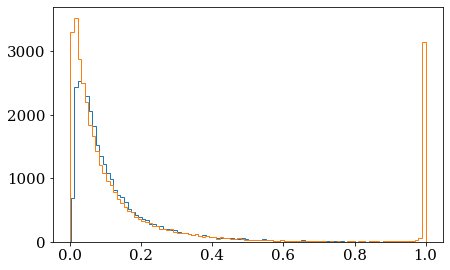

In [571]:
plt.hist(df.query('abs(hpid)==211').zh,bins=100,histtype='step')
plt.hist(df2.query('abs(hpid_gen)==211').zh,bins=100,histtype='step')

In [581]:
df = pd.DataFrame({"zh":zh,"zh_gen":zh_gen, "hpid":hpid, "hpid_gen":hpid_gen, "hp":hp,"heta":heta})

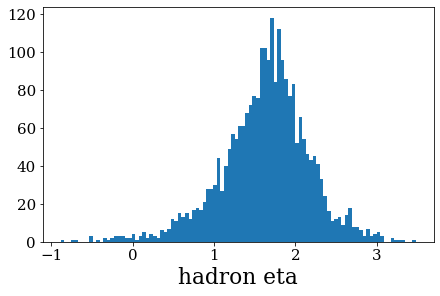

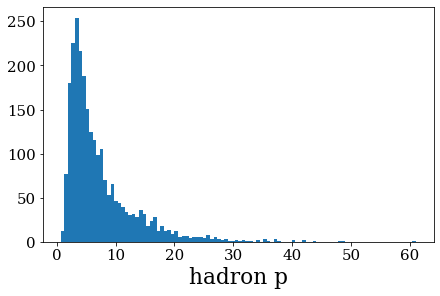

In [584]:
plt.hist(df.query("zh>0.05").heta,bins=100)
plt.xlabel("hadron eta")
plt.show()
plt.hist(df.query("zh>0.05").hp,bins=100)
plt.xlabel("hadron p")
plt.show()